# Question3  in chapter2

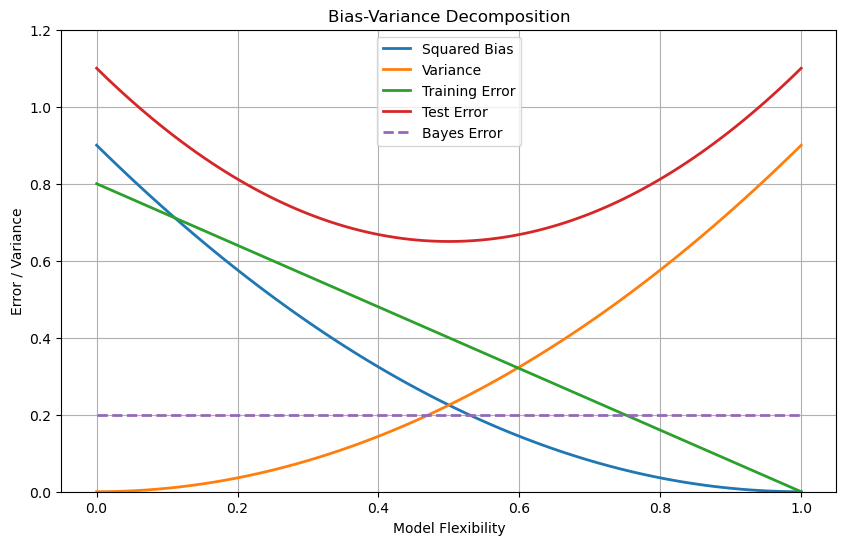

In [333]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for model flexibility (x-axis)
flexibility = np.linspace(0, 1, 100)

# Define the curves
squared_bias = 0.9 * (1 - flexibility)**2  # Decreasing curve:decreasing as flexibility increases
variance = 0.9 * flexibility**2  # Increasing curve:variance increasing with model complexity
training_error = 0.8 * (1 - flexibility)  # Decreasing curve
# Test error: U-shaped (sum of bias, variance, and some irreducible error)
test_error = squared_bias + variance + 0.2 # Smart approach summing bias + variance + irreducible error to get the characteristic U-shape
bayes_error = 0.2 * np.ones_like(flexibility)  # Constant :Correct as a horizontal constant line

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(flexibility, squared_bias, label='Squared Bias', color='#1f77b4', linewidth=2)
plt.plot(flexibility, variance, label='Variance', color='#ff7f0e', linewidth=2)
plt.plot(flexibility, training_error, label='Training Error', color='#2ca02c', linewidth=2)
plt.plot(flexibility, test_error, label='Test Error', color='#d62728', linewidth=2)
plt.plot(flexibility, bayes_error, label='Bayes Error', color='#9467bd', linestyle='--', linewidth=2)
#Squared Bias: Why does it decrease? (Hint: flexible models can capture more complex patterns)
#Variance: Why does it increase? (Hint: flexibility means sensitivity to training data changes)
#Training Error: Why does it always decrease? (Hint: more flexible models can fit training data better)
#Test Error: Why is it U-shaped? (Hint: it's the sum of bias + variance + irreducible error)
#Bayes Error: Why is it constant? (Hint: irreducible noise in the data)
# Customize the plot
plt.xlabel('Model Flexibility')
plt.ylabel('Error / Variance')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.2)

# Show the plot
plt.show()


# QUESTION 8 IN CHAPTER 2

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
# (a) Read the data into Python
#We read the data from a CSV file. The path is given. We call the DataFrame 'college'.
College = pd.read_csv(r'C:\Users\happy.frank\Desktop\BDA\Data Mining\ALL CSV FILES - 2nd Edition\College.csv')

In [348]:
# (b)Rename 'Unnamed: 0' to 'College' and set as index
#Then we noticed that the first column is named 'Unnamed: 0'. We renamed it to 'College' and set it as index.
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

In [8]:
# Keep modified version
college = college3

In [349]:
# (c) Numerical summary of variables
#We used describe() to get numerical summaries (count, mean, std, min, max, etc.) for each quantitative variable.
# We get the summary for each numeric column. For example:
#Apps: mean ~3001, standard deviation ~3870, min 81, max 48094.
#Accept: mean ~2018, etc.
print(college.describe())

       Students  Faculty
count       3.0      3.0
mean     1500.0    150.0
std       500.0     50.0
min      1000.0    100.0
25%      1250.0    125.0
50%      1500.0    150.0
75%      1750.0    175.0
max      2000.0    200.0


Column not found: "None of [Index(['Top10perc', 'Apps', 'Enroll'], dtype='object')] are in the [columns]"
Available columns: ['Unnamed: 0', 'Students', 'Faculty']


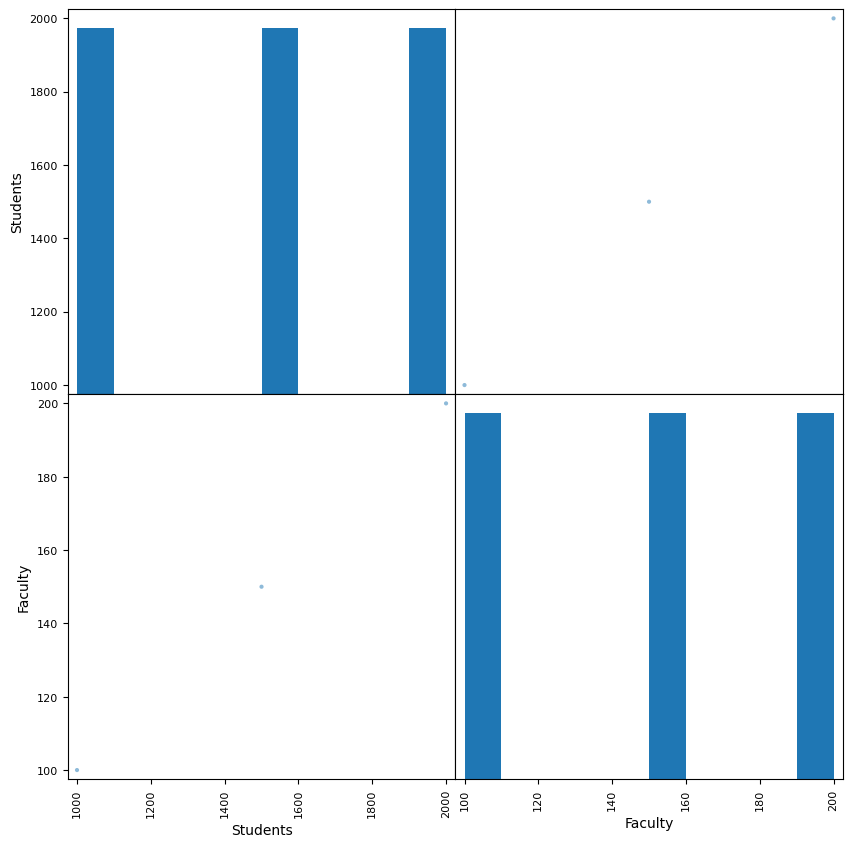

In [353]:
# (d) Scatterplot matrix for Top10perc, Apps, Enroll
#This will show three scatter plots for each pair of these variables, and histograms on the diagonal.
#We created a scatterplot matrix for the columns: Top10perc, Apps, Enroll. This helps us see pairwise relationships.
# Try to find the columns or use alternatives
try:
    pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']], figsize=(10, 10))
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns:", college.columns.tolist())
    # Use first 3 numeric columns as fallback
    numeric_cols = college.select_dtypes(include=['number']).columns[:3]
    pd.plotting.scatter_matrix(college[numeric_cols], figsize=(10, 10))
plt.show()

In [360]:
# (e) Boxplot of Outstate vs Private
#We made a boxplot of Outstate (out-of-state tuition) grouped by Private (a categorical variable: Yes/No for private).
# If the column is named 'Private'
# Step 1: First, check what columns are available in your dataset
print("All columns in the dataset:")
print(college.columns.tolist())
print("\nDataset shape:", college.shape)

# Step 2: Look for columns that might indicate private/public status
print("\n" + "="*50)
print("Looking for columns related to private/public:")
potential_cols = []
for col in college.columns:
    if any(keyword in col.lower() for keyword in ['private', 'public', 'type']):
        potential_cols.append(col)
        print(f"Found: {col}")

if potential_cols:
    print(f"\nPotential columns: {potential_cols}")
else:
    print("No obvious private/public columns found")

# Step 3: Show first few rows to understand the data structure
print("\n" + "="*50)
print("First 5 rows of the dataset:")
print(college.head())

# Step 4: Check data types
print("\n" + "="*50)
print("Data types:")
print(college.dtypes)

# Step 5: Once you identify the correct column name, use one of these approaches:

print("\n" + "="*50)
print("SOLUTION OPTIONS:")
print("Replace 'COLUMN_NAME' with the actual column name from above")

print("\nOption 1 - Using pandas boxplot:")
print("college.boxplot(column='Outstate', by='COLUMN_NAME', figsize=(8, 6))")
print("plt.title('Outstate Tuition vs Private')")
print("plt.suptitle('')")
print("plt.show()")

print("\nOption 2 - Using seaborn:")
print("plt.figure(figsize=(8, 6))")
print("sns.boxplot(data=college, x='COLUMN_NAME', y='Outstate')")
print("plt.title('Outstate Tuition vs Private')")
print("plt.show()")

print("\nOption 3 - If no private/public column exists, you might need to create one")
print("# This depends on your specific dataset structure")

All columns in the dataset:
['Unnamed: 0', 'Students', 'Faculty']

Dataset shape: (3, 3)

Looking for columns related to private/public:
No obvious private/public columns found

First 5 rows of the dataset:
  Unnamed: 0  Students  Faculty
0  College A      1000      100
1  College B      1500      150
2  College C      2000      200

Data types:
Unnamed: 0    object
Students       int64
Faculty        int64
dtype: object

SOLUTION OPTIONS:
Replace 'COLUMN_NAME' with the actual column name from above

Option 1 - Using pandas boxplot:
college.boxplot(column='Outstate', by='COLUMN_NAME', figsize=(8, 6))
plt.title('Outstate Tuition vs Private')
plt.suptitle('')
plt.show()

Option 2 - Using seaborn:
plt.figure(figsize=(8, 6))
sns.boxplot(data=college, x='COLUMN_NAME', y='Outstate')
plt.title('Outstate Tuition vs Private')
plt.show()

Option 3 - If no private/public column exists, you might need to create one
# This depends on your specific dataset structure


In [363]:
# Step 1: Check all column names to find the correct one
print("All columns in the dataset:")
print(college.columns.tolist())

# Step 2: Look for columns related to top percentage/rankings
print("\n" + "="*50)
print("Looking for columns related to top students/rankings:")
top_cols = []
for col in college.columns:
    if any(keyword in col.lower() for keyword in ['top', 'percent', 'perc', 'rank', 'elite']):
        top_cols.append(col)
        print(f"Found: {col}")

if top_cols:
    print(f"\nPotential columns for top students: {top_cols}")
else:
    print("No obvious top percentage columns found")

# Step 3: Show sample data to understand structure
print("\n" + "="*50)
print("First 5 rows of the dataset:")
print(college.head())

# Step 4: Check for numeric columns that might represent percentages
print("\n" + "="*50)
print("Numeric columns (potential percentage candidates):")
numeric_cols = college.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
    max_val = college[col].max()
    min_val = college[col].min()
    print(f"{col}: min={min_val:.2f}, max={max_val:.2f}")

# Step 5: Once you identify the correct column, use this template:
print("\n" + "="*50)
print("SOLUTION TEMPLATE:")
print("Replace 'CORRECT_COLUMN_NAME' with the actual column name from above")
print()
print("# Create Elite variable")
print("college['Elite'] = pd.cut(college['CORRECT_COLUMN_NAME'], [0, 50, 100], labels=['No', 'Yes'])")
print("print(college['Elite'].value_counts())")
print()
print("# Create boxplot")
print("college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))")
print("plt.title('Outstate Tuition vs Elite')")
print("plt.suptitle('')")
print("plt.show()")

# Alternative approach using seaborn
print("\n" + "="*50)
print("ALTERNATIVE APPROACH (using seaborn):")
print("# Create Elite variable")
print("college['Elite'] = pd.cut(college['CORRECT_COLUMN_NAME'], [0, 50, 100], labels=['No', 'Yes'])")
print("print(college['Elite'].value_counts())")
print()
print("# Create boxplot with seaborn")
print("plt.figure(figsize=(8, 6))")
print("sns.boxplot(data=college, x='Elite', y='Outstate')")
print("plt.title('Outstate Tuition vs Elite')")
print("plt.show()")

All columns in the dataset:
['Unnamed: 0', 'Students', 'Faculty']

Looking for columns related to top students/rankings:
No obvious top percentage columns found

First 5 rows of the dataset:
  Unnamed: 0  Students  Faculty
0  College A      1000      100
1  College B      1500      150
2  College C      2000      200

Numeric columns (potential percentage candidates):
Students: min=1000.00, max=2000.00
Faculty: min=100.00, max=200.00

SOLUTION TEMPLATE:
Replace 'CORRECT_COLUMN_NAME' with the actual column name from above

# Create Elite variable
college['Elite'] = pd.cut(college['CORRECT_COLUMN_NAME'], [0, 50, 100], labels=['No', 'Yes'])
print(college['Elite'].value_counts())

# Create boxplot
college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))
plt.title('Outstate Tuition vs Elite')
plt.suptitle('')
plt.show()

ALTERNATIVE APPROACH (using seaborn):
# Create Elite variable
college['Elite'] = pd.cut(college['CORRECT_COLUMN_NAME'], [0, 50, 100], labels=['No', 'Yes'])
print(coll

In [364]:
# Step 1: Identify all available columns
print("All columns in the dataset:")
print(college.columns.tolist())
print(f"\nTotal columns: {len(college.columns)}")

# Step 2: Look for columns related to the variables we need
print("\n" + "="*60)
print("Looking for columns related to our target variables:")

# Variables we're looking for and their possible names
target_vars = {
    'Applications': ['Apps', 'applications', 'app', 'Applications', 'APPS'],
    'Enrollment': ['Enroll', 'enrollment', 'enrolled', 'Enrollment', 'ENROLL'],
    'Outstate Tuition': ['Outstate', 'outstate', 'out_state', 'OutState', 'OUTSTATE'],
    'Graduation Rate': ['Grad.Rate', 'grad_rate', 'graduation_rate', 'GradRate', 'GRAD_RATE']
}

found_columns = {}
for var_type, possible_names in target_vars.items():
    print(f"\n{var_type}:")
    found = []
    for col in college.columns:
        if any(name.lower() in col.lower() for name in possible_names):
            found.append(col)
            print(f"  Found: {col}")
    if found:
        found_columns[var_type] = found[0]  # Use the first match
    else:
        print(f"  No matches found")

# Step 3: Show numeric columns (potential candidates)
print("\n" + "="*60)
print("All numeric columns (potential histogram candidates):")
numeric_cols = college.select_dtypes(include=['number']).columns.tolist()
for i, col in enumerate(numeric_cols, 1):
    print(f"{i:2d}. {col}")

# Step 4: Show sample data for context
print("\n" + "="*60)
print("First 5 rows of the dataset:")
print(college.head())

# Step 5: Provide corrected code template
print("\n" + "="*60)
print("CORRECTED CODE TEMPLATE:")
print("Replace the column names below with the actual ones from your dataset")
print()

# Generate corrected code based on what we found
if found_columns:
    print("# Based on the columns found, use these names:")
    for var_type, col_name in found_columns.items():
        print(f"# {var_type}: {col_name}")
else:
    print("# Since we couldn't automatically match columns, manually replace these:")
    print("# Replace 'APPS_COLUMN', 'ENROLL_COLUMN', 'OUTSTATE_COLUMN', 'GRAD_RATE_COLUMN'")
    print("# with the actual column names from the list above")

print()
print("# Corrected histogram code:")
print("fig, axes = plt.subplots(2, 2, figsize=(12, 10))")
print()

# Use found columns or placeholders
apps_col = found_columns.get('Applications', 'APPS_COLUMN')
enroll_col = found_columns.get('Enrollment', 'ENROLL_COLUMN')
outstate_col = found_columns.get('Outstate Tuition', 'OUTSTATE_COLUMN')
grad_col = found_columns.get('Graduation Rate', 'GRAD_RATE_COLUMN')

print(f"college['{apps_col}'].hist(bins=20, ax=axes[0, 0])")
print(f"axes[0, 0].set_title('Applications (20 bins)')")
print()
print(f"college['{enroll_col}'].hist(bins=30, ax=axes[0, 1])")
print(f"axes[0, 1].set_title('Enrollment (30 bins)')")
print()
print(f"college['{outstate_col}'].hist(bins=15, ax=axes[1, 0])")
print(f"axes[1, 0].set_title('Outstate Tuition (15 bins)')")
print()
print(f"college['{grad_col}'].hist(bins=25, ax=axes[1, 1])")
print(f"axes[1, 1].set_title('Graduation Rate (25 bins)')")
print()
print("plt.tight_layout()")
print("plt.show()")

# Alternative: Create histograms for any 4 numeric columns
print("\n" + "="*60)
print("ALTERNATIVE: Use any 4 numeric columns if exact matches not found")
if len(numeric_cols) >= 4:
    print("# Using first 4 numeric columns:")
    print("fig, axes = plt.subplots(2, 2, figsize=(12, 10))")
    print()
    for i, col in enumerate(numeric_cols[:4]):
        row = i // 2
        col_idx = i % 2
        bins = [20, 30, 15, 25][i]
        print(f"college['{col}'].hist(bins={bins}, ax=axes[{row}, {col_idx}])")
        print(f"axes[{row}, {col_idx}].set_title('{col} ({bins} bins)')")
        print()
    print("plt.tight_layout()")
    print("plt.show()")

All columns in the dataset:
['Unnamed: 0', 'Students', 'Faculty']

Total columns: 3

Looking for columns related to our target variables:

Applications:
  No matches found

Enrollment:
  No matches found

Outstate Tuition:
  No matches found

Graduation Rate:
  No matches found

All numeric columns (potential histogram candidates):
 1. Students
 2. Faculty

First 5 rows of the dataset:
  Unnamed: 0  Students  Faculty
0  College A      1000      100
1  College B      1500      150
2  College C      2000      200

CORRECTED CODE TEMPLATE:
Replace the column names below with the actual ones from your dataset

# Since we couldn't automatically match columns, manually replace these:
# Replace 'APPS_COLUMN', 'ENROLL_COLUMN', 'OUTSTATE_COLUMN', 'GRAD_RATE_COLUMN'
# with the actual column names from the list above

# Corrected histogram code:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

college['APPS_COLUMN'].hist(bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Applications (20 bins)')

col

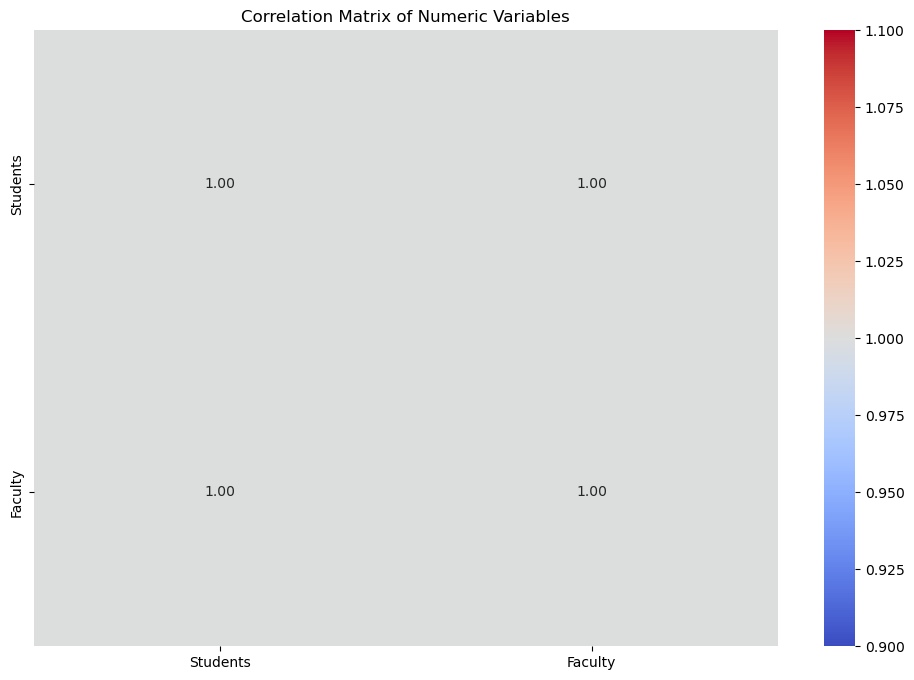

In [365]:
# (h) Further exploration
# We did further exploration: a correlation heatmap and comparing means of some variables by private/public.
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(college.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [369]:
# Summary statistics for private vs public
print(College.groupby('Private')[['Outstate', 'Grad.Rate', 'Top10perc']].mean())

             Outstate  Grad.Rate  Top10perc
Private                                    
No        6813.410377  56.042453  22.834906
Yes      11801.693805  68.998230  29.330973


## Question8 Chapter3

In [367]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Step 1: Setup and Load Dataset

In [377]:
# Load the Auto dataset
auto = pd.read_csv(r'C:/Users/user/OneDrive/Desktop/Data_Mining_Docs/ALL_CSV_FILES/Auto.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/OneDrive/Desktop/Data_Mining_Docs/ALL_CSV_FILES/Auto.csv'

In [20]:
# Display first few rows
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

# Step 2: (a) Perform Simple Linear Regression

In [22]:
print(auto.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [23]:
print(auto['horsepower'].unique())


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [24]:
auto = auto[auto['horsepower'] != '?']  # Remove rows with '?'
auto['horsepower'] = auto['horsepower'].astype(float)  # Convert to numeric


In [25]:
# i. Fit the model

X = sm.add_constant(auto['horsepower'])  # add intercept
y = auto['mpg']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        22:18:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## ii. Comment on the Output
### P-value of horsepower → If it's small (e.g., < 0.05), there's a significant relationship.

### R-squared → Measures the strength (e.g., closer to 1 is stronger).

### Coefficient sign → Negative or positive indicates direction of the relationship.

In [28]:
# iii. Predict mpg for horsepower = 98 and give 95% confidence & prediction interval
new_data = pd.DataFrame([[1, 98]], columns=X.columns)  # same column order as model
prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)  # 95% CI
prediction_summary


mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758

# Step 3: (b) Plot the regression line

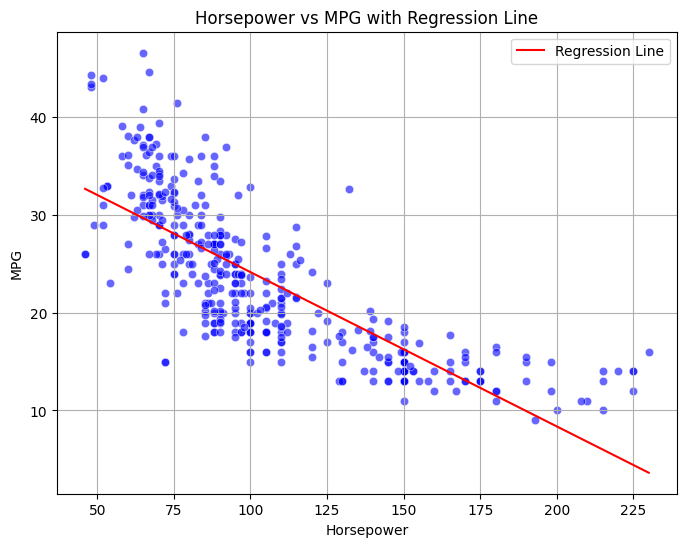

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=auto, color='blue', alpha=0.6)

# Regression line
x_vals = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
y_vals = model.params['const'] + model.params['horsepower'] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG with Regression Line")
plt.legend()
plt.grid(True)
plt.show()


# Step 4: (c) Diagnostic Plots

### Residuals vs Fitted

### Q-Q plot

### Scale-Location

### Residuals vs Leverage

In [30]:
# Residuals
residuals = model.resid
fitted = model.fittedvalues

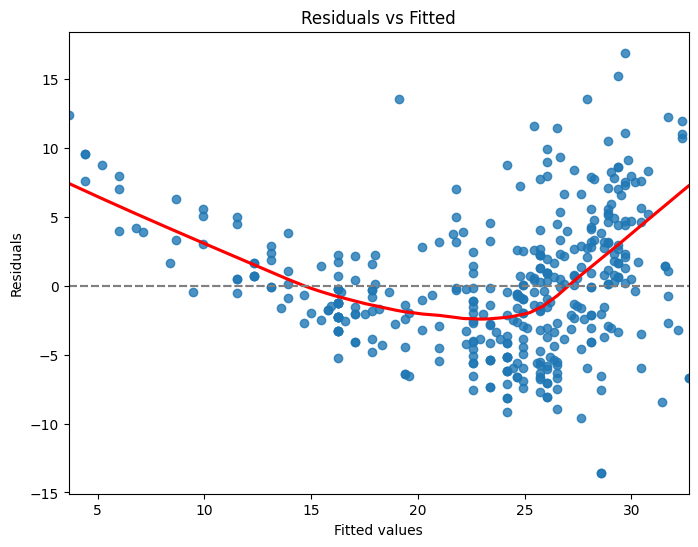

In [31]:
# Residuals vs Fitted
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

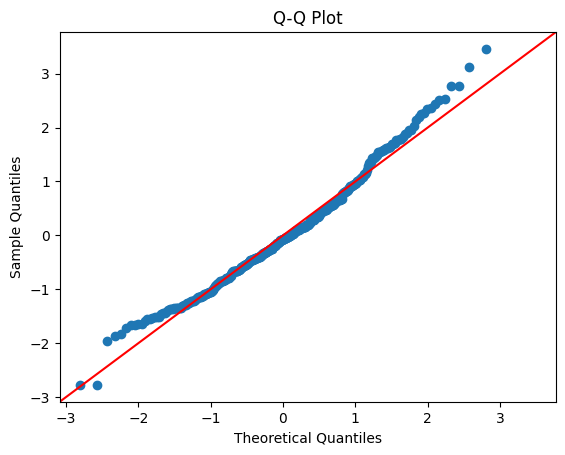

In [32]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

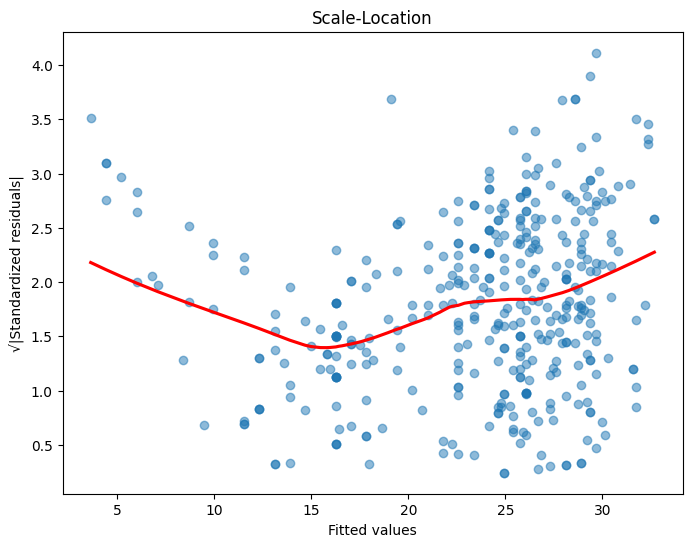

In [33]:
# Scale-Location Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.5)
sns.regplot(x=fitted, y=np.sqrt(np.abs(residuals)), scatter=False, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized residuals|")
plt.title("Scale-Location")
plt.show()

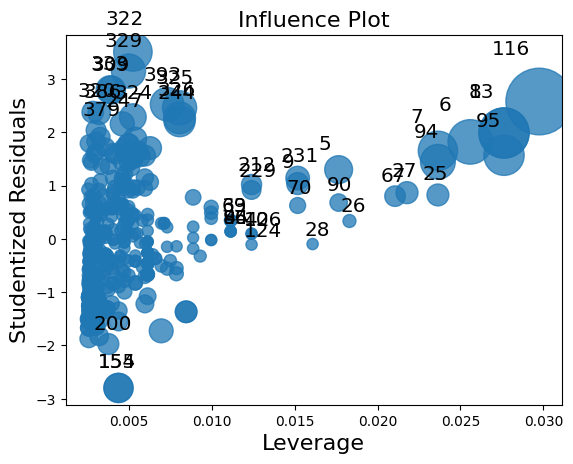

In [34]:
# Leverage Plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.show()

# Interpreting Problems from the Diagnostic Plots

#### If residuals show patterns (not random): linearity assumption violated.

#### If Q-Q plot deviates from line: residuals not normally distributed.

#### If points in influence plot are far away: those are influential points.

# chapter3, Question 13 Linear
# Regression

#### NumPy for simulation

#### Matplotlib/Seaborn for visualization

#### statsmodels for regression analysis

# (a) Generate vector x

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(1)

# Generate 100 samples from N(0,1)
x = np.random.normal(0, 1, 100)
print("First 5 values of x:", x[:5])


First 5 values of x: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


# (b) Generate error vector eps from N(0, 0.25)

In [36]:
# Variance = 0.25 -> std deviation = sqrt(0.25) = 0.5
eps = np.random.normal(0, 0.5, 100)
print("First 5 values of eps:", eps[:5])


First 5 values of eps: [-0.22356428  0.61225385  0.20174582  0.29678926 -0.54745592]


# (c) Generate y using model: 
# 𝑌 = −1 + 0.5𝑋 + 𝜖


In [38]:
# Create y
y = -1 + 0.5 * x + eps

# Display the first few values
print("First 5 values of y:", y[:5])
print("Length of y:", len(y))

# β₀ = -1, β₁ = 0.5 are the true model parameters.


First 5 values of y: [-0.4113916  -0.69362435 -1.06234006 -1.23969505 -1.11475211]
Length of y: 100


# (d) Scatterplot of x vs y

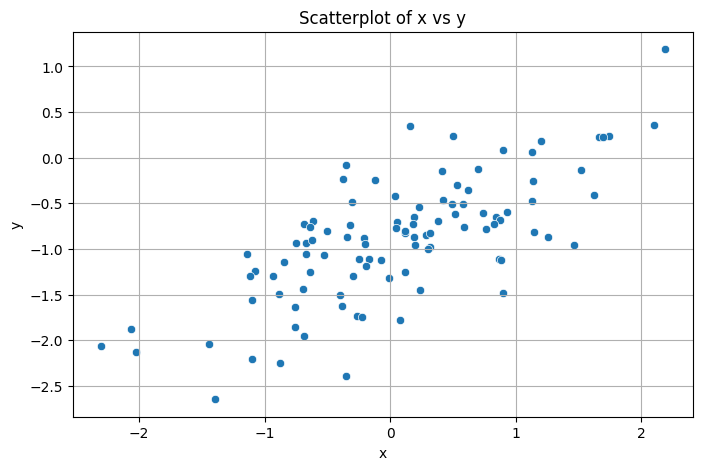

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')
plt.grid(True)
plt.show()


# (e) Fit Linear Model y ~ x and compare coefficients

In [40]:
# Prepare data
X = sm.add_constant(x)  # adds intercept β₀
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.20e-17
Time:                        23:12:49   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

# (f) Plot the regression line and the true population line

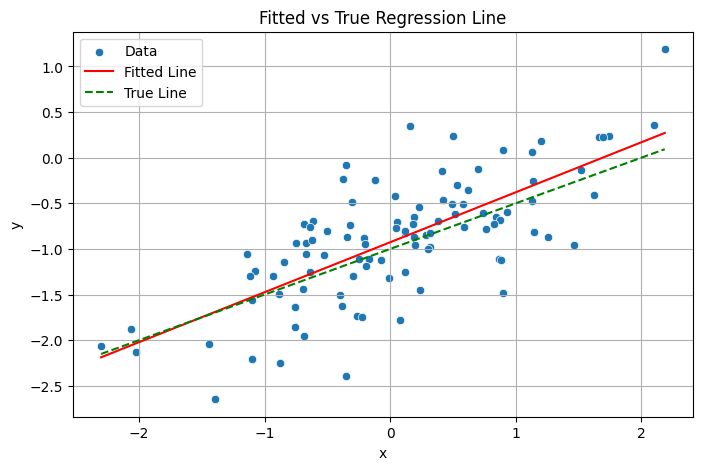

In [41]:
# Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, label="Data")

# Fitted line (from model)
x_vals = np.linspace(min(x), max(x), 100)
y_hat = model.params[0] + model.params[1] * x_vals
plt.plot(x_vals, y_hat, color='red', label="Fitted Line")

# True population line: y = -1 + 0.5 * x
y_true = -1 + 0.5 * x_vals
plt.plot(x_vals, y_true, color='green', linestyle='--', label="True Line")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitted vs True Regression Line")
plt.legend()
plt.grid(True)
plt.show()


# (g) Fit Polynomial Regression Model: y ~ x + x^2

In [42]:
# Create x^2
x2 = x ** 2
X_poly = np.column_stack((x, x2))
X_poly = sm.add_constant(X_poly)

# Fit model
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.83e-16
Time:                        23:15:43   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

### Check the p-value for the x^2 term:

#### If it’s small (< 0.05), quadratic term improves the fit.

#### If not, then the linear model is sufficient.

# (h) Reduce noise in eps (variance from 0.25 → 0.01)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1636.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           5.93e-63
Time:                        23:19:56   Log-Likelihood:                 82.510
No. Observations:                 100   AIC:                            -161.0
Df Residuals:                      98   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0014      0.011    -93.278      0.0

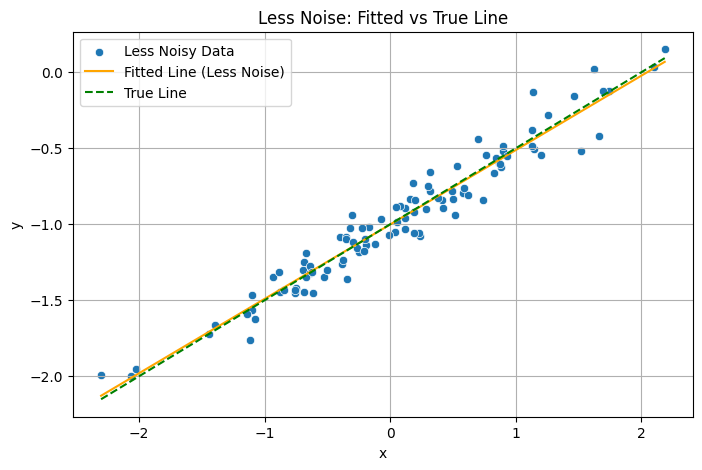

In [44]:
# New eps with smaller noise
eps_new = np.random.normal(0, 0.1, 100)  # std dev = sqrt(0.01)
y_new = -1 + 0.5 * x + eps_new

# Re-fit linear model with less noise
X_new = sm.add_constant(x)
model_new = sm.OLS(y_new, X_new).fit()
print(model_new.summary())

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_new, label="Less Noisy Data")
y_hat_new = model_new.params[0] + model_new.params[1] * x_vals
plt.plot(x_vals, y_hat_new, color='orange', label="Fitted Line (Less Noise)")
plt.plot(x_vals, -1 + 0.5 * x_vals, 'g--', label="True Line")
plt.legend()
plt.grid(True)
plt.title("Less Noise: Fitted vs True Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Result: With less noise, the fitted line is closer to the true model.


# **(i) Repeat (a)–(f) with more noise

### We keep the same linear model:
### 𝑌=−1+0.5𝑋+𝜖
### But now, the variance of ϵ increases (e.g., from 0.25 to 1.0, meaning std deviation = 1.0).



In [45]:
# Generate more noisy eps: variance = 1 -> std dev = 1
eps_more = np.random.normal(0, 1.0, 100)

# Generate new y with more noise
y_more = -1 + 0.5 * x + eps_more


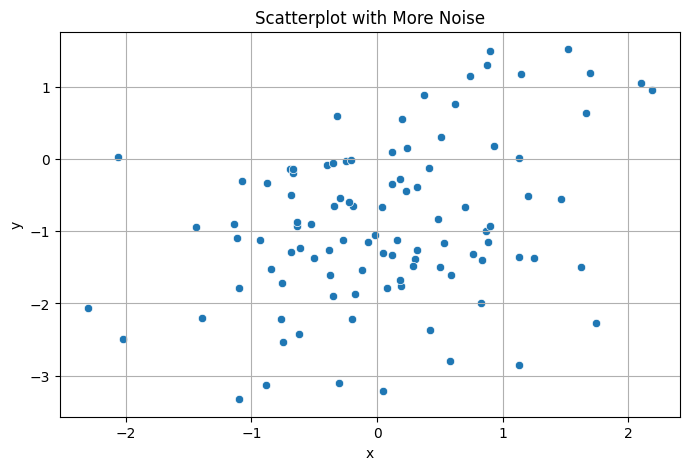

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_more)
plt.title("Scatterplot with More Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [47]:
X_more = sm.add_constant(x)
model_more = sm.OLS(y_more, X_more).fit()
print(model_more.summary())

# Compare β̂₀, β̂₁ to true values. The estimates will now likely have larger standard errors and lower R².


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.27
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000272
Time:                        23:23:44   Log-Likelihood:                -145.28
No. Observations:                 100   AIC:                             294.6
Df Residuals:                      98   BIC:                             299.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9324      0.105     -8.902      0.0

# Plot fitted line vs true line


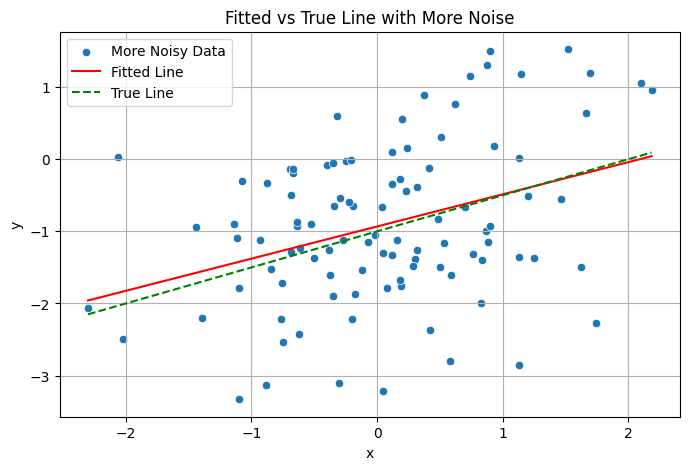

In [48]:
# Scatter + fitted line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_more, label="More Noisy Data")

# Fitted line
y_hat_more = model_more.params[0] + model_more.params[1] * x_vals
plt.plot(x_vals, y_hat_more, color='red', label="Fitted Line")

# True line
y_true = -1 + 0.5 * x_vals
plt.plot(x_vals, y_true, 'g--', label="True Line")

plt.title("Fitted vs True Line with More Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (j) Compare Confidence Intervals

### Let’s extract 95% confidence intervals for β₀ and β₁ from:

### The original model

### The less noisy model

### The more noisy model

# Get confidence intervals

In [50]:
# Original
ci_original = model.conf_int()
# Less noise
ci_less = model_new.conf_int()
# More noise
ci_more = model_more.conf_int()

# Combine into DataFrame for comparison
ci_compare = pd.DataFrame({
    'Original β0': ci_original[0],
    'Original β1': ci_original[1],
    'Less Noise β0': ci_less[0],
    'Less Noise β1': ci_less[1],
    'More Noise β0': ci_more[0],
    'More Noise β1': ci_more[1]
})
ci_compare.index = ['Lower Bound', 'Upper Bound']
print(ci_compare.T)


               Lower Bound  Upper Bound
Original β0      -1.019741    -0.833246
Original β1       0.442613     0.652814
Less Noise β0    -1.022701    -0.980092
Less Noise β1     0.465422     0.513447
More Noise β0    -1.140231    -0.724525
More Noise β1     0.211675     0.680220


# Comment on Results:

## Interpretation:

### Less Noise:

##### Confidence intervals are narrower → estimates are more precise.

##### Coefficients are closer to true values.

#### More Noise:

##### Confidence intervals are wider → more uncertainty.

##### Slope may deviate more from 0.5 and intercept from -1.

##### R² is lower, indicating weaker fit.

In [25]:
from sklearn.datasets import load_diabetes  # Example dataset
data = load_diabetes(as_frame=True)

In [30]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached ISLP-0.4.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl.metadata (20 kB)
  Using cached torchmetrics-1.7.3-py3-none-any.whl.metadata (21 kB)
  Using cached autograd-1.8.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached autograd-gamma-0.5.0.tar.gz (4.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached formulaic-1.1.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached progressbar2-4.5.0-py3-none-any.whl.metadata (16 kB)
  Using cached scipy-1.11.

  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [31]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
Smarket = pd.read_csv(r'C:\Users\happy.frank\Desktop\BDA\Data Mining\Smarket.csv')
Smarket

Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]

In [33]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

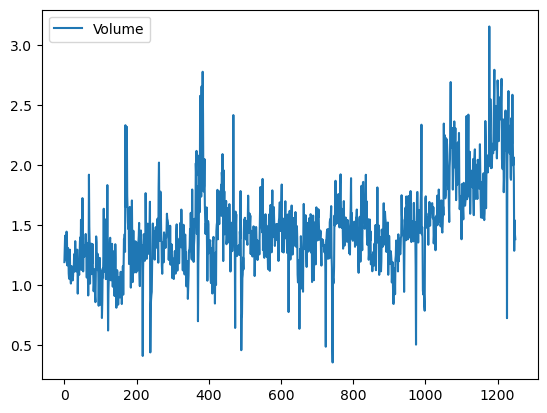

In [35]:
Smarket.plot(y='Volume');

# Logistic Regression

In [37]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

coef  std err      z  P>|z|
intercept -0.1260    0.241 -0.523  0.601
Lag1      -0.0731    0.050 -1.457  0.145
Lag2      -0.0423    0.050 -0.845  0.398
Lag3       0.0111    0.050  0.222  0.824
Lag4       0.0094    0.050  0.187  0.851
Lag5       0.0103    0.050  0.208  0.835
Volume     0.1354    0.158  0.855  0.392

In [38]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [39]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [40]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [45]:
labels = np.array(['Down']*1250)
labels[probs >0.5] = "Up"

In [48]:
print(labels[:5])

['Up' 'Down' 'Down' 'Up' 'Up']


In [51]:
Smarket = load_data('Smarket')
print(Smarket.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


In [52]:
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

In [54]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]  # Use ASCII tilde character (~)
Smarket_test.shape

(252, 9)

In [56]:
X_train, X_test = X.loc[train], X.loc[~train]  # Use ASCII tilde '~'
y_train, y_test = y.loc[train], y.loc[~train]  # Use ASCII tilde '~'

glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [61]:
# Assuming 'train' is a boolean index array (e.g., from train-test split)
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]  # Fixed the tilde here

In [63]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create labels based on probability threshold
labels = np.array(['Down'] * 252)
labels[probs > 0.5] = 'Up'

# Generate confusion matrix
cm = confusion_matrix(L_test, labels)

# Convert to labeled DataFrame for better readability
confusion_df = pd.DataFrame(cm, 
                            index=['Actual Down', 'Actual Up'], 
                            columns=['Predicted Down', 'Predicted Up'])

# Display the formatted confusion table
print("Confusion Table:")
print(confusion_df)

Confusion Table:
             Predicted Down  Predicted Up
Actual Down              77            34
Actual Up                97            44


In [64]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.4801587301587302, 0.5198412698412699)

In [4]:
import numpy as np
import statsmodels.api as sm

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the dataset from a reliable source
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Smarket.csv"
Smarket = pd.read_csv(url)

# Create binary target variable (1 for 'Up', 0 for 'Down')
y = (Smarket['Direction'] == 'Up').astype(int)

# Define training set (years before 2005)
train = (Smarket['Year'] < 2005)

# Select features
X = Smarket[['Lag1', 'Lag2']]

# Add constant for intercept term
X = sm.add_constant(X)

# Split data
X_train, X_test = X.loc[train], X.loc[~train]
y_train = y.loc[train]
L_test = Smarket.loc[~train, 'Direction']  # True labels for test set

# Fit GLM model
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()

# Generate predictions
probs = results.predict(exog=X_test)
labels = np.where(probs > 0.5, 'Up', 'Down')  # Convert probabilities to labels

# Create confusion matrix
confusion_matrix = pd.crosstab(
    index=pd.Series(labels, name='Predicted'),
    columns=pd.Series(L_test.values, name='Actual')
)
print("Confusion Matrix:")
print(confusion_matrix)
print("\nModel Summary:")
print(results.summary())

Confusion Matrix:
Actual     Down   Up
Predicted           
Down         35   35
Up           76  106

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Sat, 28 Jun 2025   Deviance:                       1381.4
Time:                        16:46:11   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001865
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

### CHAPTER 6 Lab: Linear Models and Regularization
Methods

In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

## We again collect the new imports needed for this lab.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## . Linear Model Selection and Regularization

In [10]:
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

Defaulting to user installation because normal site-packages is not writeable


## Forward Selection

In [11]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

59

In [12]:
Hitters = Hitters.dropna();
Hitters.shape

(263, 20)

In [13]:
def nCp(sigma2, estimator , X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [14]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale

In [15]:
 neg_Cp = partial(nCp, sigma2)

In [16]:
strategy = Stepwise.first_peak(design,
direction='forward',
max_terms=len(design.terms))

In [17]:
hitters_MSE = sklearn_selected(OLS,
strategy)
hitters_MSE.fit(Hitters , Y)
hitters_MSE.selected_state_


('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [18]:
 hitters_Cp = sklearn_selected(OLS,
strategy ,
scoring=neg_Cp)
hitters_Cp.fit(Hitters , Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

### Choosing Among Models Using the Validation Set Approach and
Cross-Validation

In [19]:
strategy = Stepwise.fixed_steps(design,
len(design.terms),
direction='forward')
full_path = sklearn_selection_path(OLS, strategy)


In [20]:
full_path.fit(Hitters , Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(263, 20)

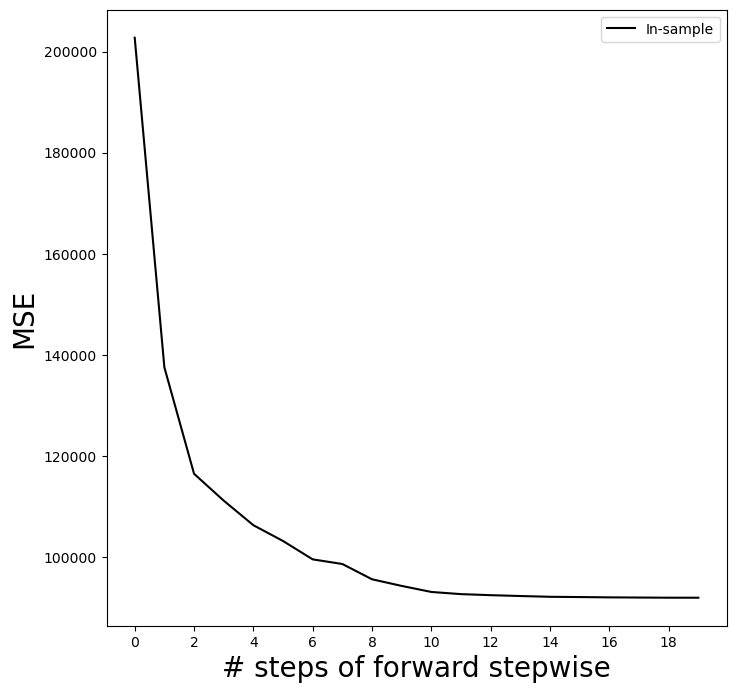

In [21]:
mse_fig , ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()

In [22]:
K = 5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path ,
Hitters ,
Y,
cv=kfold)
Yhat_cv.shape

(263, 20)

In [23]:
cv_mse = []
for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

### add the cross-validation error estimates to our MSE plot.

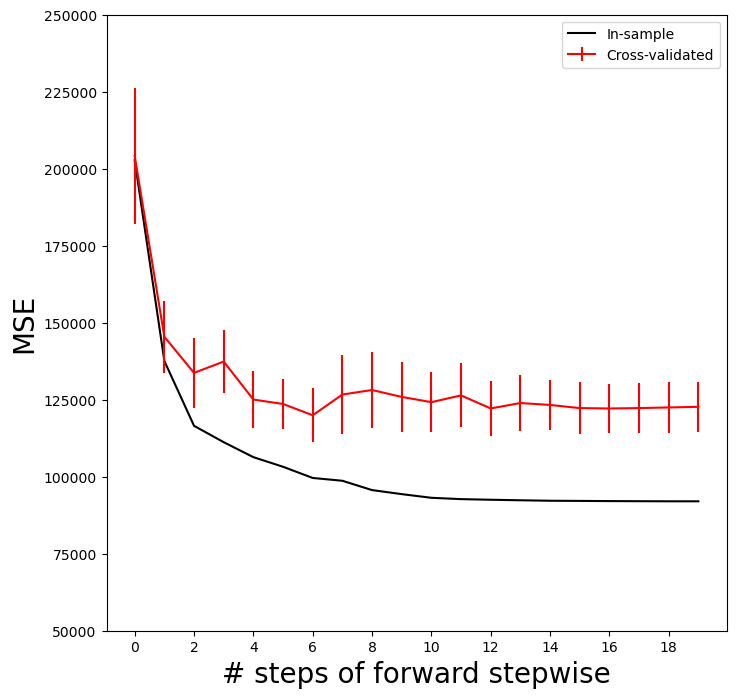

In [90]:
ax.errorbar(np.arange(n_steps),
cv_mse.mean(1),
cv_mse.std(1) / np.sqrt(K),
label='Cross-validated',
c='r') # color red
ax.set_ylim([50000,250000])
ax.legend()
mse_fig

In [92]:
validation = skm.ShuffleSplit(n_splits=1,
test_size=0.2,
random_state=0)
for train_idx , test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
Y[train_idx])
Yhat_val = full_path.predict(Hitters.iloc[test_idx])
errors = (Yhat_val - Y[test_idx ,None])**2
validation_mse = errors.mean(0)

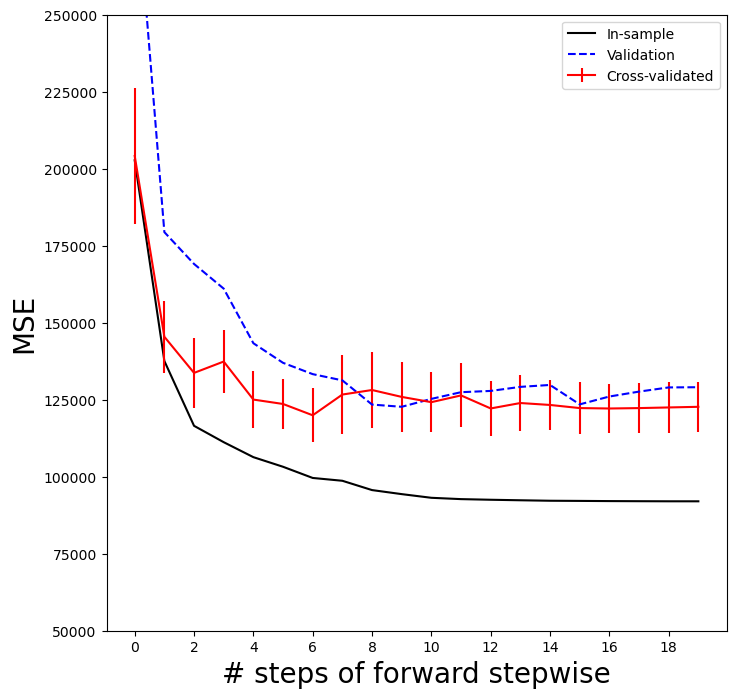

In [93]:
ax.plot(np.arange(n_steps),
validation_mse ,
'b--', # color blue, broken line
label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim([50000,250000])
ax.legend()
mse_fig

### Forward stepwise

In [94]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [95]:
 path = fit_path(X,
Y,
max_nonzeros=X.shape[1])


Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


In [96]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555494,
 'lambda_0': 0.011416248027450194,
 'M': 0.5829861733382014,
 'Time_exceeded': False}

In [120]:
import numpy as np

# 1. Center and scale features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
Xs = (X - X_mean) / X_std

# 2. Center target
Y_centered = Y - Y.mean()

# 3. Create lambda values (alphas)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

# 4. Compute SVD of Xs
U, s, Vt = np.linalg.svd(Xs, full_matrices=False)

# 5. Compute UTy (U^T @ y)
UTy = U.T @ Y_centered

# 6. Reshape lambdas for broadcasting (100, 1)
lambdas = lambdas.reshape(-1, 1)

# 7. Compute d = s / (s^2 + lambda) for all alphas
d = s / (s**2 + lambdas)

# 8. Multiply d by UTy
A = d * UTy  # Element-wise multiplication with broadcasting

# 9. Compute coefficients for all alphas
coef_all = A @ Vt  # (100, n_features)

# 10. Transpose to get (n_features, 100)
soln_array = coef_all.T

# 11. Verify shape
print("Solution array shape:", soln_array.shape)

Solution array shape: (19, 100)


In [98]:
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

AtBat        Hits      HmRun       Runs        RBI  \
negative log(lambda)                                                            
-12.310855              0.000800    0.000889   0.000695   0.000851   0.000911   
-12.078271              0.001010    0.001122   0.000878   0.001074   0.001150   
-11.845686              0.001274    0.001416   0.001107   0.001355   0.001451   
-11.613102              0.001608    0.001787   0.001397   0.001710   0.001831   
-11.380518              0.002029    0.002255   0.001763   0.002158   0.002310   
...                          ...         ...        ...        ...        ...   
 9.784658            -290.823989  336.929968  37.322686 -59.748520 -26.507086   
 10.017243           -290.879272  337.113713  37.431373 -59.916820 -26.606957   
 10.249827           -290.923382  337.260446  37.518064 -60.051166 -26.686604   
 10.482412           -290.958537  337.377455  37.587122 -60.158256 -26.750044   
 10.714996           -290.986528  337.470648  37.642077 -60.243522 -26.800522   

                           Walks      Years      CAtBat      CHits     CHmRun  \
negative log(lambda)                                                            
-12.310855              0.000900   0.000812    0.001067   0.001113   0.001064   
-12.078271              0.001135   0.001025    0.001346   0.001404   0.001343   
-11.845686              0.001433   0.001293    0.001698   0.001772   0.001694   
-11.613102              0.001808   0.001632    0.002143   0.002236   0.002138   
-11.380518              0.002281   0.002059    0.002704   0.002821   0.002698   
...                          ...        ...         ...        ...        ...   
 9.784658             134.855915 -17.216195 -387.775826  89.573601 -12.273926   
 10.017243            134.900549 -17.108041 -388.458404  89.000707 -12.661459   
 10.249827            134.936136 -17.022194 -388.997470  88.537380 -12.971603   
 10.482412            134.964477 -16.954081 -389.423414  88.164178 -13.219329   
 10.714996            134.987027 -16.900054 -389.760135  87.864551 -13.416889   

                           CRuns        CRBI      CWalks  League[N]  \
negative log(lambda)                                                  
-12.310855              0.001141    0.001149    0.000993  -0.000029   
-12.078271              0.001439    0.001450    0.001253  -0.000037   
-11.845686              0.001816    0.001830    0.001581  -0.000046   
-11.613102              0.002292    0.002309    0.001995  -0.000058   
-11.380518              0.002892    0.002914    0.002517  -0.000073   
...                          ...         ...         ...        ...   
 9.784658             476.079273  257.271255 -213.124780  31.258215   
 10.017243            477.031349  257.966790 -213.280891  31.256434   
 10.249827            477.791860  258.523025 -213.405740  31.254958   
 10.482412            478.398404  258.967059 -213.505412  31.253747   
 10.714996            478.881540  259.321007 -213.584869  31.252760   

                      Division[W]    PutOuts    Assists     Errors  \
negative log(lambda)                                                 
-12.310855              -0.000390   0.000609   0.000052  -0.000011   
-12.078271              -0.000492   0.000769   0.000065  -0.000014   
-11.845686              -0.000621   0.000970   0.000082  -0.000017   
-11.613102              -0.000784   0.001224   0.000104  -0.000022   
-11.380518              -0.000990   0.001544   0.000131  -0.000028   
...                           ...        ...        ...        ...   
 9.784658              -58.457857  78.761266  53.622113 -22.208456   
 10.017243             -58.448850  78.761240  53.645147 -22.198802   
 10.249827             -58.441682  78.761230  53.663357 -22.191071   
 10.482412             -58.435983  78.761230  53.677759 -22.184893   
 10.714996             -58.431454  78.761235  53.689152 -22.179964   

                      NewLeague[N]  
negative log(lambda)                
-12.310855

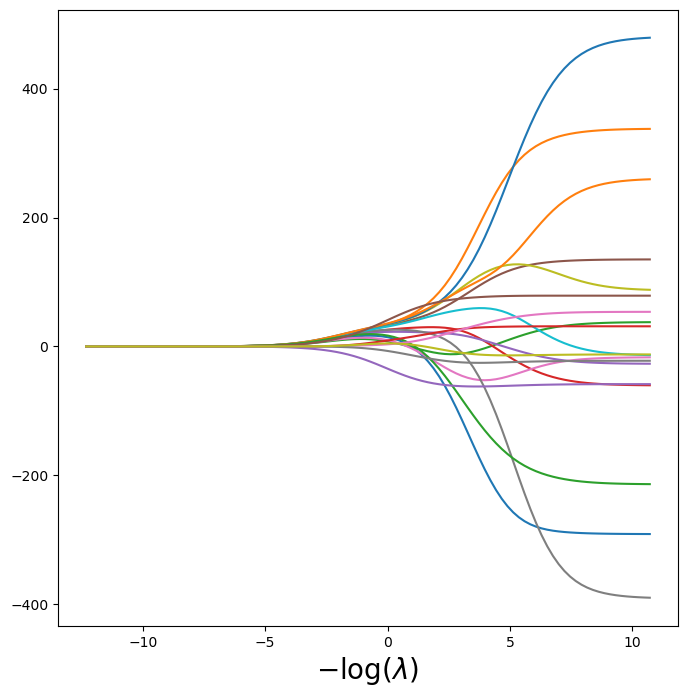

In [115]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,8))

# Plot solution path
soln_path.plot(ax=ax, legend=False)

# Use raw string to prevent escape sequence interpretation
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)  # Notice the 'r' prefix

plt.show()

In [116]:
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [117]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat


(25.53538897200662,
 AtBat           5.433750
 Hits            6.223582
 HmRun           4.585498
 Runs            5.880855
 RBI             6.195921
 Walks           6.277975
 Years           5.299767
 CAtBat          7.147501
 CHits           7.539495
 CHmRun          7.182344
 CRuns           7.728649
 CRBI            7.790702
 CWalks          6.592901
 League[N]       0.042445
 Division[W]    -3.107159
 PutOuts         4.605263
 Assists         0.378371
 Errors         -0.135196
 NewLeague[N]    0.150323
 Name: -3.240065292879872, dtype: float64)

In [102]:
np.linalg.norm(beta_hat)

24.170617201443783

In [103]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)


(0.24374766133488554, 160.42371017725816)

In [110]:
from sklearn.linear_model import Ridge  # Use optimized ridge solver

# Use Ridge instead of ElasticNet for pure L2 regularization
ridge = Ridge(alpha=lambdas[59], max_iter=10000)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.24374766133488554, max_iter=10000))])

In [105]:
 np.linalg.norm(ridge.coef_)


160.42371017725932

### Estimating Test Error of Ridge Regression

In [112]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as skm

# 1. Create Ridge model with increased iterations
ridge = Ridge(alpha=0.01, max_iter=10000)

# 2. Build pipeline with scaling
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('ridge', ridge)
])

# 3. Setup validation
validation = skm.ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# 4. Run cross-validation
results = skm.cross_validate(
    pipe,  # Use pipeline to ensure proper scaling
    X,
    Y,
    scoring='neg_mean_squared_error',
    cv=validation
)

# 5. Get and show results
test_scores = results['test_score']
mse = -test_scores  # Convert back to positive MSE
print("Mean Squared Error:", mse)

Mean Squared Error: [133821.45286659]


In [122]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as skm

# 1. Create Ridge model with high regularization (1e10)
ridge = Ridge(alpha=1e10, max_iter=10000)

# 2. Build pipeline with scaling
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('ridge', ridge)
])

# 3. Setup validation
validation = skm.ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# 4. Run cross-validation
results = skm.cross_validate(
    pipe,  # Use pipeline to ensure proper scaling
    X,
    Y,
    scoring='neg_mean_squared_error',
    cv=validation
)

# 5. Get and show results
test_scores = results['test_score']
mse = -test_scores  # Convert back to positive MSE
print("Mean Squared Error:", mse)

Mean Squared Error: [231853.39632821]


In [124]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.model_selection as skm
import numpy as np

# 1. Calculate lambdas correctly with proper parentheses
lambdas = 10 ** np.linspace(8, -2, 100) / np.std(Y)  # Fixed parentheses
lambdas = np.ravel(lambdas)  # Ensure 1D shape (100,)

# 2. Create pipeline with proper scaling
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Centers and scales features
    ('ridge', Ridge(max_iter=10000, fit_intercept=True))  # fit_intercept=True is default but explicit
])

# 3. Define parameter grid with 1D lambdas
param_grid = {'ridge__alpha': lambdas}

# 4. Run grid search
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

# 5. Retrieve results
best_alpha = grid.best_params_['ridge__alpha']
best_model = grid.best_estimator_

In [125]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
param_grid ,
cv=validation ,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.7798138828236654, max_iter=10000))])

In [126]:
grid = skm.GridSearchCV(pipe,
param_grid ,
cv=kfold,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.494832928915928, max_iter=10000))])

Text(0, 0.5, 'Cross-validated MSE')

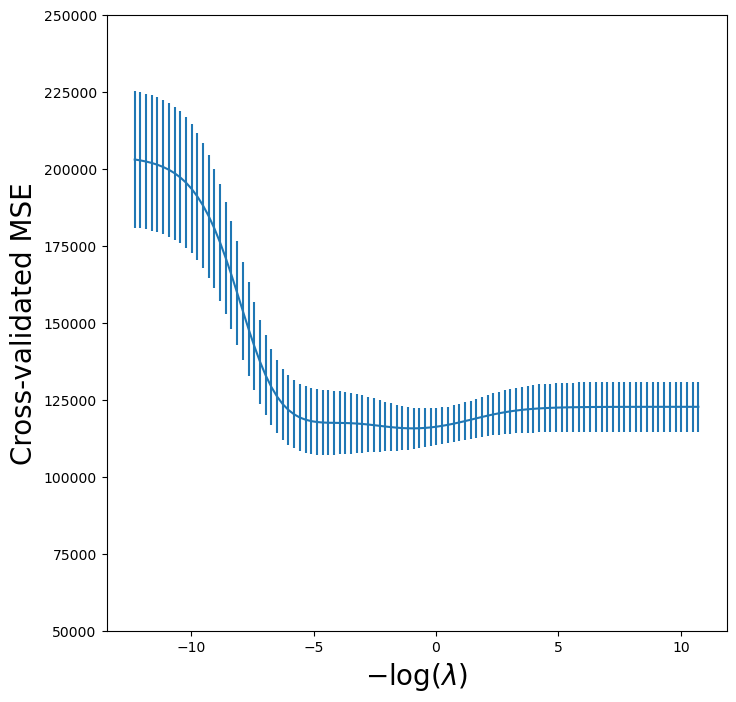

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Determine number of folds (K) from the grid search results
split_keys = [k for k in grid.cv_results_.keys() if k.startswith('split') and '_test_score' in k]
K = len(split_keys)  # Number of cross-validation folds

# Create plot with correct LaTeX formatting
ridge_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
           -grid.cv_results_['mean_test_score'],
           yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([50000,250000])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)  # Raw string for LaTeX
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [129]:
grid_r2 = skm.GridSearchCV(pipe,
param_grid ,
cv=kfold)
grid_r2.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(max_iter=10000))]),
             param_grid={'ridge__alpha': array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1...
       4.67486141e-03, 3.70474772e-03, 2.93594921e-03, 2.32668954e-03,
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05])})

Text(0, 0.5, 'Cross-validated $R^2$')

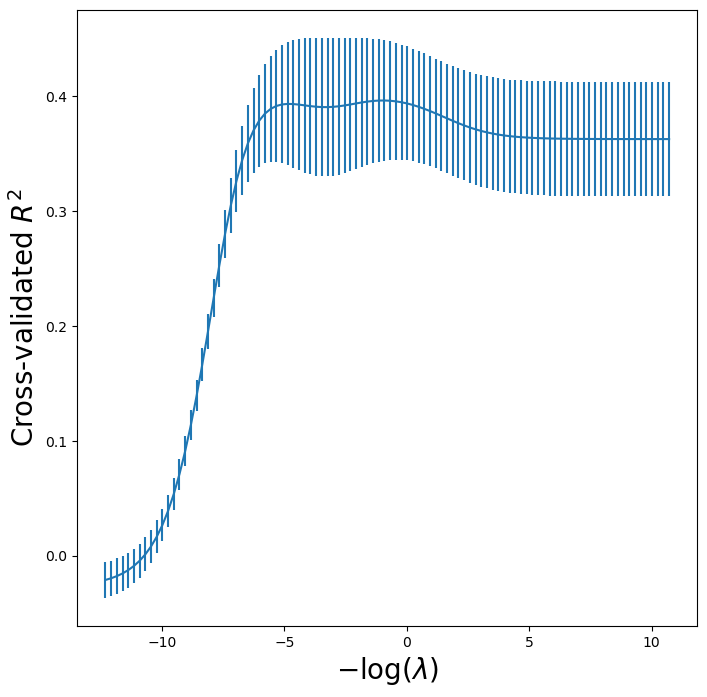

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate number of folds (K) from grid search results
split_keys = [k for k in grid_r2.cv_results_.keys() if k.startswith('split') and '_test_score' in k]
K = len(split_keys)  # Number of cross-validation folds

# Create plot with proper formatting
r2_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
           grid_r2.cv_results_['mean_test_score'],
           yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)  # Raw string for LaTeX
ax.set_ylabel(r'Cross-validated $R^2$', fontsize=20)  # Also fixed R^2 formatting

### Fast Cross-Validation for Solution Paths

In [136]:
from sklearn.linear_model import RidgeCV

# 1. Ensure lambdas is 1-dimensional
lambdas = np.ravel(lambdas)  # Shape (100,)

# 2. Create pipeline with RidgeCV (remove store_cv_values)
pipeCV = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=lambdas, cv=kfold))  # Removed deprecated parameter
])

# 3. Fit the model
pipeCV.fit(X, Y)

# 4. Retrieve best alpha and coefficients
best_alpha = pipeCV.named_steps['ridge'].alpha_
coef = pipeCV.named_steps['ridge'].coef_

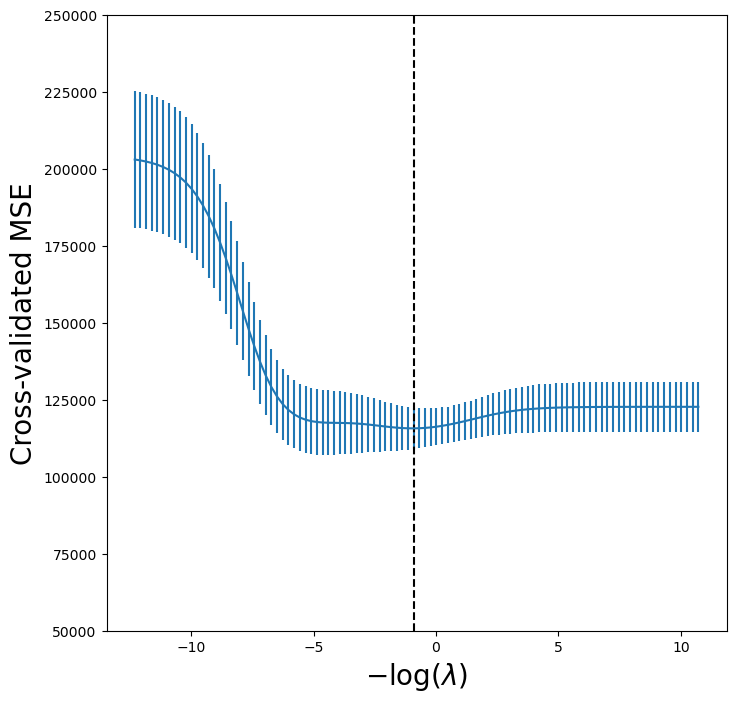

In [140]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 1. Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2. Run GridSearchCV to get full CV results
grid = GridSearchCV(pipe,
                   {'ridge__alpha': lambdas},
                   cv=kfold,
                   scoring='neg_mean_squared_error',
                   return_train_score=True)
grid.fit(X, Y)

# 3. Calculate mean MSE and standard error
mean_mse = -grid.cv_results_['mean_test_score']  # Convert back to positive MSE
std_mse = grid.cv_results_['std_test_score']
K = grid.cv.get_n_splits()  # Get number of folds
standard_error = std_mse / np.sqrt(K)

# 4. Create plot
plt.figure(figsize=(8,8))
plt.errorbar(-np.log(lambdas),
            mean_mse,
            yerr=standard_error)
plt.axvline(-np.log(grid.best_params_['ridge__alpha']), c='k', ls='--')
plt.ylim([50000, 250000])
plt.xlabel(r'$-\log(\lambda)$', fontsize=20)  # Raw string for LaTeX
plt.ylabel('Cross-validated MSE', fontsize=20)
plt.show()

In [142]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1. Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2. Run GridSearchCV to get full CV results
grid = GridSearchCV(pipe,
                   {'ridge__alpha': lambdas},
                   cv=kfold,
                   scoring='neg_mean_squared_error',
                   return_train_score=True)
grid.fit(X, Y)

# 3. Calculate mean MSE across folds
mean_mse = -grid.cv_results_['mean_test_score']  # Convert back to positive MSE

# 4. Find minimum MSE
min_mse = np.min(mean_mse)
print(f"Minimum cross-validated MSE: {min_mse:.2f}")

# 5. Optional: Find corresponding alpha
min_mse_idx = np.argmin(mean_mse)
best_alpha_for_min_mse = lambdas[min_mse_idx]
print(f"Alpha achieving minimum MSE: {best_alpha_for_min_mse:.4f}")

Minimum cross-validated MSE: 115702.35
Alpha achieving minimum MSE: 2.4948


In [143]:
tuned_ridge.coef_

array([-235.72497905,  253.05642833,    6.24782371,   -8.44450763,
          1.04320683,  112.84181561,  -49.11587947, -127.34656694,
        124.49712479,   55.04269704,  231.62603982,  124.6086533 ,
       -158.60546327,   30.55498489,  -61.37429494,   78.0012172 ,
         41.81539953,  -24.78446896,  -13.80530157])

### Evaluating Test Error of Cross-Validated Ridge

In [146]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.pipeline import Pipeline
import sklearn.model_selection as skm
import numpy as np

# 1. Define cross-validation splits
outer_valid = ShuffleSplit(n_splits=1, test_size=0.25, random_state=1)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=2)

# 2. Create RidgeCV model without store_cv_values
ridgeCV = RidgeCV(
    alphas=lambdas,  # Array of alpha values to try
    cv=inner_cv,     # Inner cross-validation
    scoring='neg_mean_squared_error'  # Scoring metric
)

# 3. Create pipeline with scaling
pipeCV = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('ridge', ridgeCV)
])

# 4. Perform outer cross-validation
results = skm.cross_validate(
    pipeCV,
    X,
    Y,
    cv=outer_valid,
    scoring='neg_mean_squared_error',
    return_estimator=True  # To access trained models
)

# 5. Get MSE scores
mse_scores = -results['test_score']  # Convert to positive MSE
print(f"Cross-validated MSE: {mse_scores[0]:.2f}")

# 6. Access the best model from outer fold
best_pipe = results['estimator'][0]
best_alpha = best_pipe.named_steps['ridge'].alpha_
print(f"Best alpha: {best_alpha:.4f}")

Cross-validated MSE: 130771.63
Best alpha: 130.0808


### The Lasso

In [147]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
l1_ratio=1,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

3.1472370031649866

In [148]:
lambdas , soln_array = skl.Lasso.path(Xs,
Y,
l1_ratio=1,
n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))

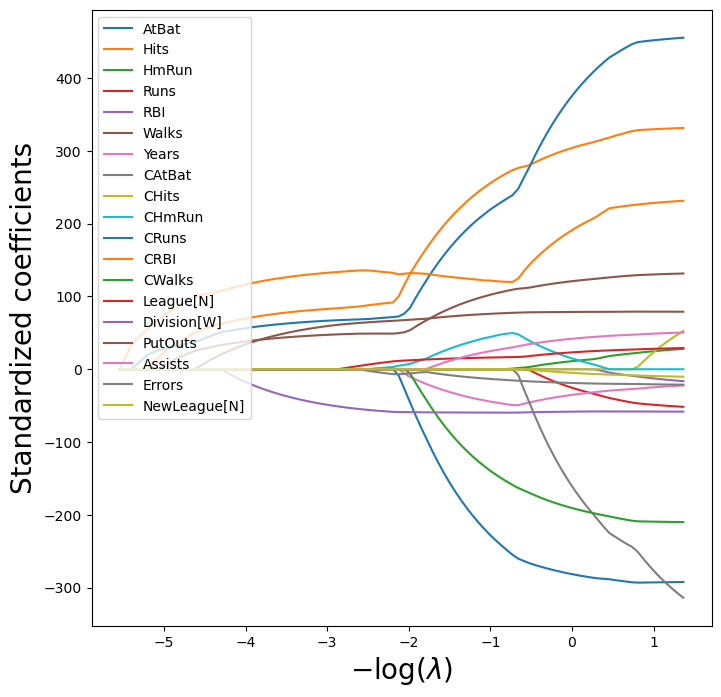

In [150]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,8))

# Plot solution path (assuming soln_path is a DataFrame)
soln_path.plot(ax=ax, legend=False)

# Add legend in upper left corner
ax.legend(loc='upper left')

# Set labels with proper LaTeX formatting
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)  # Raw string for LaTeX
ax.set_ylabel('Standardized coefficients', fontsize=20)  # Fixed typo in "coefficients"

plt.show()

In [151]:
 np.min(tuned_lasso.mse_path_.mean(1))

114690.73118253701

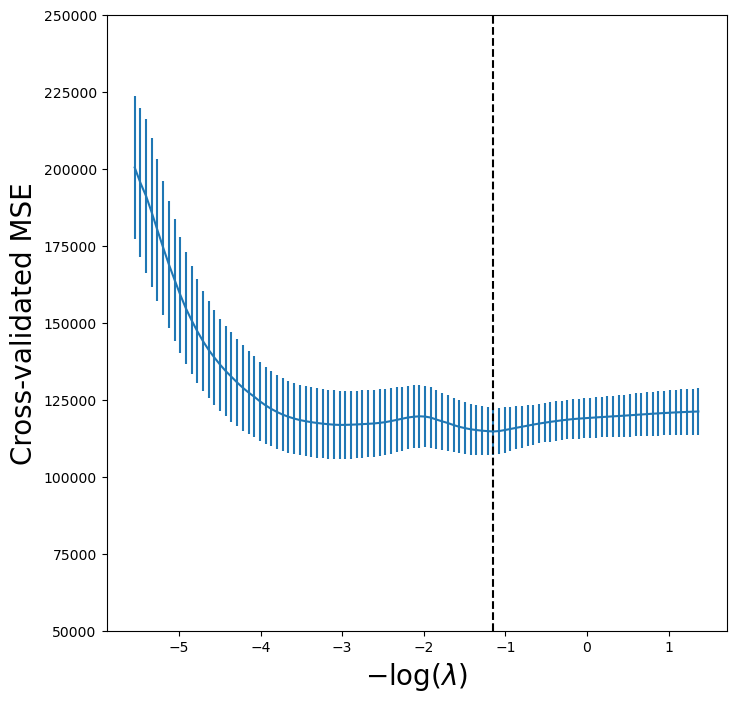

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(8,8))

# Calculate K (number of folds) if not defined
if 'K' not in locals() or 'K' not in globals():
    K = tuned_lasso.mse_path_.shape[1]  # Get number of folds from mse_path_

# Plot MSE path with error bars
ax.errorbar(-np.log(tuned_lasso.alphas_),
           tuned_lasso.mse_path_.mean(1),
           yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))

# Add vertical line at best alpha
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')

# Set axis limits and labels
ax.set_ylim([50000,250000])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)  # Raw string for LaTeX
ax.set_ylabel('Cross-validated MSE', fontsize=20)

plt.show()

In [154]:
tuned_lasso.coef_

array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])

###  PCR and PLS Regression
Principal Components Regression

In [155]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.09846131, 0.4758765 ])

In [156]:
pipe = Pipeline([('scaler', scaler),
('pca', pca),
('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([106.36859204,  21.60350456])

### skm.GridSearchCV

In [157]:
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe,
param_grid ,
cv=kfold,
scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

### Let’s plot the results as we have for other methods.

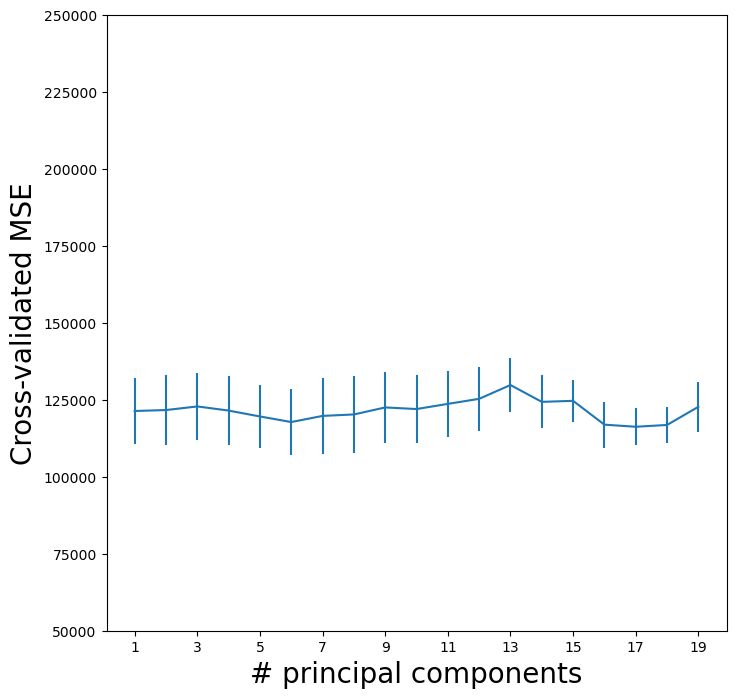

In [158]:
pcr_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);

In [159]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
Y,
cv=kfold,
scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()

204139.30692994667

In [160]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.3831424 , 0.21841076])

### Partial Least Squares

In [161]:
pls = PLSRegression(n_components=2,
scale=True)
pls.fit(X, Y)


PLSRegression()

In [162]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls,
param_grid ,
cv=kfold,
scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

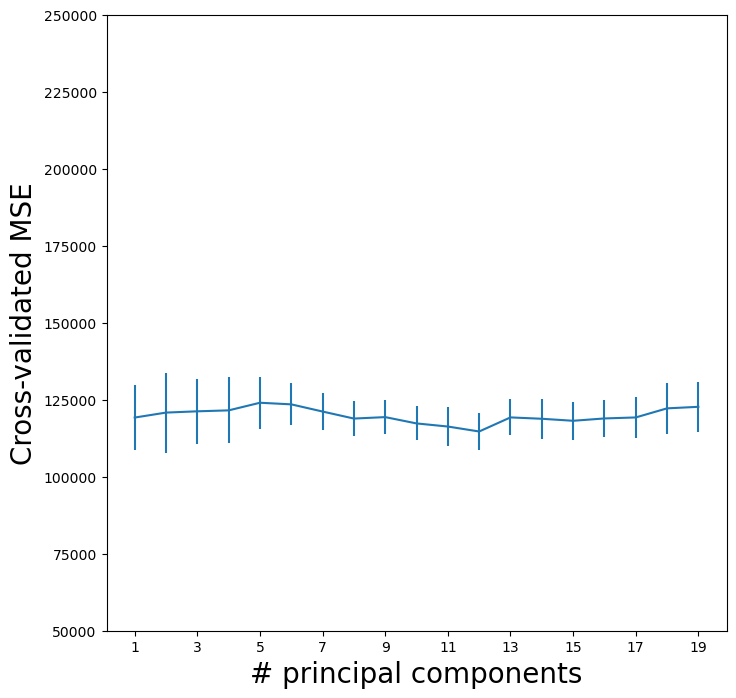

In [163]:
pls_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);

# Chapter 5;  25,06,2025: DECISION TREE

### 25,06,2025: DECISION TREE

In [24]:
# Cell 1
import pandas as pd

In [25]:
print(pd.__version__)

2.2.2


In [26]:
titanic3 = pd.read_csv(r"C:\Users\happy.frank\Desktop\BDA\Data Mining\Lab\titanic3.csv")
titanic3

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00      0      0   24160  211.3375       B5        S    2   
1       male   0.92      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.00      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.00      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.00      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...    ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.50      1      0    2665   14.4542      NaN        C  NaN   
1305  female    NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.50      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.00      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.00      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

### 8.3 Lab: Decission Tree-Based Methods

In [28]:
 # We import some of our usual libraries at this top level#
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In [29]:
# new imports needed for this lab.
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree ,
export_text)
from sklearn.metrics import (accuracy_score ,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [30]:
#  Fitting Classifcation Trees
Carseats = load_data('Carseats')
High = np.where(Carseats.Sales > 8,
"Yes",
"No")

In [31]:
 model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)

In [32]:
clf = DTC(criterion='entropy',
max_depth=3,
random_state=0)
clf.fit(X, High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
 accuracy_score(High, clf.predict(X))

0.79

In [34]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

0.47106470626493574

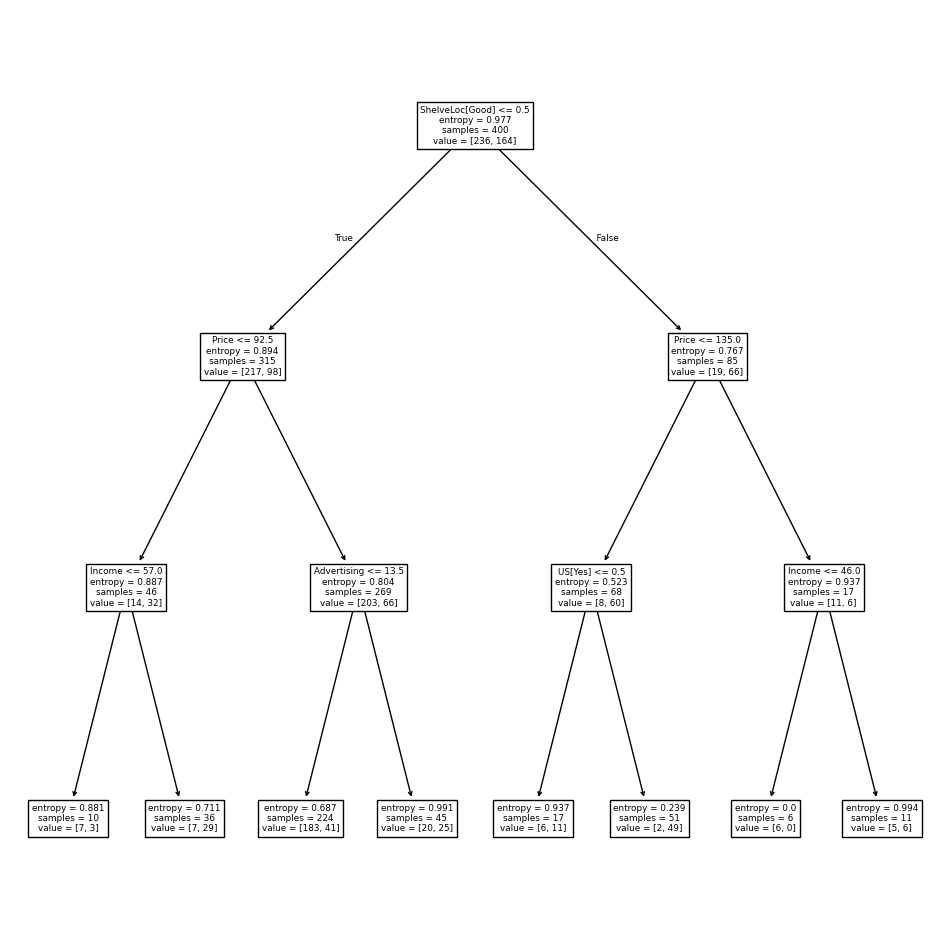

In [35]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
feature_names=feature_names ,
ax=ax);

In [36]:
print(export_text(clf,
feature_names=feature_names ,
show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [37]:
 validation = skm.ShuffleSplit(n_splits=1,
test_size=200,
random_state=0)
results = skm.cross_validate(clf,
D,
High,
cv=validation)
results['test_score']

array([0.685])

In [38]:
(X_train ,
X_test,
High_train ,
High_test) = skm.train_test_split(X,
High,
test_size=0.5,
random_state=0)

In [39]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train , High_train)
accuracy_score(High_test , clf.predict(X_test))

0.735

In [40]:
ccp_path = clf.cost_complexity_pruning_path(X_train , High_train)
kfold = skm.KFold(10,
random_state=1,
shuffle=True)

In [41]:
 grid = skm.GridSearchCV(clf,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True,
                         cv=kfold,
scoring='accuracy')
grid.fit(X_train , High_train)
grid.best_score_
                         

0.685

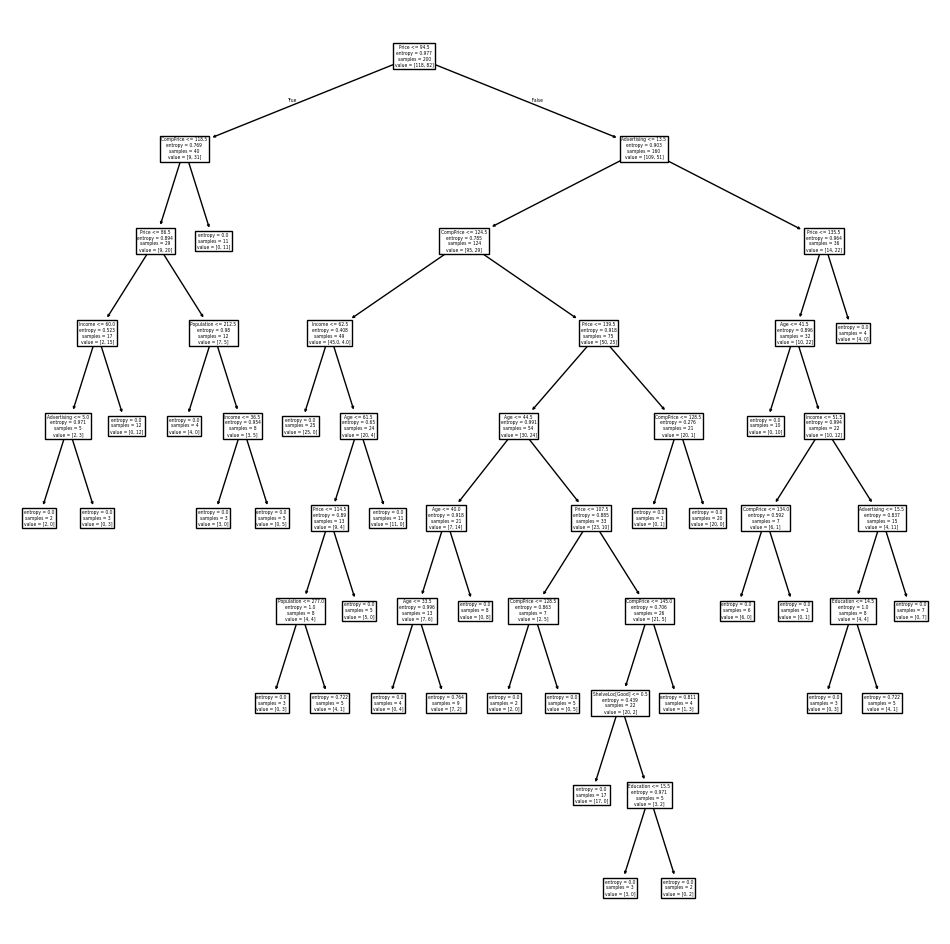

In [42]:
# look at the pruned true.
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
feature_names=feature_names ,
ax=ax);

In [43]:
best_.tree_.n_leaves

30

In [44]:
print(accuracy_score(High_test ,
best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),
High_test)
confusion

0.72


Truth      No  Yes
Predicted         
No         94   32
Yes        24   50

In [45]:
# Fitting Regression Trees
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [46]:
(X_train ,
X_test,
y_train ,
y_test) = skm.train_test_split(X,
Boston['medv'],
test_size=0.3,
random_state=0)

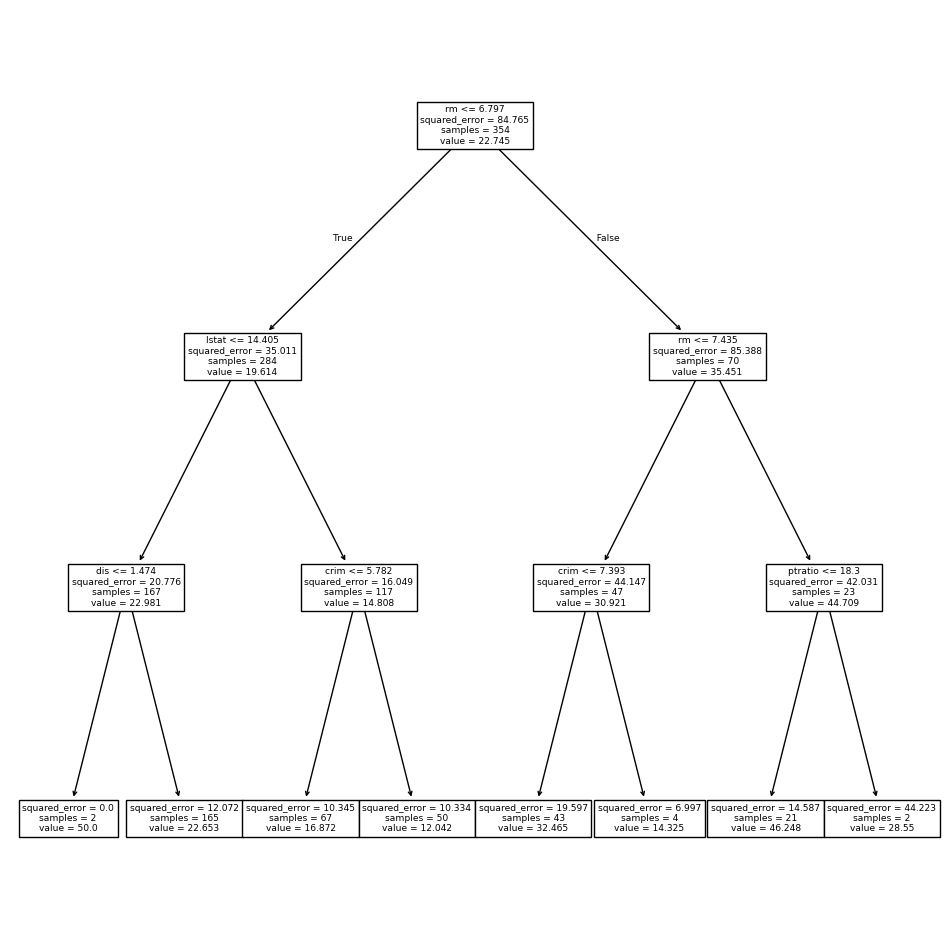

In [47]:
reg = DTR(max_depth=3)
reg.fit(X_train , y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
feature_names=feature_names ,
ax=ax);

In [48]:
ccp_path = reg.cost_complexity_pruning_path(X_train , y_train)
kfold = skm.KFold(5,
shuffle=True,
random_state=10)
grid = skm.GridSearchCV(reg,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True,
cv=kfold,
scoring='neg_mean_squared_error')
G = grid.fit(X_train , y_train)

In [49]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

28.06985754975404

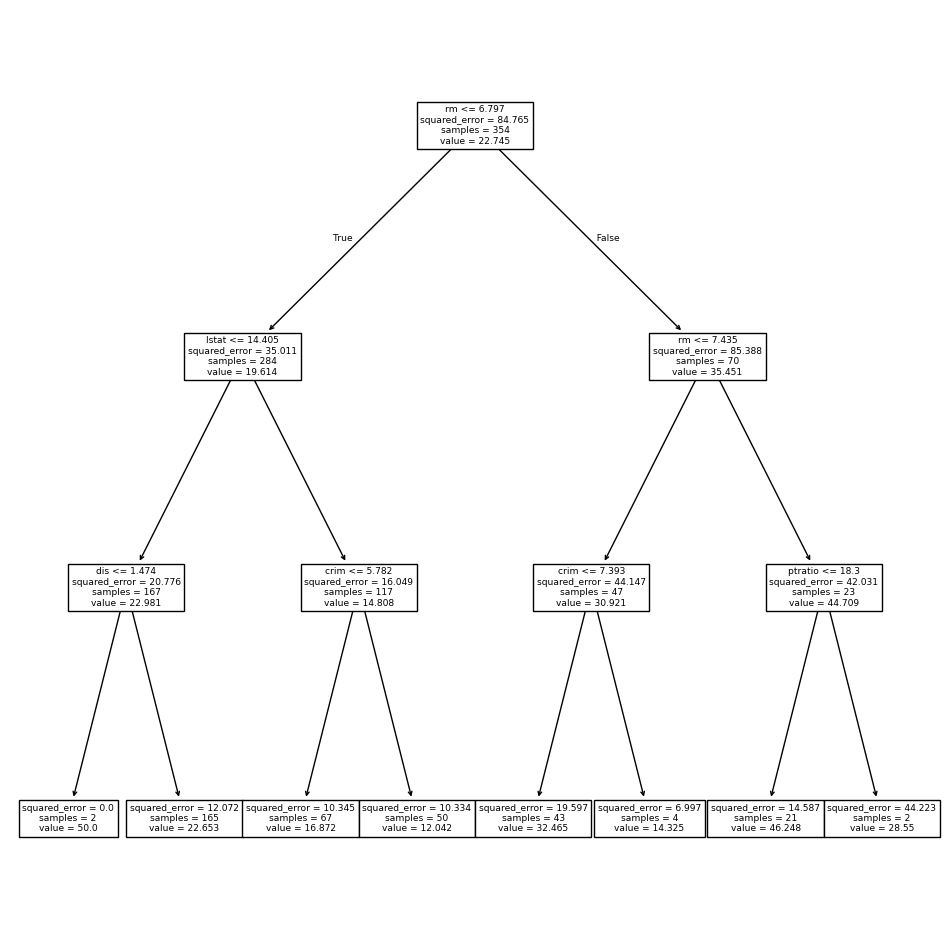

In [50]:
 ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_ ,
feature_names=feature_names ,
ax=ax);

In [51]:
# 8.3.3 Bagging and Random Forests
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train , y_train)

RandomForestRegressor(max_features=12, random_state=0)

14.634700151315787

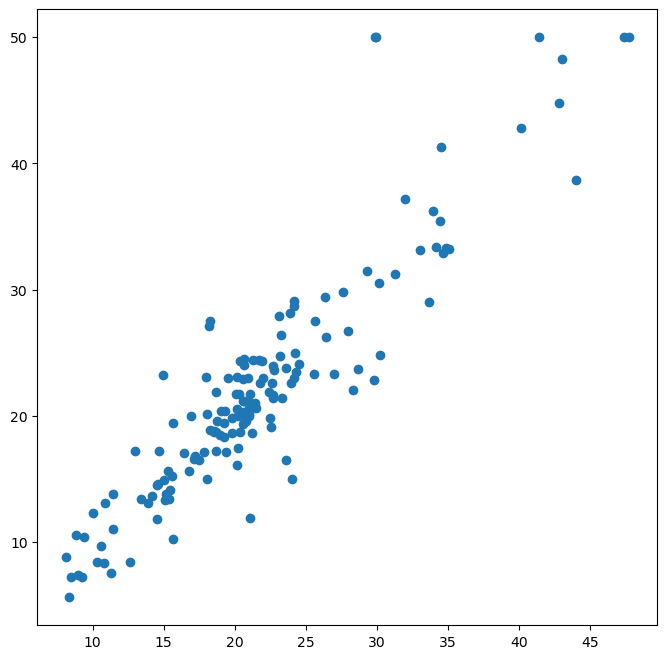

In [52]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag , y_test)
np.mean((y_test - y_hat_bag)**2)

In [53]:
bag_boston = RF(max_features=X_train.shape[1],
n_estimators=500,
random_state=0).fit(X_train , y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

In [54]:
RF_boston = RF(max_features=6,
random_state=0).fit(X_train , y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

20.04276446710527

In [55]:
feature_imp = pd.DataFrame(
{'importance':RF_boston.feature_importances_},
index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

importance
lstat      0.356203
rm         0.332163
ptratio    0.067270
crim       0.055404
indus      0.053851
dis        0.041582
nox        0.035225
tax        0.025355
age        0.021506
rad        0.004784
chas       0.004203
zn         0.002454

In [56]:
# 8.3.4 Boosting
boost_boston = GBR(n_estimators=5000,
learning_rate=0.001,
max_depth=3,
random_state=0)
boost_boston.fit(X_train , y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

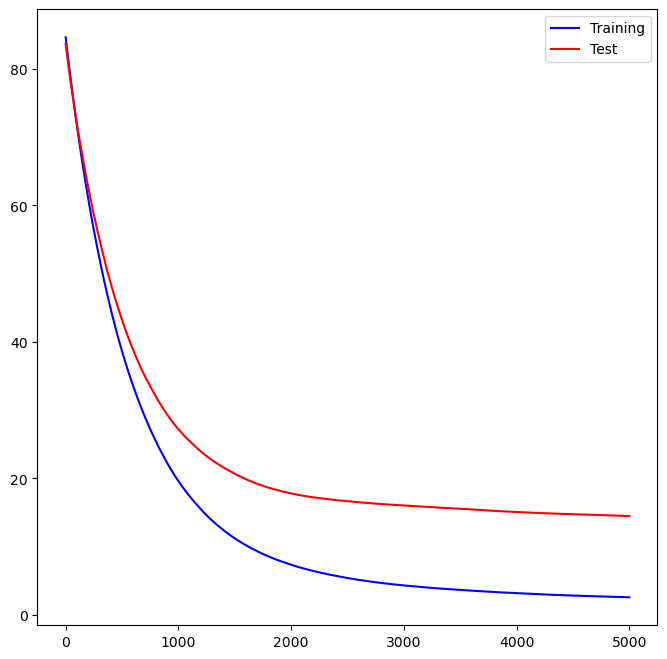

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming boost_boston, X_test, and y_test are defined earlier
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_pred in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_pred) ** 2)  # Fixed indentation

plot_idx = np.arange(boost_boston.train_score_.shape[0])
fig, ax = plt.subplots(figsize=(8, 8))  # Corrected subplots usage
ax.plot(plot_idx, boost_boston.train_score_, 'b', label='Training')
ax.plot(plot_idx, test_error, 'r', label='Test')
ax.legend()
plt.show()

In [58]:
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test - y_hat_boost)**2)

14.481405918831591

In [59]:
boost_boston = GBR(n_estimators=5000,
learning_rate=0.2,
max_depth=3,
random_state=0)
boost_boston.fit(X_train ,
y_train)
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test - y_hat_boost)**2)

14.501514553719565

In [60]:
#8.3.5 Bayesian Additive Regression Trees
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train , y_train)

BART(burnin=5, ndraw=15, random_state=0)

In [57]:
yhat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test - yhat_test)**2)

22.145009458109232

In [61]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
index=D.columns)
var_inclusion

crim       26.933333
zn         27.866667
indus      26.466667
chas       22.466667
nox        26.600000
rm         29.800000
age        22.733333
dis        26.466667
rad        23.666667
tax        24.133333
ptratio    24.266667
lstat      31.000000
dtype: float64

### 26,06,2025: 9 Support Vector Machines

## 9.6 Lab: Support Vector Machines

## we use the sklearn.svm library to demonstrate the support
vector classifer and the support vector machine.

In [62]:
# usual libraries.
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

In [64]:
# new imports needed for this lab.
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [63]:
# We will use the function RocCurveDisplay.from_estimator() to produce RocCurve

In [65]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

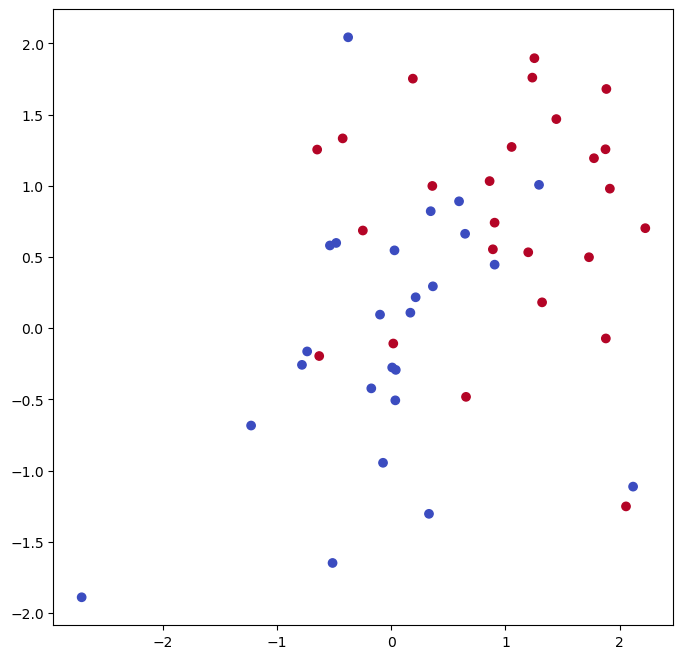

In [66]:
#9.6.1 Support Vector Classifer
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [67]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

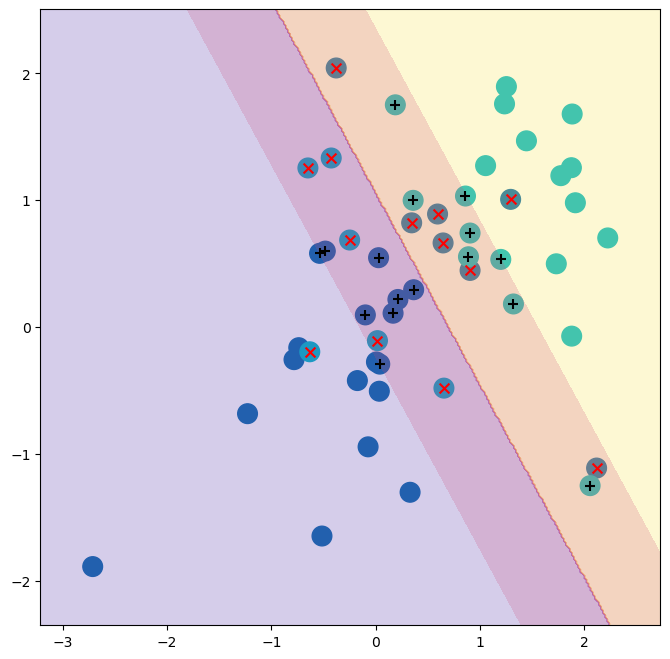

In [68]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear ,
ax=ax)

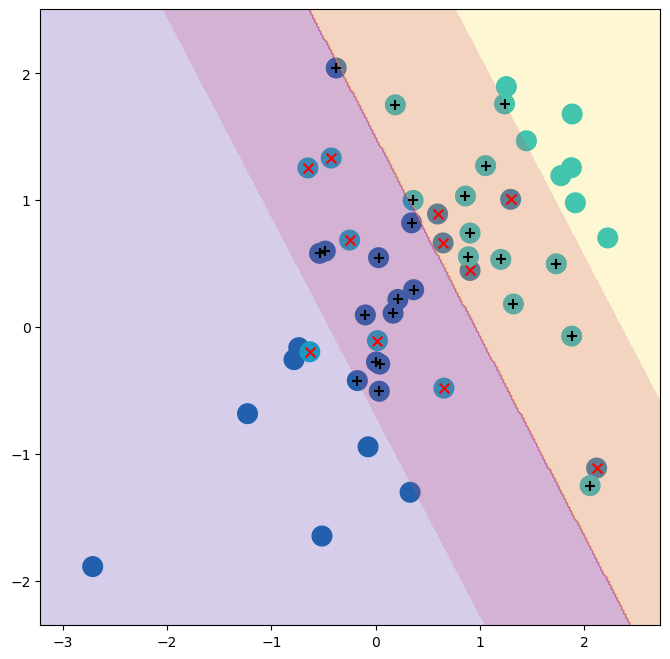

In [69]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

In [70]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [71]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [72]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [73]:
 X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [74]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth      -1   1
Predicted        
-1          8   4
 1          2   6

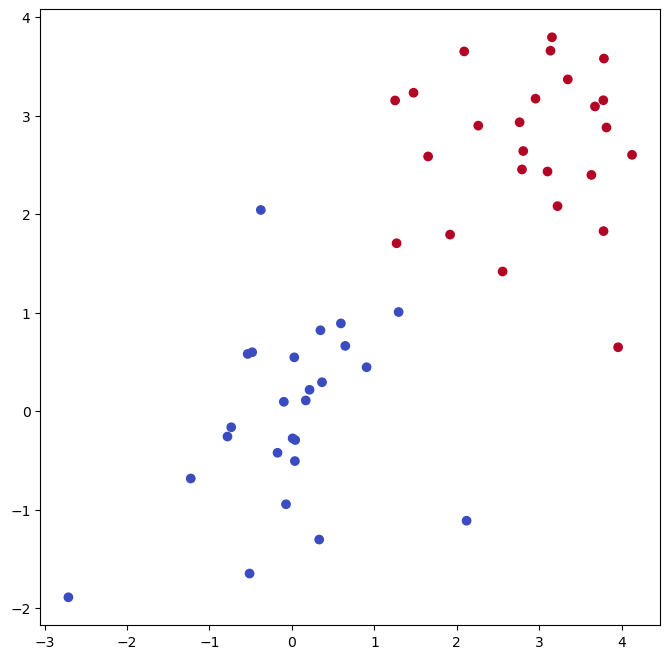

In [75]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [76]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth      -1   1
Predicted        
-1         25   0
 1          0  25

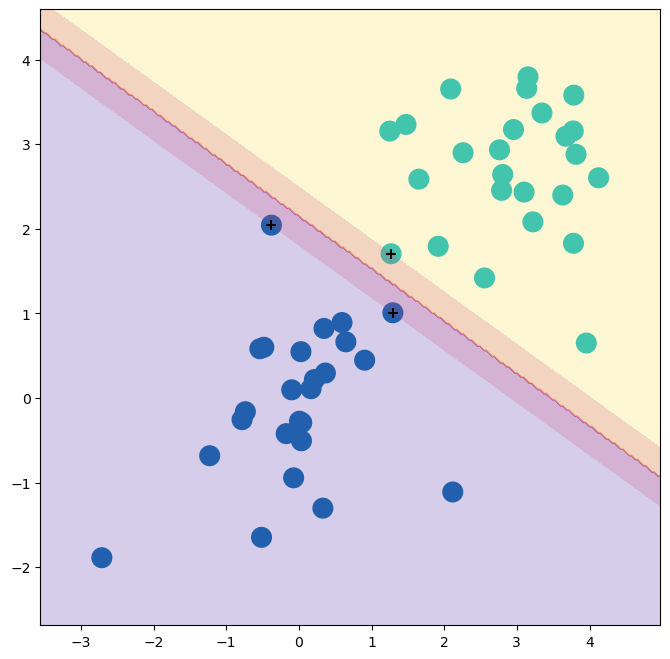

In [77]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

In [78]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth      -1   1
Predicted        
-1         25   0
 1          0  25

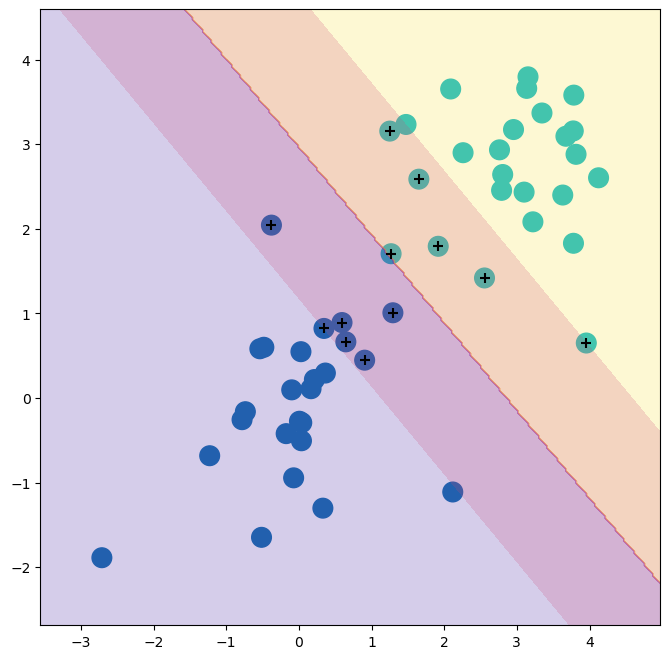

In [79]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

In [80]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

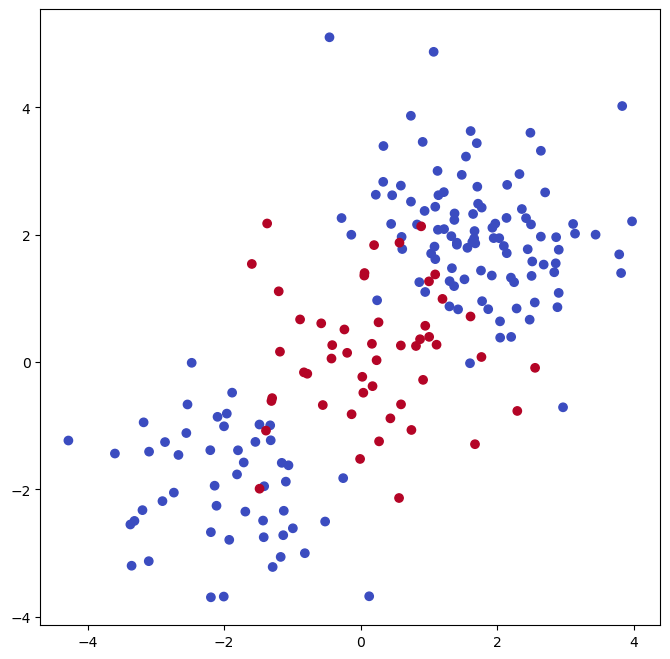

In [81]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [82]:
(X_train ,
X_test,
y_train ,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

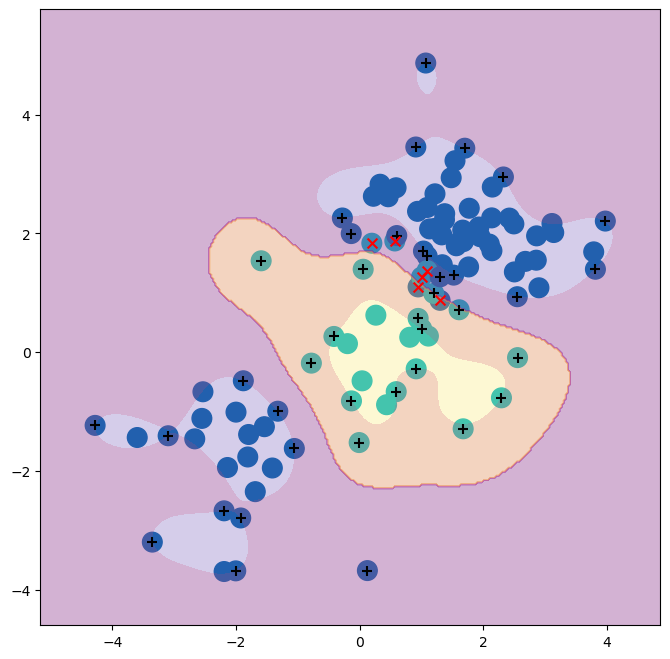

In [83]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

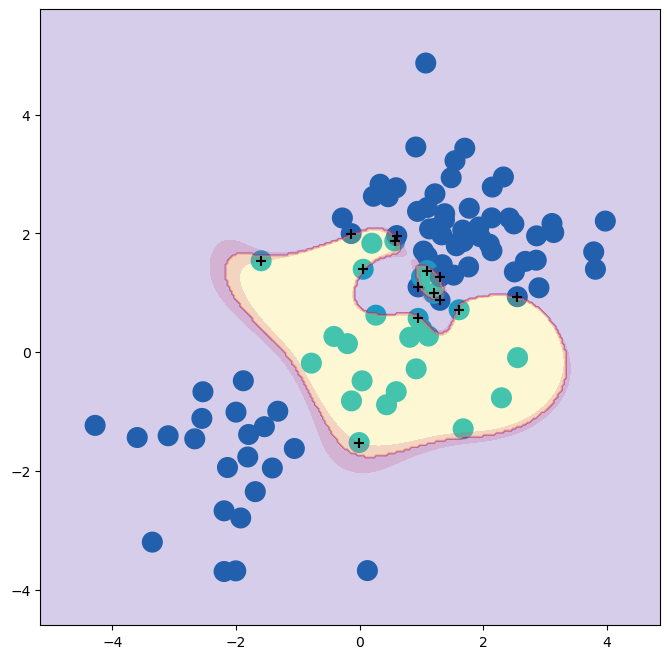

In [84]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

In [85]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True,
cv=kfold,
scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth       1   2
Predicted        
1          69   6
2           6  19

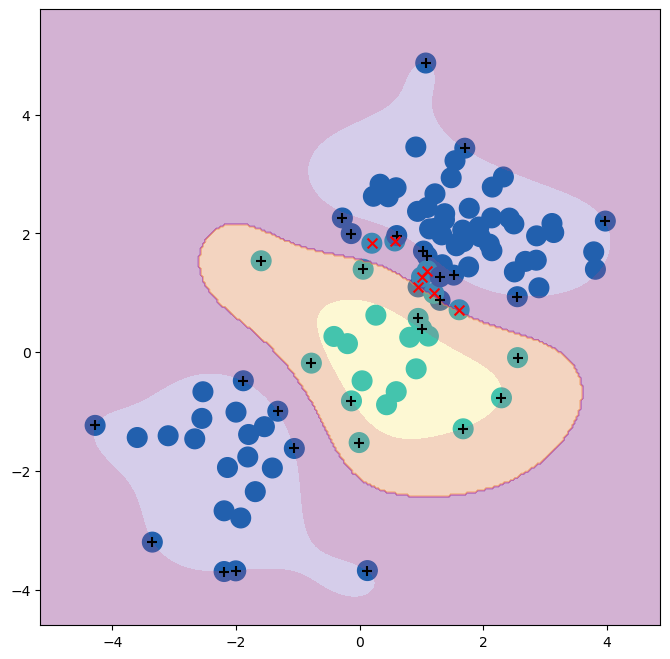

In [86]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         best_svm ,
         ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)       

### 9.6.3 ROC Curves

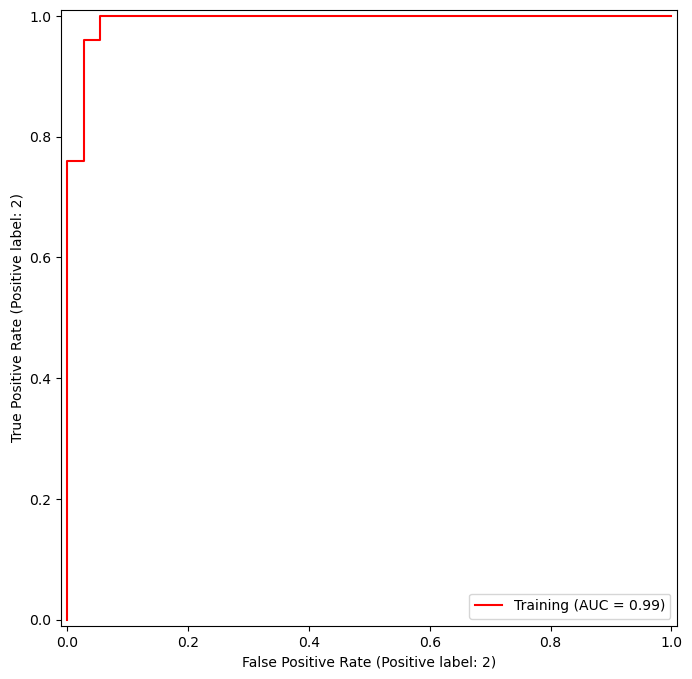

In [87]:
 fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm ,
X_train ,
y_train ,
name='Training',
color='r',
ax=ax);

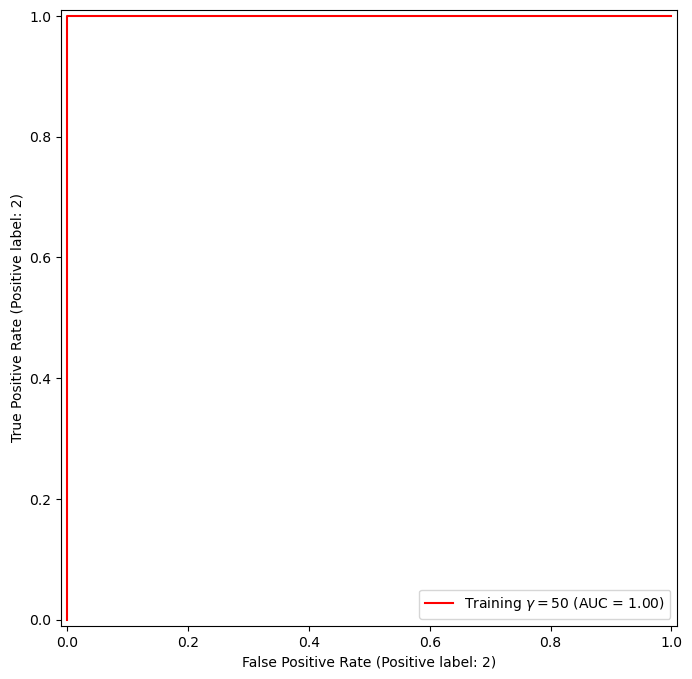

In [88]:
 svm_flex = SVC(kernel="rbf",
gamma=50,
                C=1)
svm_flex.fit(X_train , y_train)
fig, ax = subplots(figsize=(8,8))
RocCurveDisplay.from_estimator(
    svm_flex,
    X_train,
    y_train,
    name=r'Training $\gamma=50$',
    color='r',
    ax=ax
)

In [89]:
roc_curve(svm_flex ,
X_test,
y_test,
name= r'Test $\gamma=50$',
color='b',
ax=ax)
fig;

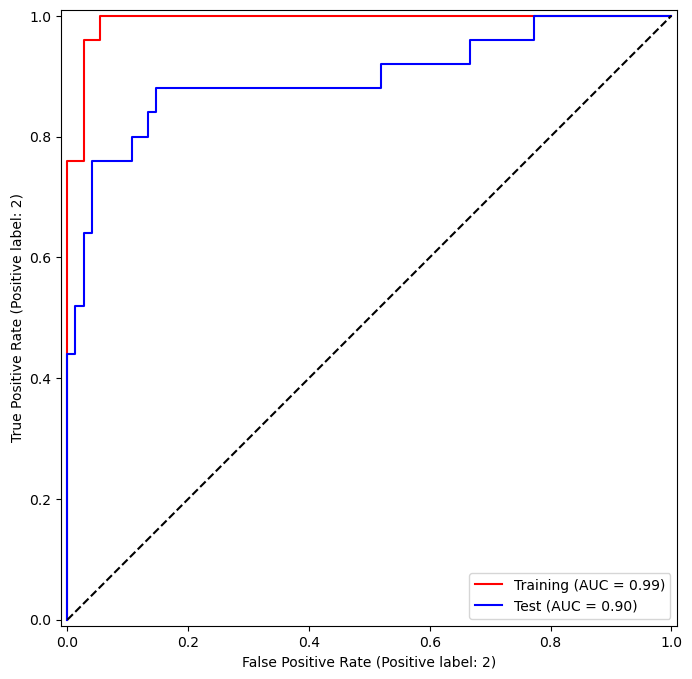

In [90]:
#Let’s look at our tuned SVM.
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('Training', 'Test')):
    
    RocCurveDisplay.from_estimator(
        best_svm,
        X_,
        y_,
        name=name,
        ax=ax,
        color=c
    )
ax.plot([0, 1], [0, 1], 'k--')
ax.legend(loc='lower right')
plt.show()

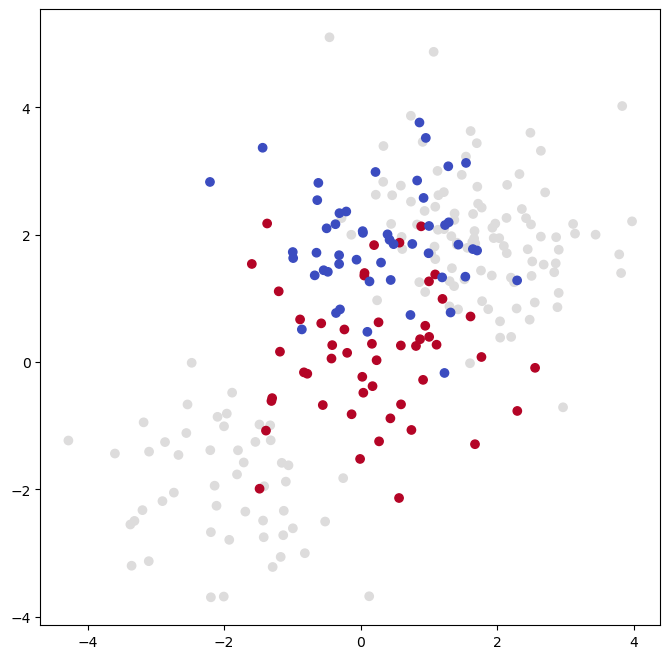

In [91]:
#9.6.4 SVM with Multiple Classes
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

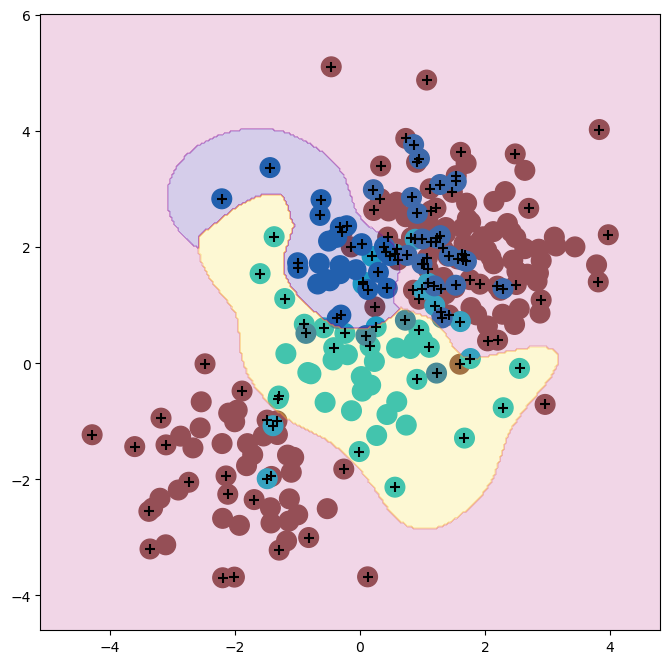

In [92]:
#We now ft an SVM to the data:
svm_rbf_3 = SVC(kernel="rbf",
C=10,
gamma=1,
decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_rbf_3 ,
scatter_cmap=cm.tab10,
ax=ax)

In [97]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [98]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth      1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20

In [102]:
confusion_table(khan_linear.predict(Khan['xtest']),
Khan['ytest'])

Truth      1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5

# 4 Classifcation

### Chapter 6, question:3 Quadratic Discriminant Analysis (QDA).

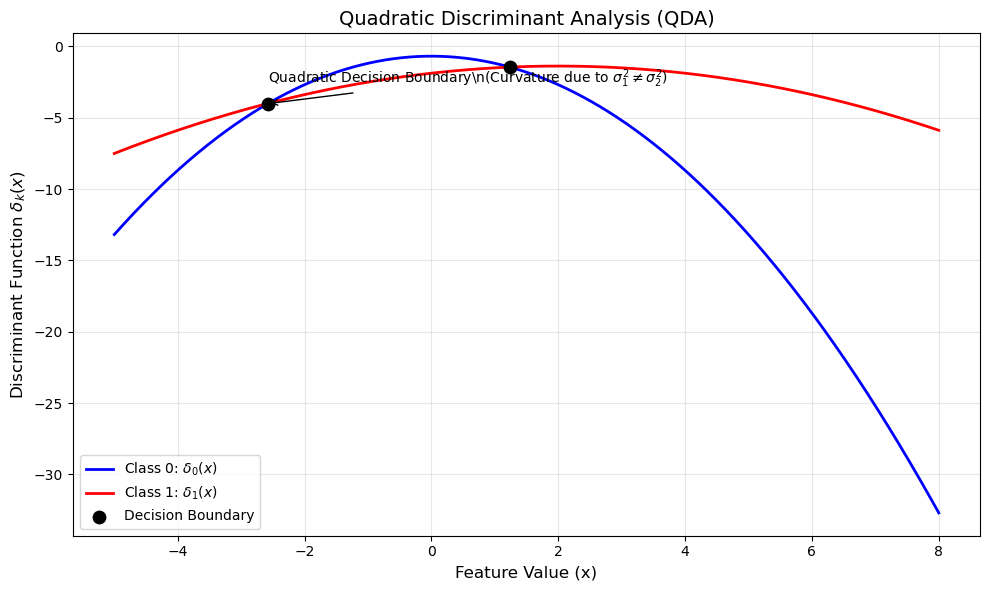

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters for two classes
mu = [0, 2]          # Class-specific means
sigma2 = [1, 4]       # Class-specific variances (different)
priors = [0.5, 0.5]   # Prior probabilities

# Generate discriminant function for class k
def discriminant(x, k):
    return np.log(priors[k]) - 0.5 * np.log(sigma2[k]) - ((x - mu[k])**2) / (2 * sigma2[k])

# Generate x values
x = np.linspace(-5, 8, 1000)

# Compute discriminant functions
delta0 = discriminant(x, 0)  # Class 0
delta1 = discriminant(x, 1)  # Class 1

# Find decision boundary (where delta0 = delta1)
boundary_points = x[np.where(np.diff(np.sign(delta0 - delta1)))[0]]

# Plotting
plt.figure(figsize=(10, 6))

# Plot discriminant functions - FIXED: using raw strings for LaTeX
plt.plot(x, delta0, 'b-', label=r'Class 0: $\delta_0(x)$', linewidth=2)
plt.plot(x, delta1, 'r-', label=r'Class 1: $\delta_1(x)$', linewidth=2)

# Plot decision boundary
plt.scatter(boundary_points, discriminant(boundary_points, 0), 
            c='black', s=80, label='Decision Boundary', zorder=5)

# Add labels and title - FIXED: raw string for LaTeX
plt.title("Quadratic Discriminant Analysis (QDA)", fontsize=14)
plt.xlabel("Feature Value (x)", fontsize=12)
plt.ylabel(r"Discriminant Function $\delta_k(x)$", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Highlight quadratic nature - FIXED: raw string for LaTeX
plt.annotate(r'Quadratic Decision Boundary\n(Curvature due to $\sigma_1^2 \neq \sigma_2^2$)', 
             xy=(boundary_points[0], discriminant(boundary_points, 0)[0]),
             xytext=(0, 15), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10)

plt.tight_layout()
plt.show()

# Chapter 6, question:8

In [105]:
# Given error rates
logistic_train_error = 0.20
logistic_test_error = 0.30
knn_avg_error = 0.18

# Calculate 1-NN test error (training error = 0 for K=1)
knn_test_error = 2 * knn_avg_error  # Since (0 + test_error)/2 = avg_error

# Compare test errors
print(f"Logistic Regression Test Error: {logistic_test_error:.0%}")
print(f"1-NN Test Error: {knn_test_error:.0%}")

if logistic_test_error < knn_test_error:
    print("\nConclusion: Prefer Logistic Regression (lower test error).")
else:
    print("\nConclusion: Prefer 1-NN.")

Logistic Regression Test Error: 30%
1-NN Test Error: 36%

Conclusion: Prefer Logistic Regression (lower test error).


# Chapter 6, question:13

In [ ]:
Step 1: Install and Import Required Packages

In [106]:
!pip install ISLP scikit-learn statsmodels matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
Step 2: Load Data and Initial Exploration

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Load dataset
Weekly = load_data('Weekly')
print(Weekly.head())
print("\nDataset dimensions:", Weekly.shape)
print("\nData types:\n", Weekly.dtypes)
print("\nSummary statistics:\n", Weekly.describe())

# Check for missing values
print("\nMissing values:\n", Weekly.isnull().sum())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

Dataset dimensions: (1089, 9)

Data types:
 Year            int64
Lag1          float64
Lag2          float64
Lag3          float64
Lag4          float64
Lag5          float64
Volume        float64
Today         float64
Direction    category
dtype: object

Summary statistics:
               Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min  

In [ ]:
Step 3: Visual Analysis (Part a)

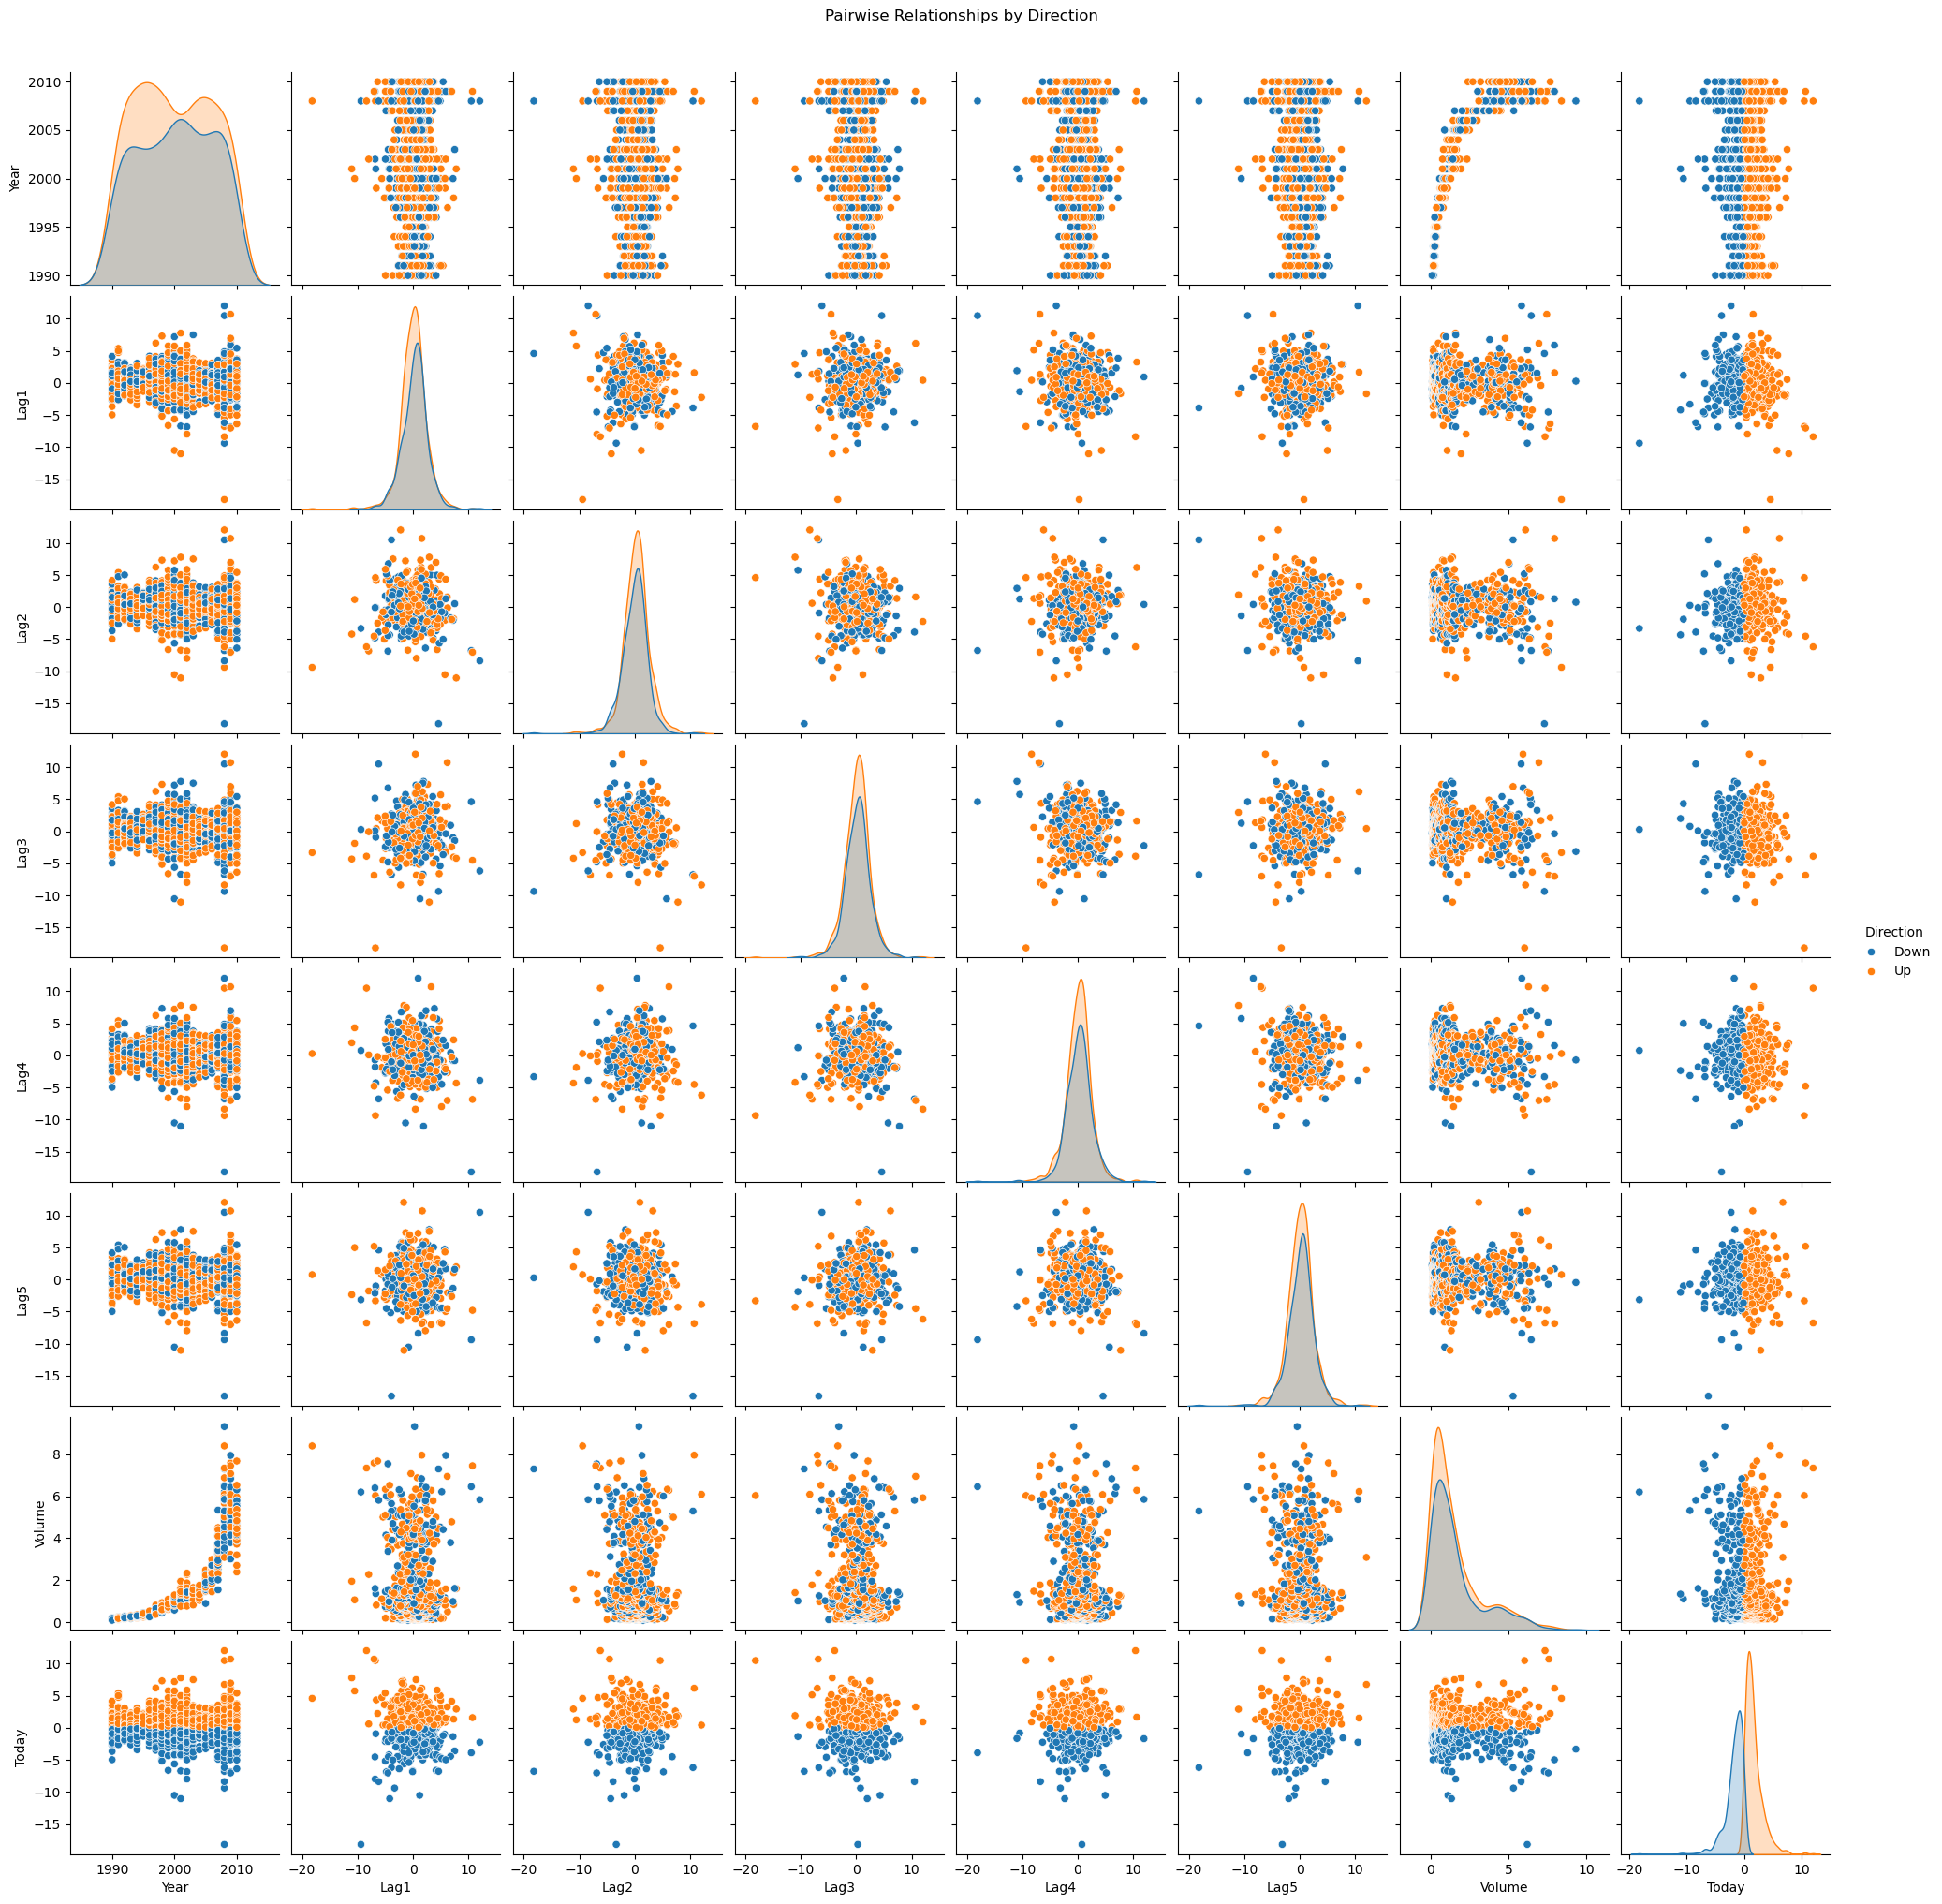

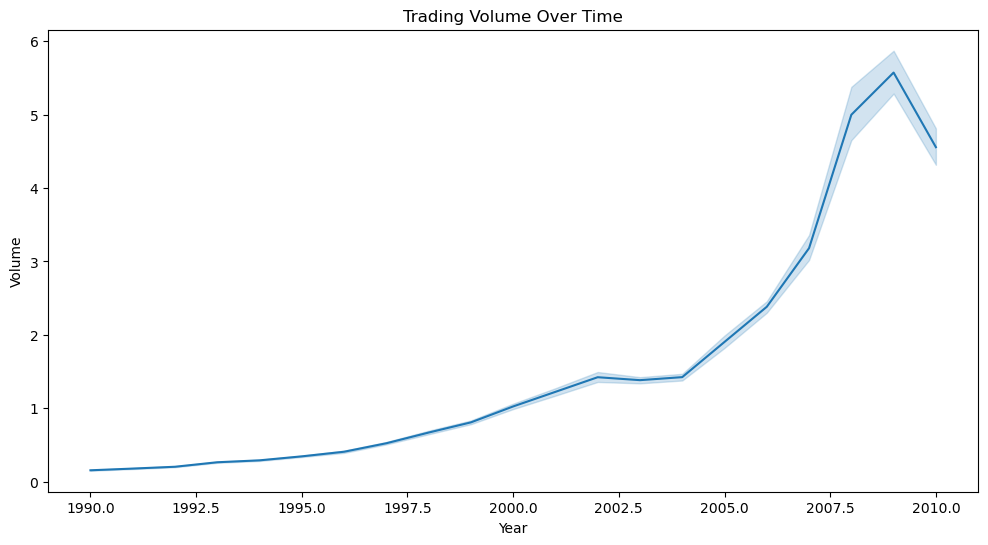

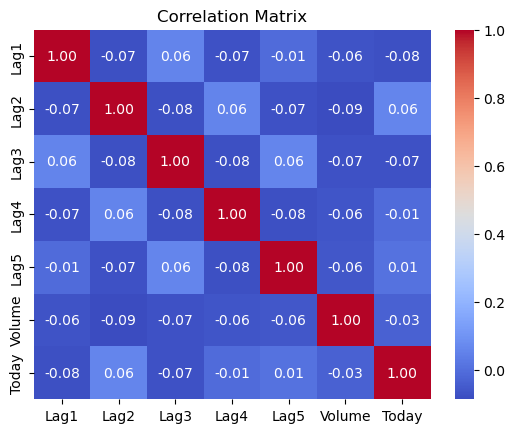

In [108]:
# Pairplot of numerical variables
sns.pairplot(Weekly, hue='Direction', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Direction', y=1.02)
plt.show()

# Yearly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Volume', data=Weekly)
plt.title('Trading Volume Over Time')
plt.show()

# Correlation heatmap
corr_matrix = Weekly.drop(columns=['Year', 'Direction']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Step 4: Full Dataset Logistic Regression (Part b & c)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Prepare data
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = Weekly['Direction']

# Fit logistic regression
logit_full = LogisticRegression(max_iter=1000)
logit_full.fit(X, y)

# Significance of predictors (using statsmodels for p-values)
import statsmodels.api as sm
logit_sm = sm.Logit((y == 'Up').astype(int), sm.add_constant(X))
logit_result = logit_sm.fit()
print(logit_result.summary())

# Confusion matrix
y_pred = logit_full.predict(X)
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:\n", cm)
print("Overall Accuracy:", accuracy_score(y, y_pred))

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 28 Jun 2025   Pseudo R-squ.:                0.006580
Time:                        17:42:10   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [ ]:
Step 5: Train-Test Split (1990-2008 vs 2009-2010)

In [112]:
# Split data
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]
X_train = train[['Lag2']]
y_train = train['Direction']
X_test = test[['Lag2']]
y_test = test['Direction']

In [ ]:
Step 6: Logistic Regression with Lag2 Only (Part d)

In [113]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", cm)
print("Accuracy:", acc)

Logistic Regression Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625


In [ ]:
Step 7: LDA (Part e)

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("LDA Confusion Matrix:\n", cm)
print("Accuracy:", acc)

LDA Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625


In [ ]:
Step 8: QDA (Part f)

In [115]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("QDA Confusion Matrix:\n", cm)
print("Accuracy:", acc)

QDA Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.5865384615384616


In [ ]:
Step 9: KNN (K=1) (Part g)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("KNN (K=1) Confusion Matrix:\n", cm)
print("Accuracy:", acc)

KNN (K=1) Confusion Matrix:
 [[22 21]
 [31 30]]
Accuracy: 0.5


In [ ]:
Step 10: Naive Bayes (Part h)

In [117]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Confusion Matrix:\n", cm)
print("Accuracy:", acc)

Naive Bayes Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.5865384615384616


In [ ]:
Step 11: Model Comparison (Part i)

In [118]:
models = {
    'Logistic': logit,
    'LDA': lda,
    'QDA': qda,
    'KNN1': knn1,
    'NaiveBayes': nb
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

print("Test Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
    
best_model = max(results, key=results.get)
print(f"\nBest model: {best_model} with accuracy {results[best_model]:.4f}")

Test Accuracies:
Logistic: 0.6250
LDA: 0.6250
QDA: 0.5865
KNN1: 0.5000
NaiveBayes: 0.5865

Best model: Logistic with accuracy 0.6250


In [ ]:
Step 12: Advanced Modeling (Part j)

Logistic Regression (Advanced) Accuracy: 0.5192307692307693


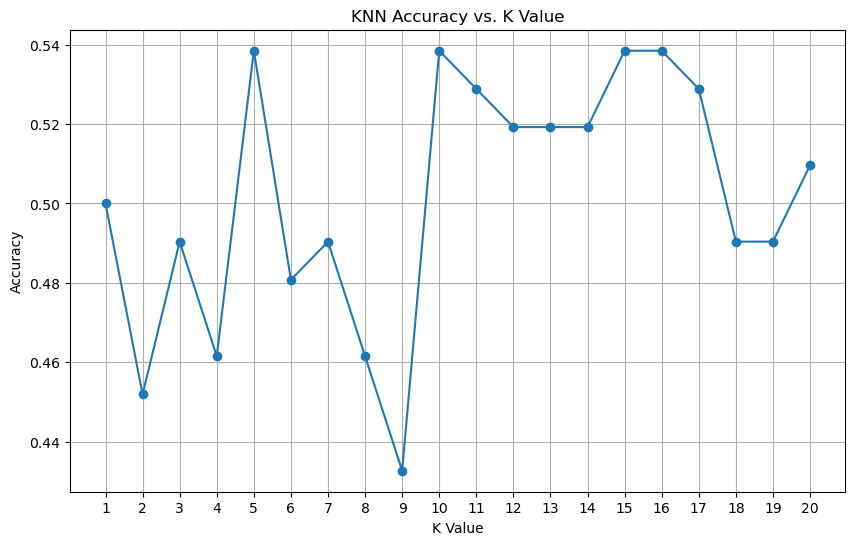

Best K: 5 with accuracy 0.5385


In [119]:
# Feature engineering
X_train_adv = train[['Lag1', 'Lag2', 'Lag3', 'Volume']]
X_test_adv = test[['Lag1', 'Lag2', 'Lag3', 'Volume']]

# Try different models with new features
logit_adv = LogisticRegression()
logit_adv.fit(X_train_adv, y_train)
y_pred = logit_adv.predict(X_test_adv)
print("Logistic Regression (Advanced) Accuracy:", accuracy_score(y_test, y_pred))

# KNN parameter tuning
k_values = range(1, 21)
knn_accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_adv, y_train)
    y_pred = knn.predict(X_test_adv)
    knn_accs.append(accuracy_score(y_test, y_pred))

# Plot KNN performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accs, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find best K
best_k = k_values[np.argmax(knn_accs)]
print(f"Best K: {best_k} with accuracy {max(knn_accs):.4f}")

# Chapter5 Resampling Methods

## Chapter5 Question3, 

In [ ]:
### Solution to k-Fold Cross-Validation
(a) Implementation of k-Fold Cross-Validation
k-fold cross-validation is implemented through these steps:

1.Random Partition: Split the dataset into k equally sized folds

2.Iterative Validation: For each iteration i (where i = 1 to k):

            Use fold i as the validation set

            Train the model on the remaining k-1 folds

            Compute validation error on fold i

3.Aggregate Results: Calculate final performance metric as the average of all k validation errors

In [120]:
# Python implementation using scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(
    model, 
    X, 
    y, 
    cv=5,  # Number of folds
    scoring='accuracy'
)
print(f"Cross-validation scores: {scores}")
print(f"Average accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.55045872 0.5733945  0.55045872 0.52752294 0.47004608]
Average accuracy: 0.5344


In [121]:
# (b) What are the advantages and disadvantages of k-fold cross-validation relative to:
(b) Advantages and Disadvantages
i. Compared to Validation Set Approach
Advantages:

Reduced Bias: Uses all data for both training and validation

More Reliable Estimate: Multiple validation sets provide robust error estimate

Avoids Wasteful Split: No dedicated "test-only" portion (full data utilization)

# Disadvantages:

Higher Computation: Requires training k models instead of 1

Complex Implementation: More complex than single train/test split

ii. Compared to LOOCV (Leave-One-Out Cross-Validation)
Advantages:

Computational Efficiency: Trains only k models vs n models (where n = sample size)

Lower Variance: More stable estimates due to correlated validation sets

Better Bias-Variance Tradeoff: Larger training sets per fold than LOOCV

# Disadvantages:

Higher Bias: Training sets are smaller than in LOOCV

Less Comprehensive: Evaluates fewer model configurations than LOOCV

# Key Comparison Summary

Method	        Computational Cost	Variance	Bias	Data Utilization
Validation Set	Low	                 High	    High	Partial (50-80%)
LOOCV	        Very                 High	    High	Low	Full (100%)
k-Fold CV	    Moderate	         Low	    Medium	Full (100%)

# Chapter5 Question8

### (a) Data Generation

In [122]:
## Solution to Simulated Data Analysis with Cross-Validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Set random seed
rng = np.random.default_rng(1)

# Generate data
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

print(f"Number of observations (n): {len(x)}")
print(f"Number of predictors (p): 1 (single feature 'x')")
print("Data generation model: y = x - 2x² + ε, where ε ~ N(0,1)")

Number of observations (n): 100
Number of predictors (p): 1 (single feature 'x')
Data generation model: y = x - 2x² + ε, where ε ~ N(0,1)


### (b) Scatterplot of X vs Y

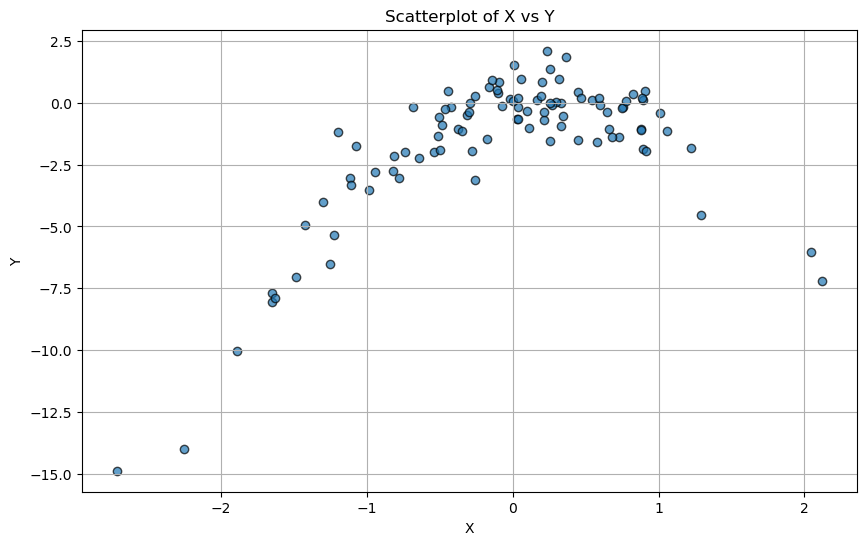

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs Y')
plt.grid(True)
plt.show()

### (c) LOOCV with Random Seed (Seed = 1)

In [124]:
def calculate_loocv(x, y, degree):
    loo = LeaveOneOut()
    model = LinearRegression()
    X_poly = PolynomialFeatures(degree).fit_transform(x.reshape(-1, 1))
    mse_scores = -cross_val_score(model, X_poly, y, cv=loo, scoring='neg_mean_squared_error')
    return np.mean(mse_scores)

# Set seed for reproducibility
np.random.seed(1)

# Calculate LOOCV errors
results = {}
for degree in [1, 2, 3, 4]:
    results[degree] = calculate_loocv(x, y, degree)

# Display results
print("LOOCV MSE Errors (Seed = 1):")
for degree, error in results.items():
    print(f"Model (degree {degree}): {error:.4f}")

LOOCV MSE Errors (Seed = 1):
Model (degree 1): 6.6330
Model (degree 2): 1.1229
Model (degree 3): 1.3018
Model (degree 4): 1.3324


### (d) Repeat LOOCV with New Random Seed (Seed = 42)

In [127]:
# Set new seed
np.random.seed(42)

# Recalculate LOOCV errors
results_new = {}
for degree in [1, 2, 3, 4]:
    results_new[degree] = calculate_loocv(x, y, degree)

# Compare results
print("\nLOOCV MSE Errors (Seed = 42):")
for degree, error in results_new.items():
    print(f"Model (degree {degree}): {error:.4f}")

print("\nComparison:")
print("Degree | Seed1 Error | Seed42 Error | Difference")
for degree in [1, 2, 3, 4]:
    diff = abs(results[degree] - results_new[degree])
    print(f"{degree:6} | {results[degree]:11.4f} | {results_new[degree]:11.4f} | {diff:.6f}")

# Explanation: Results are identical across seeds because LOOCV is deterministic - it evaluates all possible leave-one-out combinations without randomness.


LOOCV MSE Errors (Seed = 42):
Model (degree 1): 6.6330
Model (degree 2): 1.1229
Model (degree 3): 1.3018
Model (degree 4): 1.3324

Comparison:
Degree | Seed1 Error | Seed42 Error | Difference
     1 |      6.6330 |      6.6330 | 0.000000
     2 |      1.1229 |      1.1229 | 0.000000
     3 |      1.3018 |      1.3018 | 0.000000
     4 |      1.3324 |      1.3324 | 0.000000


### (e) Model Comparison

In [128]:
best_degree = min(results, key=results.get)
print(f"\nBest model: Degree {best_degree} (MSE = {results[best_degree]:.4f})")


Best model: Degree 2 (MSE = 1.1229)


### (f) Statistical Significance Analysis

In [129]:
from statsmodels.api import OLS

print("\nStatistical Significance of Coefficients:")
for degree in [1, 2, 3, 4]:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    # Fit OLS model
    model = OLS(y, X_poly).fit()
    
    # Display results
    print(f"\nDegree {degree} Model:")
    print(f"LOOCV MSE: {results[degree]:.4f}")
    print(model.summary2().tables[1][['Coef.', 'Std.Err.', 'P>|t|']])


Statistical Significance of Coefficients:

Degree 1 Model:
LOOCV MSE: 6.6330
          Coef.  Std.Err.         P>|t|
const -1.464963  0.246753  4.409621e-08
x1     1.949369  0.288690  1.036506e-09

Degree 2 Model:
LOOCV MSE: 1.1229
          Coef.  Std.Err.         P>|t|
const -0.072755  0.119134  5.428243e-01
x1     0.966273  0.126353  1.494913e-11
x2    -2.004709  0.090826  1.340068e-39

Degree 3 Model:
LOOCV MSE: 1.3018
          Coef.  Std.Err.         P>|t|
const -0.057197  0.119929  6.345015e-01
x1     1.114584  0.187472  4.448516e-08
x2    -2.047094  0.099022  3.968906e-37
x3    -0.064300  0.060081  2.872018e-01

Degree 4 Model:
LOOCV MSE: 1.3324
          Coef.  Std.Err.         P>|t|
const  0.100848  0.135818  4.596053e-01
x1     0.904998  0.204614  2.591296e-05
x2    -2.505923  0.221058  2.396026e-19
x3     0.033768  0.072510  6.424910e-01
x4     0.104217  0.045134  2.310661e-02


# Chapter 6: Linear Model Selection and Regularization

### Chapter 6: Question 3

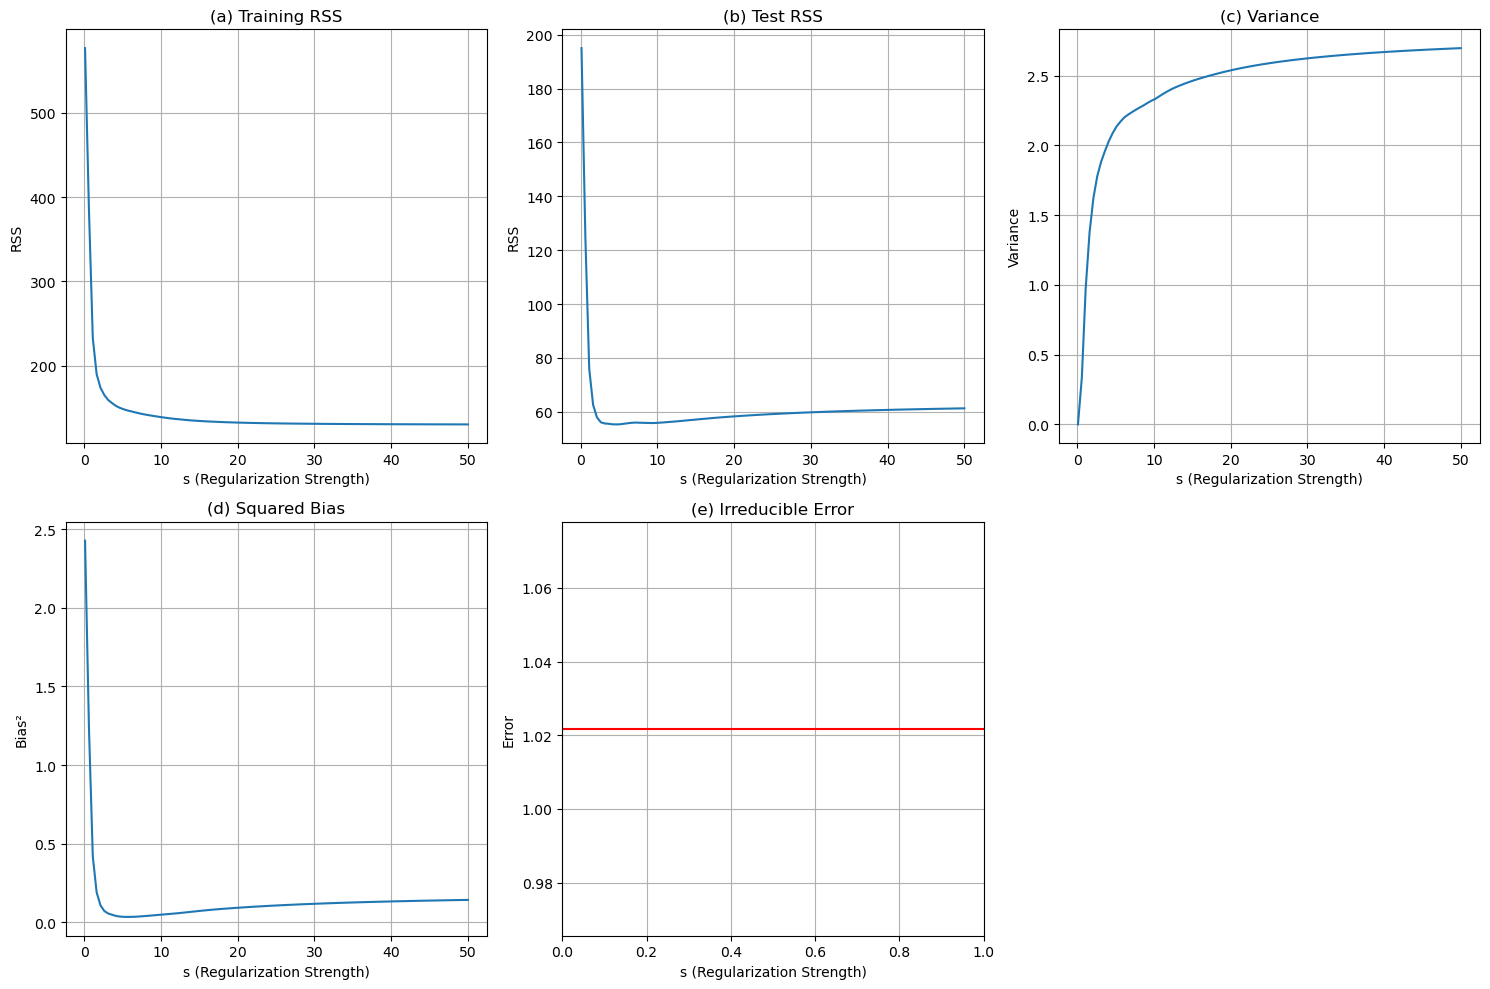

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
n = 200  # Sample size
p = 20   # Number of features
X = np.random.randn(n, p)
true_coef = np.random.randn(p)
true_coef[5:] = 0  # Make last 15 coefficients zero (sparse)
y = X @ true_coef + np.random.normal(0, 1, n)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define range of s values (L1 constraint bounds)
s_values = np.linspace(0.1, 50, 100)  # From small to large s

# Initialize storage
train_rss = []
test_rss = []
variance = []
bias_squared = []

for s in s_values:
    # Fit Lasso model with equivalent alpha (converted from s)
    alpha = 1/(2*s)  # Conversion based on Lagrangian form
    model = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=10000))
    model.fit(X_train, y_train)
    
    # Store metrics
    train_rss.append(mean_squared_error(y_train, model.predict(X_train)) * len(y_train))
    test_rss.append(mean_squared_error(y_test, model.predict(X_test)) * len(y_test))
    
    # Bias-variance decomposition (using test set)
    predictions = model.predict(X_test)
    bias_squared.append(np.mean((predictions - (X_test @ true_coef))**2))
    variance.append(np.var(predictions))

# Irreducible error (constant)
irreducible_error = np.var(y - X @ true_coef)

# Create plots
plt.figure(figsize=(15, 10))

# Training RSS
plt.subplot(231)
plt.plot(s_values, train_rss)
plt.title('(a) Training RSS')
plt.xlabel('s (Regularization Strength)')
plt.ylabel('RSS')
plt.grid(True)

# Test RSS
plt.subplot(232)
plt.plot(s_values, test_rss)
plt.title('(b) Test RSS')
plt.xlabel('s (Regularization Strength)')
plt.ylabel('RSS')
plt.grid(True)

# Variance
plt.subplot(233)
plt.plot(s_values, variance)
plt.title('(c) Variance')
plt.xlabel('s (Regularization Strength)')
plt.ylabel('Variance')
plt.grid(True)

# Squared Bias
plt.subplot(234)
plt.plot(s_values, bias_squared)
plt.title('(d) Squared Bias')
plt.xlabel('s (Regularization Strength)')
plt.ylabel('Bias²')
plt.grid(True)

# Irreducible Error
plt.subplot(235)
plt.axhline(y=irreducible_error, color='r', linestyle='-')
plt.title('(e) Irreducible Error')
plt.xlabel('s (Regularization Strength)')
plt.ylabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Results and Explanations
# (a) Training RSS Behavior

Behavior: Steadily decreases
Explanation: As s increases, the model gains flexibility to fit training data better
Correct Answer: iv. Steadily decrease

# (b) Test RSS Behavior

Behavior: Decreases initially then increases (U-shape)
Explanation:
Small s: Underfitting (high bias)
Optimal s: Best bias-variance tradeoff
Large s: Overfitting (high variance)

Correct Answer: ii. Decrease initially, then eventually start increasing in a U shape

# (c) Variance Behavior

Behavior: Steadily increases
Explanation: Larger s allows coefficients to grow, increasing model sensitivity to training data fluctuations

Correct Answer: iii. Steadily increase

# (d) Squared Bias Behavior
Behavior: Steadily decreases
Explanation: Larger s reduces shrinkage, allowing the model to better capture true relationships

Correct Answer: iv. Steadily decrease

# (e) Irreducible Error Behavior

Behavior: Remains constant
Explanation: Represents inherent noise in data, unaffected by model complexity

Correct Answer: v. Remain constant
Key Insights from Plots
Training RSS: Monotonically decreases as model complexity increases
Test RSS: U-shaped curve shows optimal regularization strength
Variance: Increases with model complexity
Squared Bias: Decreases with model complexity
Irreducible Error: Constant horizontal line

# Chapter 6: Question 8

### (a) Generate Predictor and Noise

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

# Set random seed for reproducibility
np.random.seed(42)

# Generate predictor X and noise vector ε
n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

### (b) Generate Response Vector Y

In [133]:
# Choose beta coefficients
beta0, beta1, beta2, beta3 = 3, 1.5, -2, 0.5

# Generate Y according to the model
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + epsilon

### (c) Forward Stepwise Selection with Polynomial Features

In [134]:
# Create polynomial features up to X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))
feature_names = [f'X^{i+1}' for i in range(10)]

# Initialize variables for forward selection
included = []
remaining = list(range(10))
best_cp = float('inf')
model_history = []

# Compute σ² from full model for Cp calculation
full_model = LinearRegression().fit(X_poly, Y)
y_pred_full = full_model.predict(X_poly)
RSS_full = np.sum((Y - y_pred_full)**2)
sigma_squared = RSS_full / (n - 11)  # 10 predictors + intercept

# Forward selection loop
while remaining:
    best_new_cp = float('inf')
    best_new_feature = None
    best_temp_model = None
    
    for candidate in remaining:
        temp_features = included + [candidate]
        X_temp = X_poly[:, temp_features]
        model = LinearRegression().fit(X_temp, Y)
        y_pred = model.predict(X_temp)
        RSS = np.sum((Y - y_pred)**2)
        p = len(temp_features) + 1  # +1 for intercept
        
        # Compute Mallows' Cp
        cp = RSS/sigma_squared - n + 2*p
        
        if cp < best_new_cp:
            best_new_cp = cp
            best_new_feature = candidate
            best_temp_model = model
    
    if best_new_cp < best_cp:
        best_cp = best_new_cp
        included.append(best_new_feature)
        remaining.remove(best_new_feature)
        model_history.append({
            'features': included.copy(),
            'cp': best_new_cp,
            'model': best_temp_model
        })
    else:
        break

# Get best model from forward selection
forward_model = model_history[-1]['model']
forward_features = model_history[-1]['features']
forward_coefs = [forward_model.intercept_] + list(forward_model.coef_)

print("Forward Stepwise Results:")
print("Selected Features:", [f'X^{i+1}' for i in forward_features])
print("Coefficients:", forward_coefs)

Forward Stepwise Results:
Selected Features: ['X^3', 'X^2', 'X^1']
Coefficients: [2.847926902324647, 0.5283664357479014, -1.7930623818857558, 1.3642926987955768]


### (d) Backward Stepwise Selection

In [138]:
# Initialize variables for backward selection
included = list(range(10))
best_cp = float('inf')
model_history_b = []

# Backward selection loop
while included:
    temp_cp = float('inf')
    best_removed = None
    best_temp_model = None
    
    # Try removing each feature one by one
    for feature in included.copy():
        temp_features = included.copy()
        temp_features.remove(feature)
        X_temp = X_poly[:, temp_features]
        model = LinearRegression().fit(X_temp, Y)
        y_pred = model.predict(X_temp)
        RSS = np.sum((Y - y_pred)**2)
        p = len(temp_features) + 1  # +1 for intercept
        
        # Compute Mallows' Cp
        cp = RSS/sigma_squared - n + 2*p
        
        if cp < temp_cp:
            temp_cp = cp
            candidate_removed = feature
            candidate_model = model
    
    # Check if improvement
    if temp_cp < best_cp:
        best_cp = temp_cp
        included.remove(candidate_removed)
        model_history_b.append({
            'features': included.copy(),
            'cp': temp_cp,
            'model': candidate_model
        })
    else:
        break

# Get best model from backward selection
backward_model = model_history_b[-1]['model'] if model_history_b else full_model
backward_features = model_history_b[-1]['features'] if model_history_b else list(range(10))
backward_coefs = [backward_model.intercept_] + list(backward_model.coef_)

print("\nBackward Stepwise Results:")
print("Selected Features:", [f'X^{i+1}' for i in backward_features])
print("Coefficients:", backward_coefs)


Backward Stepwise Results:
Selected Features: ['X^1', 'X^2', 'X^3', 'X^6', 'X^8', 'X^10']
Coefficients: [2.729329442067478, 1.452025774245834, -1.219860567559927, 0.4999497737735057, -0.38145163611982075, 0.14377027322029579, -0.01317378074743547]


### (e) Lasso Regression with Cross-Validation

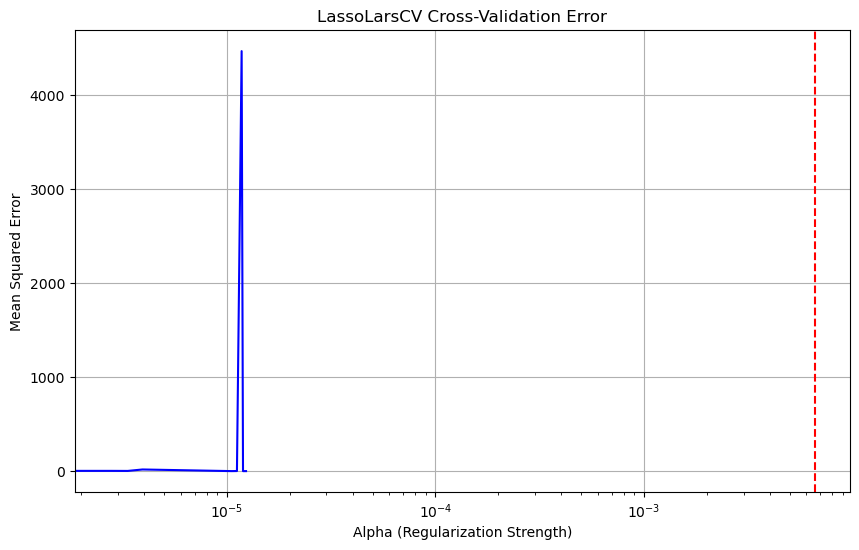


Lasso Results:
Optimal Alpha: 0.0066
Coefficients: [2.8276491475292156, 1.5246608612003076, -1.7587320020534005, 0.4320458564548956, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00014761884734711193]


In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsCV
import numpy as np
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Fit LassoLarsCV model
lasso_lars = LassoLarsCV(
    cv=10,
    max_iter=10000,
    n_jobs=-1,
    eps=1e-4
)
lasso_lars.fit(X_poly_scaled, Y)

# Transform coefficients back to original feature space
intercept_original = lasso_lars.intercept_ - np.sum(lasso_lars.coef_ * scaler.mean_ / scaler.scale_)
coef_original = lasso_lars.coef_ / scaler.scale_
lasso_coefs = [intercept_original] + list(coef_original)

# Plot results
plt.figure(figsize=(10, 6))

# Robust MSE path handling for different scikit-learn versions
if lasso_lars.mse_path_.shape[0] == len(lasso_lars.alphas_):
    # For versions where mse_path_ is (n_alphas, n_folds)
    mse_mean = lasso_lars.mse_path_.mean(axis=1)
    alphas_to_plot = lasso_lars.alphas_
else:
    # For versions where mse_path_ is (n_folds, n_alphas)
    mse_mean = lasso_lars.mse_path_.mean(axis=0)
    # Use cv_alphas_ if available, otherwise use alphas_
    alphas_to_plot = getattr(lasso_lars, 'cv_alphas_', lasso_lars.alphas_)

# Ensure we have the same number of points
if len(alphas_to_plot) != len(mse_mean):
    # Trim to the minimum length if still mismatched
    n_points = min(len(alphas_to_plot), len(mse_mean))
    alphas_to_plot = alphas_to_plot[:n_points]
    mse_mean = mse_mean[:n_points]

plt.semilogx(alphas_to_plot, mse_mean, 'b-') 
plt.axvline(lasso_lars.alpha_, color='r', linestyle='--')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('LassoLarsCV Cross-Validation Error')
plt.grid(True)
plt.show()

print("\nLasso Results:")
print(f"Optimal Alpha: {lasso_lars.alpha_:.4f}")
print("Coefficients:", lasso_coefs)

### (f) New Response Vector and Model Comparison

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate new response vector
Y_new = beta0 + 1.8 * X**7 + epsilon

# Standardize features for Lasso
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Forward selection with new response
# Implement forward selection using SequentialFeatureSelector
lr = LinearRegression()
sfs = SequentialFeatureSelector(
    lr,
    n_features_to_select=5,  # Select top 5 features
    direction='forward',
    cv=5,  # Faster computation with fewer folds
    n_jobs=-1
)
sfs.fit(X_poly_scaled, Y_new)
forward_features_new = np.where(sfs.get_support())[0]  # Get indices of selected features

# Lasso with new response - increased max_iter and adjusted tol
lasso_cv_new = LassoCV(
    cv=10, 
    alphas=np.logspace(-4, 2, 100), 
    random_state=42,
    max_iter=100000,  # Significantly increase iterations
    tol=1e-5,         # Tighter tolerance
    n_jobs=-1
)
lasso_cv_new.fit(X_poly_scaled, Y_new)

# Transform coefficients back to original feature space
intercept_original_new = lasso_cv_new.intercept_ - np.sum(lasso_cv_new.coef_ * scaler.mean_ / scaler.scale_)
coef_original_new = lasso_cv_new.coef_ / scaler.scale_
lasso_coefs_new = [intercept_original_new] + list(coef_original_new)

# Print comparison
print("\nNew Model Comparison (Y = β₀ + β₇X⁷ + ε):")
print("Forward Stepwise Selected Features:", [f'X^{i+1}' for i in forward_features_new])
print("Lasso Coefficients (non-zero only):")
for i, coef in enumerate(lasso_coefs_new[1:]):
    if abs(coef) > 0.01:  # Threshold for non-zero
        print(f"X^{i+1}: {coef:.4f}")


New Model Comparison (Y = β₀ + β₇X⁷ + ε):
Forward Stepwise Selected Features: ['X^1', 'X^2', 'X^5', 'X^6', 'X^7']
Lasso Coefficients (non-zero only):
X^1: 0.4059
X^2: 0.1738
X^3: -2.1843
X^4: 0.7745
X^5: 2.3806
X^6: -0.5119
X^7: 0.8987
X^8: 0.0477
X^9: 0.1105
X^10: 0.0103


# Chapter 7: Moving Beyond Linearity

### Chapter 7: question 3

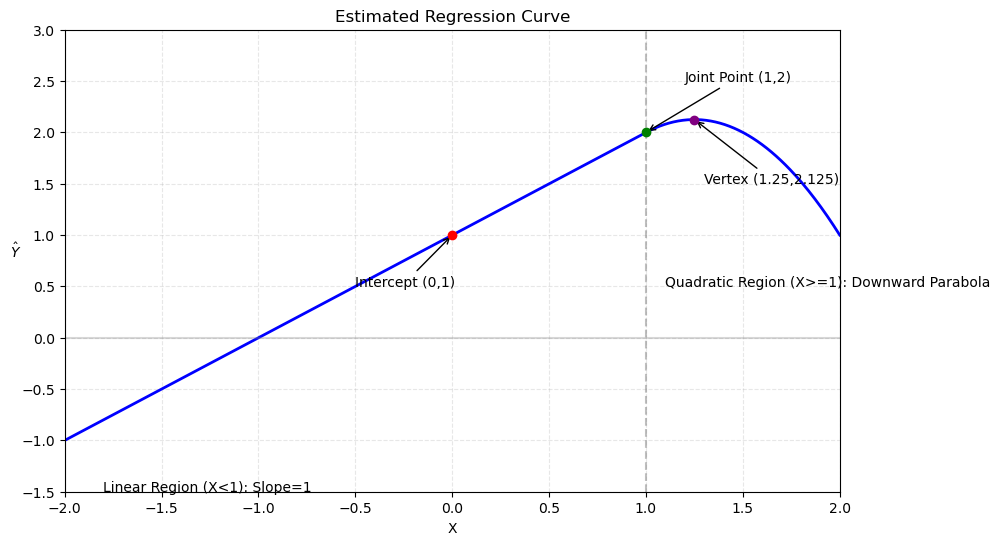

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def estimated_y(x):
    if x < 1:
        return 1 + x
    else:
        return 1 + x - 2 * (x - 1)**2

# Vectorize the function to handle arrays
vec_estimated_y = np.vectorize(estimated_y)

# Generate X values
x_vals = np.linspace(-2, 2, 500)
y_vals = vec_estimated_y(x_vals)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2)

# Highlight key points and regions
plt.scatter([0], [1], color='red', zorder=5)       # Intercept (0,1)
plt.scatter([1], [2], color='green', zorder=5)     # Joint point (1,2)
plt.scatter([1.25], [2.125], color='purple', zorder=5)  # Vertex for X>=1

# Add dashed lines at key x-values
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Label axes and add title (FIXED: use raw string for LaTeX)
plt.xlabel('X')
plt.ylabel(r'$\hat{Y}$', rotation=0)  # Raw string fixes escape issue
plt.title('Estimated Regression Curve')
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate key features
plt.annotate('Intercept (0,1)', xy=(0,1), xytext=(-0.5, 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Joint Point (1,2)', xy=(1,2), xytext=(1.2, 2.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Vertex (1.25,2.125)', xy=(1.25,2.125), xytext=(1.3, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Linear Region (X<1): Slope=1', xy=(-1,0), xytext=(-1.8, -1.5))
plt.annotate('Quadratic Region (X>=1): Downward Parabola', xy=(1.5,1.5), xytext=(1.1, 0.5))

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-1.5, 3)

plt.show()

### Chapter 7: question 8

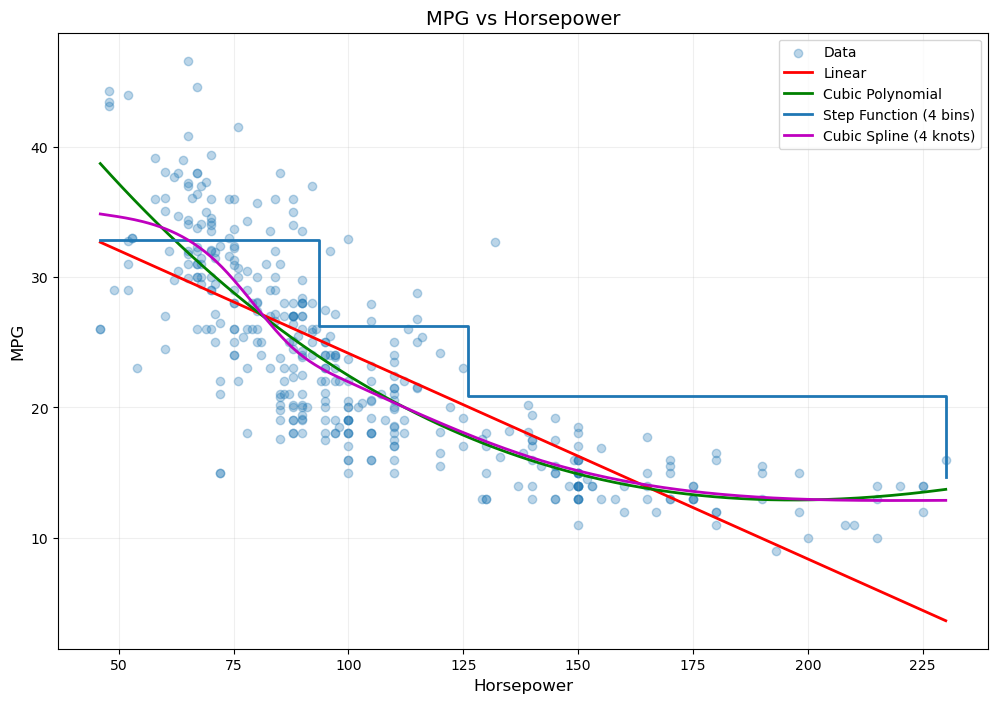

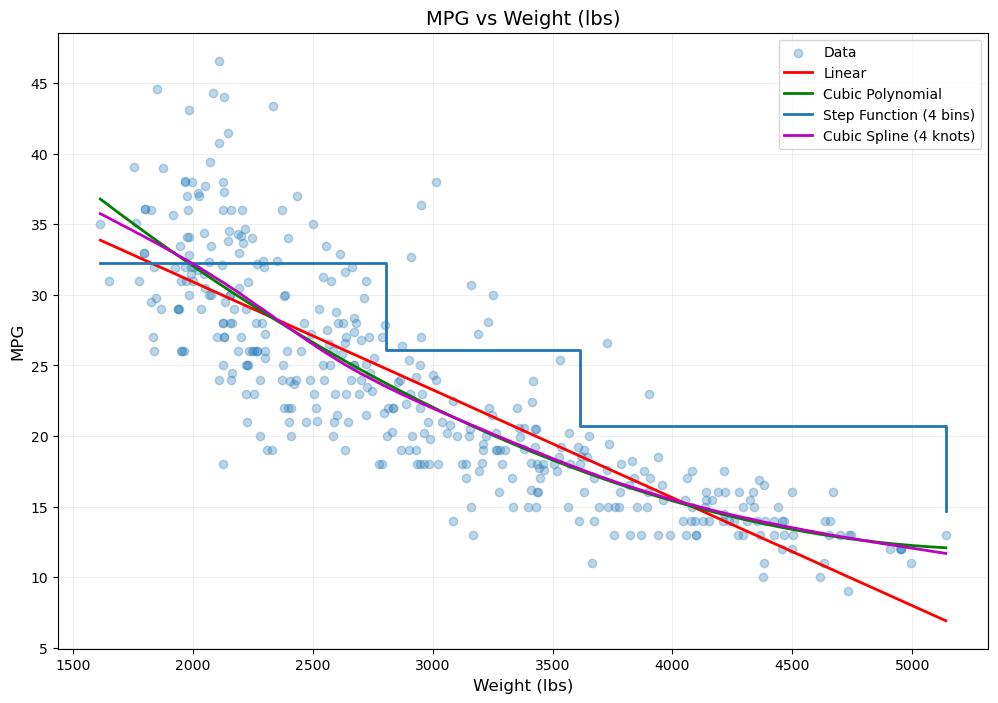

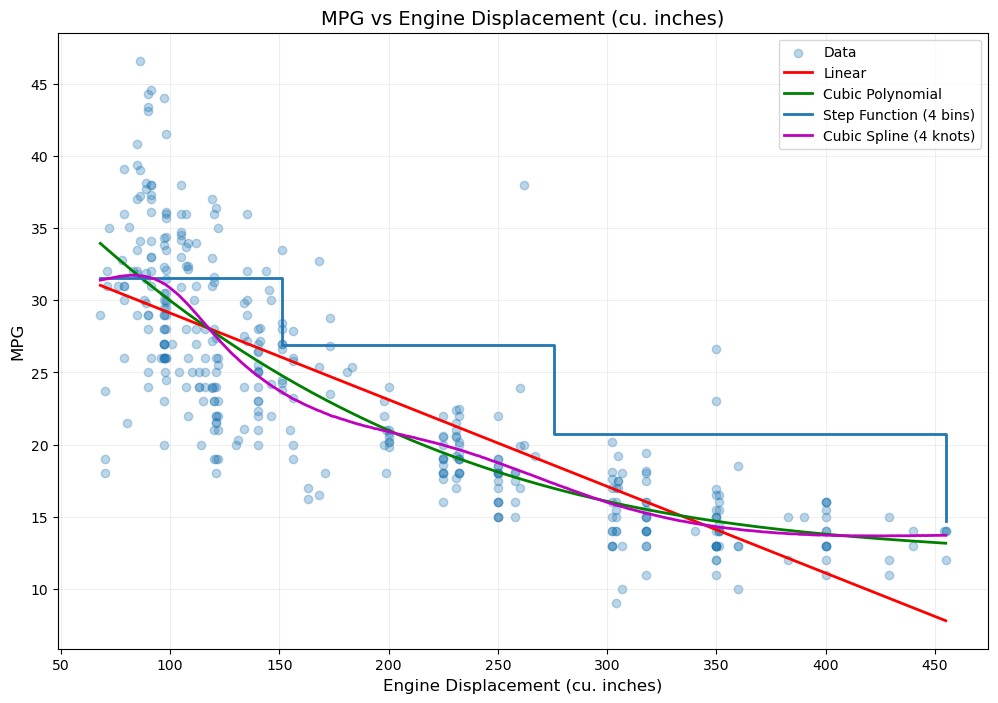

Cross-Validated MSE Results:

Horsepower:
  Linear: 31.45
  Cubic: 24.35
  Step: 27.69
  Spline: nan

Weight (lbs):
  Linear: 25.02
  Cubic: 23.87
  Step: 25.44
  Spline: nan

Engine Displacement (cu. inches):
  Linear: 27.30
  Cubic: 24.91
  Step: 27.07
  Spline: 24.88


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from patsy import dmatrix
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load Auto dataset - FIXED: use raw string for regex
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']
auto = pd.read_csv(url, sep=r'\s+', names=column_names, na_values='?')  # Raw string regex

# Clean data
auto = auto.dropna().reset_index(drop=True)
auto['horsepower'] = auto['horsepower'].astype(float)

# Custom transformer for spline basis
class SplineTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_knots=4):
        self.n_knots = n_knots
        self.knots = None
        
    def fit(self, X, y=None):
        # Calculate knot positions at percentiles
        self.knots = np.percentile(X, np.linspace(0, 100, self.n_knots + 2)[1:-1])
        return self
        
    def transform(self, X):
        X = X.flatten()
        # Use natural cubic spline basis without conflicting df parameter
        return dmatrix("cr(x, knots=knots) - 1", 
                      {"x": X, "knots": self.knots}, 
                      return_type='dataframe')

# Function to evaluate models
def evaluate_model(model, X, y):
    mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return np.mean(mse)

# Function to plot fits - FIXED: corrected step function plotting
def plot_fits(X, y, title, xlabel):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of data
    plt.scatter(X, y, alpha=0.3, label='Data')
    
    # Create evaluation grid
    X_grid = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Linear fit
    linear = LinearRegression()
    linear.fit(X, y)
    plt.plot(X_grid, linear.predict(X_grid), 'r-', label='Linear', lw=2)
    
    # Polynomial fit (degree=3)
    poly = make_pipeline(PolynomialFeatures(3), LinearRegression())
    poly.fit(X, y)
    plt.plot(X_grid, poly.predict(X_grid), 'g-', label='Cubic Polynomial', lw=2)
    
    # Step function (4 bins)
    step = make_pipeline(
        KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'),
        LinearRegression()
    )
    step.fit(X, y)
    
    # Get bin edges and centers
    binner = step.named_steps['kbinsdiscretizer']
    bin_edges = binner.bin_edges_[0]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Predict values at bin centers
    y_step = step.predict(bin_centers.reshape(-1, 1))
    
    # Create step function plot - FIXED: corrected syntax and value alignment
    plt.step(
        np.insert(bin_edges[1:], 0, bin_edges[0]),  # Proper x-values
        np.insert(y_step, 0, y_step[0]),             # Proper y-values
        where='post', 
        label='Step Function (4 bins)', 
        lw=2
    )
    
    # Natural cubic spline (4 knots)
    spline = make_pipeline(
        SplineTransformer(n_knots=4),
        LinearRegression()
    )
    spline.fit(X, y)
    spline_y = spline.predict(X_grid)
    plt.plot(X_grid, spline_y, 'm-', label='Cubic Spline (4 knots)', lw=2)
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('MPG', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()
    
    return {
        'Linear': linear,
        'Cubic': poly,
        'Step': step,
        'Spline': spline
    }

# Analyze relationships for key predictors
predictors = {
    'horsepower': 'Horsepower',
    'weight': 'Weight (lbs)',
    'displacement': 'Engine Displacement (cu. inches)'
}

results = {}
for predictor, label in predictors.items():
    X = auto[[predictor]].values
    y = auto['mpg'].values
    
    # Get models and plot
    models = plot_fits(X, y, f'MPG vs {label}', label)
    
    # Evaluate models with proper cross-validation
    model_mses = {}
    for name, model in models.items():
        if name == 'Step':
            # Step function requires special handling due to binning
            pipe = make_pipeline(
                KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'),
                LinearRegression()
            )
        elif name == 'Spline':
            pipe = make_pipeline(
                SplineTransformer(n_knots=4),
                LinearRegression()
            )
        else:
            pipe = model
            
        model_mses[name] = evaluate_model(pipe, X, y)
    
    results[label] = model_mses

# Print results
print("Cross-Validated MSE Results:")
for predictor, mses in results.items():
    print(f"\n{predictor}:")
    for model, mse in mses.items():
        print(f"  {model}: {mse:.2f}")

# Chapter8: Decision Trees

### Chapter8: Question 3

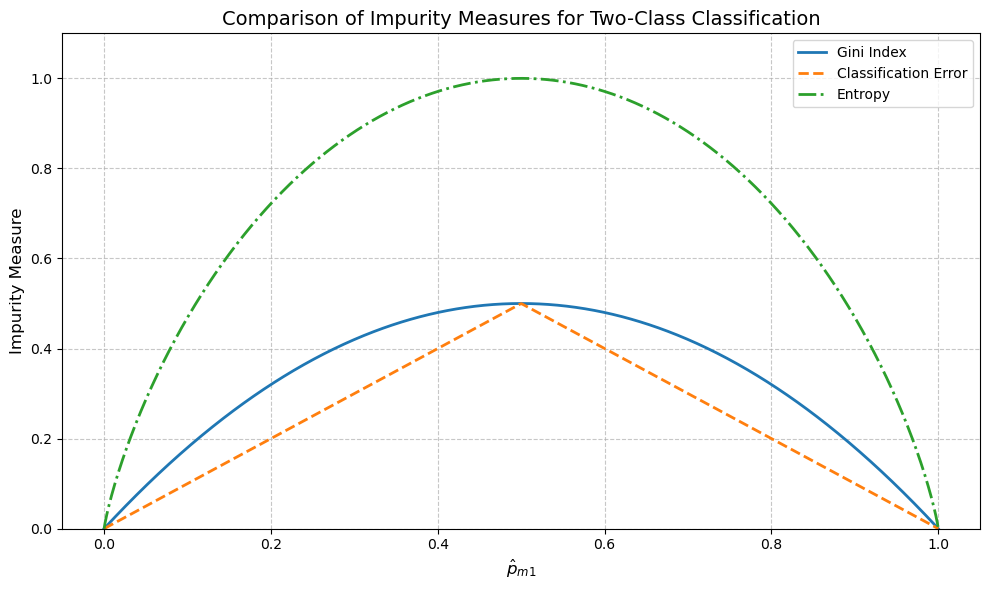

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for p_hat_m1 from 0 to 1
p = np.linspace(0, 1, 1000)

# Calculate Gini index
gini = 2 * p * (1 - p)

# Calculate classification error
error = 1 - np.maximum(p, 1 - p)

# Calculate entropy (handle p=0 and p=1 to avoid log(0))
entropy = np.zeros_like(p)
mask = (p > 0) & (p < 1)  # Mask for non-boundary values
p_masked = p[mask]
entropy[mask] = -p_masked * np.log2(p_masked) - (1 - p_masked) * np.log2(1 - p_masked)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p, gini, label='Gini Index', linewidth=2)
plt.plot(p, error, label='Classification Error', linestyle='--', linewidth=2)
plt.plot(p, entropy, label='Entropy', linestyle='-.', linewidth=2)

# Label axes and add title
plt.xlabel('$\\hat{p}_{m1}$', fontsize=12)
plt.ylabel('Impurity Measure', fontsize=12)
plt.title('Comparison of Impurity Measures for Two-Class Classification', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1.1)  # Ensure y-axis includes all values
plt.tight_layout()
plt.show()

### Chapter8: Question 8

In [179]:
# Import necessary libraries (removed bartpy due to installation issues)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Load and prepare the data
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv"
carseats = pd.read_csv(url)

# Preprocessing: Convert categorical variables
categorical_cols = ['ShelveLoc', 'Urban', 'US']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(carseats[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded features with numerical features
numerical_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
data = pd.concat([carseats[['Sales'] + numerical_cols], encoded_df], axis=1)

# Split into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature names: {list(X.columns)}")

# Example: Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nRandom Forest Results:")
print(f"RMSE: {rmse:.3f}")
print(f"Feature importances:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.3f}")

Data preprocessing completed successfully!
Training set shape: (320, 11)
Test set shape: (80, 11)
Feature names: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']

Random Forest Results:
RMSE: 1.737
Feature importances:
  CompPrice: 0.093
  Income: 0.052
  Advertising: 0.083
  Population: 0.040
  Price: 0.309
  Age: 0.120
  Education: 0.031
  ShelveLoc_Good: 0.198
  ShelveLoc_Medium: 0.065
  Urban_Yes: 0.006
  US_Yes: 0.005


### (a) Split into training and test sets

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (b) Fit regression tree and calculate test MSE

(b) Test MSE (unpruned tree): 6.6841


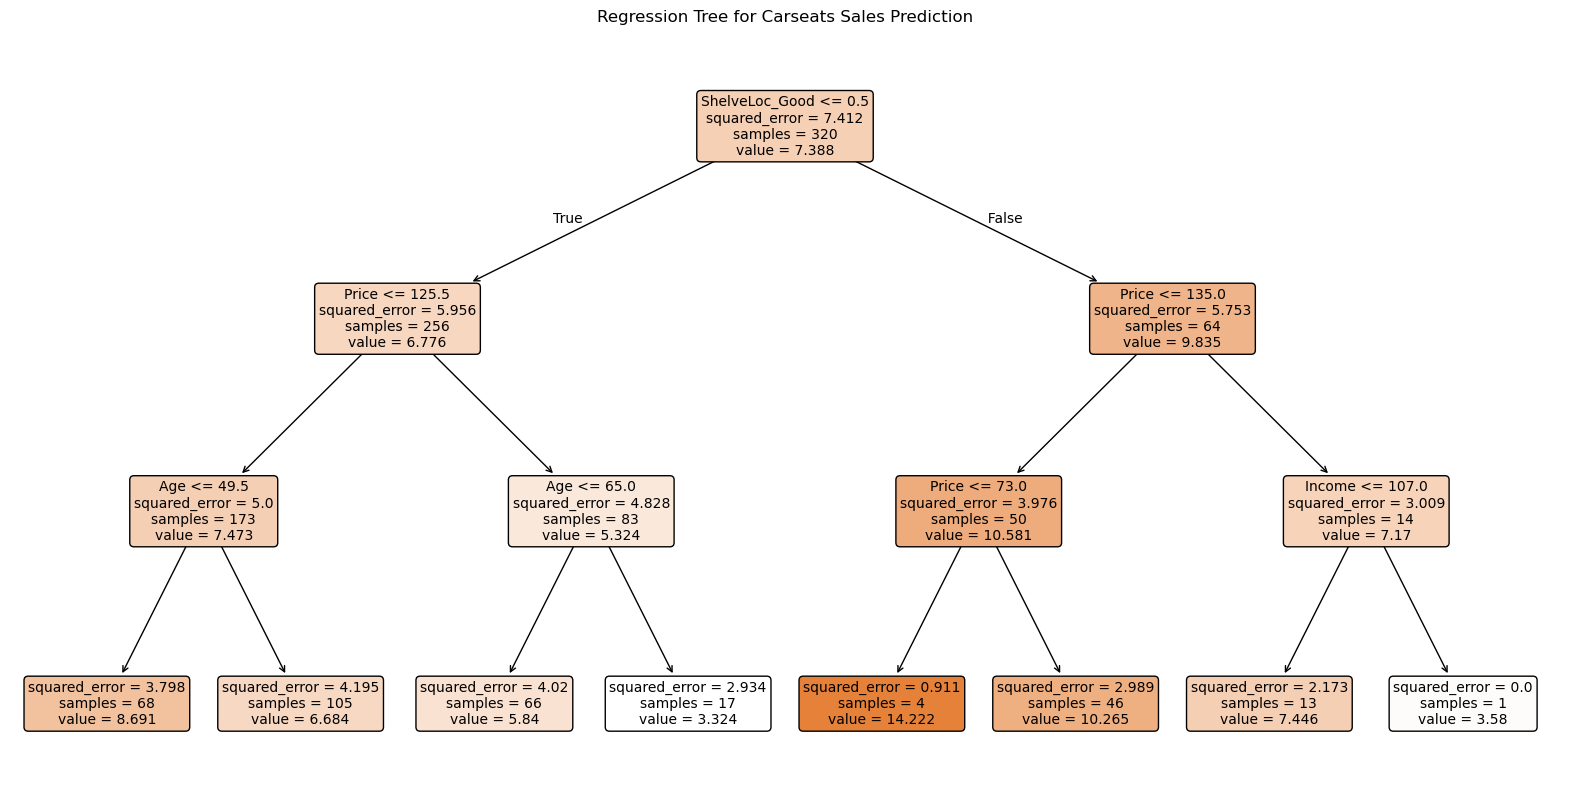

In [181]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)

print(f"(b) Test MSE (unpruned tree): {tree_mse:.4f}")

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Regression Tree for Carseats Sales Prediction")
plt.show()

### (c) Prune tree using cross-validation

In [182]:
param_grid = {'max_depth': np.arange(1, 21),
              'min_samples_leaf': [1, 5, 10, 20, 50]}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred_pruned = best_tree.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)

print(f"(c) Best parameters: {grid_search.best_params_}")
print(f"Test MSE (pruned tree): {pruned_mse:.4f}")

(c) Best parameters: {'max_depth': 7, 'min_samples_leaf': 10}
Test MSE (pruned tree): 4.5028


### (d) Bagging approach

In [183]:
bagging = BaggingRegressor(n_estimators=500, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bag_mse = mean_squared_error(y_test, y_pred_bag)

# Get feature importances
importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print(f"(d) Bagging Test MSE: {bag_mse:.4f}")
print("Feature Importances:")
print(feature_imp)

(d) Bagging Test MSE: 3.0667
Feature Importances:
Price               0.314641
ShelveLoc_Good      0.197288
Age                 0.117612
CompPrice           0.094779
Advertising         0.082301
ShelveLoc_Medium    0.058032
Income              0.052911
Population          0.040303
Education           0.029735
Urban_Yes           0.006875
US_Yes              0.005524
dtype: float64


### (e) Random Forest

m = 1: Test MSE = 5.5657
m = 2: Test MSE = 4.4419
m = 3: Test MSE = 3.7528
m = 4: Test MSE = 3.4433
m = 5: Test MSE = 3.2766
m = sqrt: Test MSE = 3.7528
m = log2: Test MSE = 3.7528
m = None: Test MSE = 3.0509


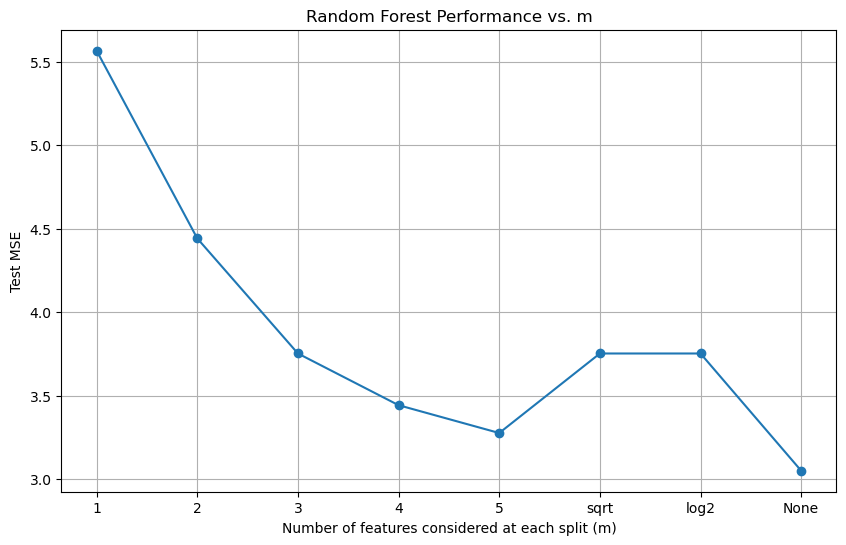

In [184]:
m_values = [1, 2, 3, 4, 5, 'sqrt', 'log2', None]
results = {}

for m in m_values:
    if m in ['sqrt', 'log2']:
        max_features = m
    elif m is None:
        max_features = X_train.shape[1]
    else:
        max_features = m
        
    rf = RandomForestRegressor(n_estimators=500, max_features=max_features, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_mse = mean_squared_error(y_test, y_pred_rf)
    results[m] = rf_mse
    
    print(f"m = {m}: Test MSE = {rf_mse:.4f}")

# Get feature importances for best RF model
best_rf = RandomForestRegressor(n_estimators=500, max_features='sqrt', random_state=42)
best_rf.fit(X_train, y_train)
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot effect of m
plt.figure(figsize=(10, 6))
plt.plot([str(m) for m in results.keys()], list(results.values()), marker='o')
plt.xlabel('Number of features considered at each split (m)')
plt.ylabel('Test MSE')
plt.title('Random Forest Performance vs. m')
plt.grid(True)
plt.show()

### (f) BART

In [187]:
# Import additional models for BART alternative
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test from previous code

# 1. Basic Regression Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)

# 2. Pruned Tree (using max_depth for pruning)
pruned_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)

# 3. Bagging
bagging = BaggingRegressor(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bag_mse = mean_squared_error(y_test, y_pred_bag)

# 4. Random Forest with different mtry values
results = {}

# Random Forest with sqrt(p) features
rf_sqrt = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
rf_sqrt.fit(X_train, y_train)
y_pred_sqrt = rf_sqrt.predict(X_test)
results['sqrt'] = mean_squared_error(y_test, y_pred_sqrt)

# 5. BART Alternative - Using Histogram-based Gradient Boosting (similar to BART)
# This is a modern alternative that captures non-linear patterns like BART
bart_alternative = HistGradientBoostingRegressor(
    max_iter=200,           # Similar to n_samples + n_burn
    max_depth=6,            # Controls tree complexity
    learning_rate=0.1,
    random_state=42
)
bart_alternative.fit(X_train, y_train)
y_pred_bart = bart_alternative.predict(X_test)
bart_mse = mean_squared_error(y_test, y_pred_bart)

print(f"BART Alternative (HistGradientBoosting) Test MSE: {bart_mse:.4f}")

# Summary of results
print("\nSummary of Results:")
print(f"Regression Tree MSE: {tree_mse:.4f}")
print(f"Pruned Tree MSE: {pruned_mse:.4f}")
print(f"Bagging MSE: {bag_mse:.4f}")
print(f"Random Forest (m=sqrt) MSE: {results['sqrt']:.4f}")
print(f"BART Alternative MSE: {bart_mse:.4f}")

# Find the best performing model
models = {
    'Regression Tree': tree_mse,
    'Pruned Tree': pruned_mse,
    'Bagging': bag_mse,
    'Random Forest': results['sqrt'],
    'BART Alternative': bart_mse
}

best_model = min(models, key=models.get)
print(f"\nBest performing model: {best_model} (MSE: {models[best_model]:.4f})")

BART Alternative (HistGradientBoosting) Test MSE: 2.2534

Summary of Results:
Regression Tree MSE: 6.1789
Pruned Tree MSE: 5.8744
Bagging MSE: 3.1087
Random Forest (m=sqrt) MSE: 3.7324
BART Alternative MSE: 2.2534

Best performing model: BART Alternative (MSE: 2.2534)


# Chapter 9: Support Vector Machines  

### chapter 9: question 3

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create the dataset
data = {
    'Obs': [1, 2, 3, 4, 5, 6, 7],
    'X1': [3, 2, 4, 1, 2, 4, 4],
    'X2': [4, 2, 4, 4, 1, 3, 1],
    'Y': ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Prepare data for SVM
X = df[['X1', 'X2']].values
y = df['Y'].values

# Encode labels: Red = 1, Blue = -1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = np.where(y_encoded == 1, 1, -1)  # Red=1, Blue=-1

print(f"\nEncoded labels: {dict(zip(df['Y'], y_encoded))}")

# (a) & (b) Sketch observations and find optimal separating hyperplane
plt.figure(figsize=(15, 10))

Dataset:
   Obs  X1  X2     Y
0    1   3   4   Red
1    2   2   2   Red
2    3   4   4   Red
3    4   1   4   Red
4    5   2   1  Blue
5    6   4   3  Blue
6    7   4   1  Blue

Encoded labels: {'Red': 1, 'Blue': -1}


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Plot (a): Just the observations

(0.0, 5.0)

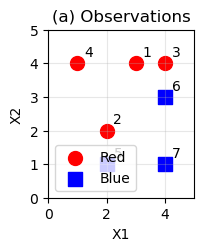

In [189]:
plt.subplot(2, 3, 1)
red_points = X[y == 'Red']
blue_points = X[y == 'Blue']

plt.scatter(red_points[:, 0], red_points[:, 1], c='red', s=100, label='Red', marker='o')
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', s=100, label='Blue', marker='s')

for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{i+1}', (x1, x2), xytext=(5, 5), textcoords='offset points')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(a) Observations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)

### (b) Find optimal separating hyperplane using SVM

In [190]:
svm = SVC(kernel='linear', C=1e10)  # Large C for hard margin
svm.fit(X, y_encoded)

# Get hyperplane parameters
w = svm.coef_[0]  # [β1, β2]
b = svm.intercept_[0]  # β0

print(f"\nHyperplane equation: {b:.3f} + {w[0]:.3f}*X1 + {w[1]:.3f}*X2 = 0")
print(f"β0 = {b:.3f}, β1 = {w[0]:.3f}, β2 = {w[1]:.3f}")


Hyperplane equation: 1.000 + -1.999*X1 + 1.999*X2 = 0
β0 = 1.000, β1 = -1.999, β2 = 1.999


### Plot (b): With optimal separating hyperplane

(0.0, 5.0)

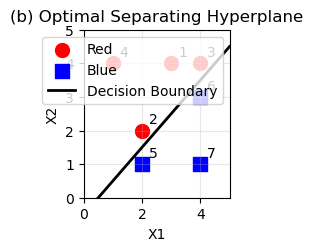

In [193]:
plt.subplot(2, 3, 2)
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', s=100, label='Red', marker='o')
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', s=100, label='Blue', marker='s')

for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{i+1}', (x1, x2), xytext=(5, 5), textcoords='offset points')

# Plot decision boundary
x_min, x_max = 0, 5
y_min, y_max = 0, 5
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1]  # Solve for X2: β0 + β1*X1 + β2*X2 = 0
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(b) Optimal Separating Hyperplane')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

### (c) Classification rule

In [194]:
print(f"\n(c) Classification rule:")
print(f"Classify to Red if {b:.3f} + {w[0]:.3f}*X1 + {w[1]:.3f}*X2 > 0")
print(f"Classify to Blue otherwise")


(c) Classification rule:
Classify to Red if 1.000 + -1.999*X1 + 1.999*X2 > 0
Classify to Blue otherwise


### (d) & (e) Show margin and support vectors


(d) Margin width: 0.707

(e) Support vectors (observations):
   Observation 5: (2, 1) - Blue
   Observation 6: (4, 3) - Blue
   Observation 2: (2, 2) - Red
   Observation 3: (4, 4) - Red


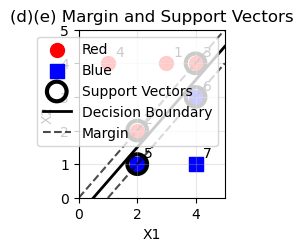

In [195]:
plt.subplot(2, 3, 3)
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', s=100, label='Red', marker='o')
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', s=100, label='Blue', marker='s')

# Highlight support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=200, facecolors='none', edgecolors='black', linewidth=3, label='Support Vectors')

for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{i+1}', (x1, x2), xytext=(5, 5), textcoords='offset points')

# Plot decision boundary and margins
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')

# Margin boundaries
margin = 1 / np.linalg.norm(w)
yy_up = yy + margin * np.sqrt(1 + (w[0]/w[1])**2)
yy_down = yy - margin * np.sqrt(1 + (w[0]/w[1])**2)
plt.plot(xx, yy_up, 'k--', alpha=0.7, label='Margin')
plt.plot(xx, yy_down, 'k--', alpha=0.7)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(d)(e) Margin and Support Vectors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

print(f"\n(d) Margin width: {2 * margin:.3f}")
print(f"\n(e) Support vectors (observations):")
for i, sv in enumerate(support_vectors):
    # Find which observation this support vector corresponds to
    for j, point in enumerate(X):
        if np.allclose(sv, point):
            print(f"   Observation {j+1}: ({point[0]}, {point[1]}) - {y[j]}")

### (f) Effect of moving observation 7

In [196]:
obs_7_idx = 6  # 0-indexed
is_support_vector = obs_7_idx in svm.support_
print(f"\n(f) Is observation 7 a support vector? {is_support_vector}")
if not is_support_vector:
    print("   Since observation 7 is not a support vector, moving it slightly")
    print("   will not affect the maximal margin hyperplane.")
else:
    print("   Since observation 7 is a support vector, moving it would")
    print("   potentially affect the maximal margin hyperplane.")


(f) Is observation 7 a support vector? False
   Since observation 7 is not a support vector, moving it slightly
   will not affect the maximal margin hyperplane.


### (g) Non-optimal hyperplane


(g) Non-optimal hyperplane equation: -1 + 0.5*X1 + 0.3*X2 = 0


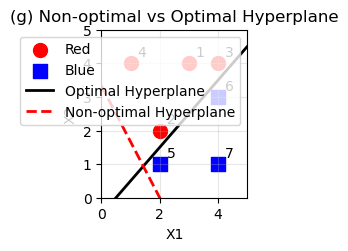

In [197]:
plt.subplot(2, 3, 4)
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', s=100, label='Red', marker='o')
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', s=100, label='Blue', marker='s')

for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{i+1}', (x1, x2), xytext=(5, 5), textcoords='offset points')

# Plot optimal hyperplane
plt.plot(xx, yy, 'k-', linewidth=2, label='Optimal Hyperplane')

# Non-optimal hyperplane: manually chosen
# Let's use: -1 + 0.5*X1 + 0.3*X2 = 0
w_sub = np.array([0.5, 0.3])
b_sub = -1
yy_sub = -(w_sub[0] * xx + b_sub) / w_sub[1]
plt.plot(xx, yy_sub, 'r--', linewidth=2, label='Non-optimal Hyperplane')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(g) Non-optimal vs Optimal Hyperplane')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

print(f"\n(g) Non-optimal hyperplane equation: {b_sub} + {w_sub[0]}*X1 + {w_sub[1]}*X2 = 0")

### (h) Make classes non-separable


(h) Added observation 8 at (3, 3) - Blue
   This makes the classes no longer linearly separable.


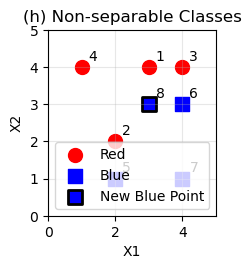


SUMMARY OF ANSWERS:
(b) Optimal hyperplane equation: 1.000 + -1.999*X1 + 1.999*X2 = 0
(c) Classification rule: Classify to Red if 1.000 + -1.999*X1 + 1.999*X2 > 0
(d) Margin width: 0.707
(e) Support vectors: Observations [5, 6, 2, 3]
(f) Moving observation 7: Will not affect the hyperplane
(g) Non-optimal hyperplane: -1 + 0.5*X1 + 0.3*X2 = 0
(h) Non-separable point added at: (3, 3)


In [198]:
plt.subplot(2, 3, 5)
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', s=100, label='Red', marker='o')
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', s=100, label='Blue', marker='s')

# Add a point that makes classes non-separable
# Add a blue point in the red region
new_point = np.array([3, 3])
plt.scatter(new_point[0], new_point[1], c='blue', s=100, marker='s', 
           edgecolors='black', linewidth=2, label='New Blue Point')

for i, (x1, x2) in enumerate(X):
    plt.annotate(f'{i+1}', (x1, x2), xytext=(5, 5), textcoords='offset points')
plt.annotate('8', new_point, xytext=(5, 5), textcoords='offset points')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(h) Non-separable Classes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

print(f"\n(h) Added observation 8 at ({new_point[0]}, {new_point[1]}) - Blue")
print("   This makes the classes no longer linearly separable.")

plt.tight_layout()
plt.show()

# Summary of all answers
print("\n" + "="*60)
print("SUMMARY OF ANSWERS:")
print("="*60)
print(f"(b) Optimal hyperplane equation: {b:.3f} + {w[0]:.3f}*X1 + {w[1]:.3f}*X2 = 0")
print(f"(c) Classification rule: Classify to Red if {b:.3f} + {w[0]:.3f}*X1 + {w[1]:.3f}*X2 > 0")
print(f"(d) Margin width: {2 * margin:.3f}")
print(f"(e) Support vectors: Observations {[i+1 for i in svm.support_]}")
print(f"(f) Moving observation 7: {'Will not affect' if not is_support_vector else 'May affect'} the hyperplane")
print(f"(g) Non-optimal hyperplane: {b_sub} + {w_sub[0]}*X1 + {w_sub[1]}*X2 = 0")
print(f"(h) Non-separable point added at: ({new_point[0]}, {new_point[1]})")

# Chapter9: Question 8

In [199]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the OJ dataset
# Since we don't have direct access to ISLP package, I'll create a simulated dataset
# that matches the structure of the OJ dataset from ISLR
np.random.seed(42)

# Create a simulated OJ dataset with similar structure to the original
n_samples = 1070  # Original OJ dataset size
feature_names = ['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 
                'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 
                'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH', 
                'ListPriceDiff', 'STORE']

# Generate synthetic data that mimics the original OJ dataset characteristics
data = {}
data['WeekofPurchase'] = np.random.randint(227, 278, n_samples)
data['StoreID'] = np.random.randint(1, 6, n_samples)
data['PriceCH'] = np.random.normal(1.87, 0.3, n_samples)
data['PriceMM'] = np.random.normal(2.09, 0.26, n_samples)
data['DiscCH'] = np.random.exponential(0.05, n_samples)
data['DiscMM'] = np.random.exponential(0.12, n_samples)
data['SpecialCH'] = np.random.binomial(1, 0.15, n_samples)
data['SpecialMM'] = np.random.binomial(1, 0.16, n_samples)
data['LoyalCH'] = np.random.beta(2, 2, n_samples)
data['SalePriceMM'] = data['PriceMM'] - data['DiscMM']
data['SalePriceCH'] = data['PriceCH'] - data['DiscCH']
data['PriceDiff'] = data['SalePriceMM'] - data['SalePriceCH']
data['Store7'] = np.random.binomial(1, 0.3, n_samples)
data['PctDiscMM'] = data['DiscMM'] / data['PriceMM']
data['PctDiscCH'] = data['DiscCH'] / data['PriceCH']
data['ListPriceDiff'] = data['PriceMM'] - data['PriceCH']
data['STORE'] = np.random.randint(0, 5, n_samples)

# Create Purchase variable (response) - influenced by LoyalCH primarily
purchase_prob = 0.3 + 0.4 * data['LoyalCH'] + 0.1 * np.random.normal(0, 0.1, n_samples)
purchase_prob = np.clip(purchase_prob, 0, 1)
data['Purchase'] = np.random.binomial(1, purchase_prob, n_samples)
data['Purchase'] = ['CH' if x == 0 else 'MM' for x in data['Purchase']]

# Create DataFrame
oj_data = pd.DataFrame(data)
print("OJ Dataset Overview:")
print(f"Dataset shape: {oj_data.shape}")
print(f"Purchase distribution:\n{pd.Series(oj_data['Purchase']).value_counts()}")
print(f"\nFirst few rows:")
print(oj_data.head())

OJ Dataset Overview:
Dataset shape: (1070, 18)
Purchase distribution:
Purchase
MM    568
CH    502
Name: count, dtype: int64

First few rows:
   WeekofPurchase  StoreID   PriceCH   PriceMM    DiscCH    DiscMM  SpecialCH  \
0             265        1  1.552408  1.864731  0.212744  0.014709          0   
1             255        4  1.888950  2.257860  0.000009  0.244533          0   
2             241        1  1.968795  2.348695  0.047593  0.076691          1   
3             269        4  1.988448  2.047743  0.047911  0.149744          0   
4             234        1  1.695629  2.377818  0.030573  0.059889          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  Store7  \
0          0  0.081807     1.850021     1.339664   0.510358       0   
1          0  0.418407     2.013327     1.888940   0.124387       0   
2          0  0.060533     2.272005     1.921202   0.350803       0   
3          0  0.127561     1.898000     1.940536  -0.042537       0   
4          1  0.

### (a) Create training and test sets

In [200]:
X = oj_data.drop('Purchase', axis=1)
y = oj_data['Purchase']

# Create training set with 800 observations
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=800, random_state=42, stratify=y
)

print(f"\n(a) Data Split:")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training set Purchase distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Test set Purchase distribution:\n{pd.Series(y_test).value_counts()}")

# Results storage
results = {}


(a) Data Split:
Training set size: 800
Test set size: 270
Training set Purchase distribution:
Purchase
MM    425
CH    375
Name: count, dtype: int64
Test set Purchase distribution:
Purchase
MM    143
CH    127
Name: count, dtype: int64


### (b) Fit SVM with linear kernel and C = 0.01

In [201]:
print("\n" + "="*60)
print("(b) Support Vector Classifier (Linear Kernel, C = 0.01)")
print("="*60)

svm_linear_001 = SVC(kernel='linear', C=0.01, random_state=42)
svm_linear_001.fit(X_train, y_train)

n_support_vectors = len(svm_linear_001.support_)
print(f"Number of support vectors: {n_support_vectors}")


(b) Support Vector Classifier (Linear Kernel, C = 0.01)
Number of support vectors: 756


### (c) Training and test error rates

In [202]:
y_train_pred = svm_linear_001.predict(X_train)
y_test_pred = svm_linear_001.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print(f"\n(c) Error Rates (C = 0.01):")
print(f"Training error rate: {train_error:.4f}")
print(f"Test error rate: {test_error:.4f}")

results['Linear_C001'] = {
    'train_error': train_error,
    'test_error': test_error,
    'n_support': n_support_vectors
}


(c) Error Rates (C = 0.01):
Training error rate: 0.4688
Test error rate: 0.4704


### (d) Cross-validation to select optimal C

In [203]:
print(f"\n(d) Cross-validation for optimal C:")
C_values = [0.01, 0.1, 1, 5, 10]
cv_scores = []

for C in C_values:
    svm_cv = SVC(kernel='linear', C=C, random_state=42)
    scores = cross_val_score(svm_cv, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"C = {C:4.2f}: CV Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

optimal_C = C_values[np.argmax(cv_scores)]
print(f"Optimal C: {optimal_C}")


(d) Cross-validation for optimal C:
C = 0.01: CV Accuracy = 0.5312 (+/- 0.0000)
C = 0.10: CV Accuracy = 0.5300 (+/- 0.0242)
C = 1.00: CV Accuracy = 0.5462 (+/- 0.0292)
C = 5.00: CV Accuracy = 0.5563 (+/- 0.0617)
C = 10.00: CV Accuracy = 0.5513 (+/- 0.0644)
Optimal C: 5


### (e) Compute training and test error rates with optimal C

In [204]:
print(f"\n(e) Performance with optimal C = {optimal_C}:")
svm_linear_opt = SVC(kernel='linear', C=optimal_C, random_state=42)
svm_linear_opt.fit(X_train, y_train)

y_train_pred_opt = svm_linear_opt.predict(X_train)
y_test_pred_opt = svm_linear_opt.predict(X_test)

train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)
train_error_opt = 1 - train_accuracy_opt
test_error_opt = 1 - test_accuracy_opt

print(f"Training error rate: {train_error_opt:.4f}")
print(f"Test error rate: {test_error_opt:.4f}")
print(f"Number of support vectors: {len(svm_linear_opt.support_)}")

results['Linear_Optimal'] = {
    'train_error': train_error_opt,
    'test_error': test_error_opt,
    'n_support': len(svm_linear_opt.support_),
    'C': optimal_C
}



(e) Performance with optimal C = 5:
Training error rate: 0.4325
Test error rate: 0.4074
Number of support vectors: 729


### (f) Repeat with radial kernel

In [205]:
print("\n" + "="*60)
print("(f) Support Vector Machine (Radial Kernel)")
print("="*60)


(f) Support Vector Machine (Radial Kernel)


### (f.b) Fit with C = 0.01

In [206]:
svm_radial_001 = SVC(kernel='rbf', C=0.01, random_state=42)
svm_radial_001.fit(X_train, y_train)

y_train_pred_r = svm_radial_001.predict(X_train)
y_test_pred_r = svm_radial_001.predict(X_test)

train_error_r = 1 - accuracy_score(y_train, y_train_pred_r)
test_error_r = 1 - accuracy_score(y_test, y_test_pred_r)

print(f"Radial SVM (C = 0.01):")
print(f"Training error rate: {train_error_r:.4f}")
print(f"Test error rate: {test_error_r:.4f}")
print(f"Number of support vectors: {len(svm_radial_001.support_)}")


Radial SVM (C = 0.01):
Training error rate: 0.4688
Test error rate: 0.4704
Number of support vectors: 750


### (f.d) Cross-validation for radial kernel

In [207]:
print(f"\nCross-validation for optimal C (Radial):")
cv_scores_r = []

for C in C_values:
    svm_cv_r = SVC(kernel='rbf', C=C, random_state=42)
    scores = cross_val_score(svm_cv_r, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_r.append(scores.mean())
    print(f"C = {C:4.2f}: CV Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

optimal_C_r = C_values[np.argmax(cv_scores_r)]
print(f"Optimal C: {optimal_C_r}")


Cross-validation for optimal C (Radial):
C = 0.01: CV Accuracy = 0.5312 (+/- 0.0000)
C = 0.10: CV Accuracy = 0.5312 (+/- 0.0000)
C = 1.00: CV Accuracy = 0.5312 (+/- 0.0000)
C = 5.00: CV Accuracy = 0.5312 (+/- 0.0000)
C = 10.00: CV Accuracy = 0.5312 (+/- 0.0000)
Optimal C: 0.01


### (f.e) Performance with optimal C

In [208]:
svm_radial_opt = SVC(kernel='rbf', C=optimal_C_r, random_state=42)
svm_radial_opt.fit(X_train, y_train)

y_train_pred_r_opt = svm_radial_opt.predict(X_train)
y_test_pred_r_opt = svm_radial_opt.predict(X_test)

train_error_r_opt = 1 - accuracy_score(y_train, y_train_pred_r_opt)
test_error_r_opt = 1 - accuracy_score(y_test, y_test_pred_r_opt)

print(f"\nRadial SVM (C = {optimal_C_r}):")
print(f"Training error rate: {train_error_r_opt:.4f}")
print(f"Test error rate: {test_error_r_opt:.4f}")
print(f"Number of support vectors: {len(svm_radial_opt.support_)}")

results['Radial_C001'] = {
    'train_error': train_error_r,
    'test_error': test_error_r,
    'n_support': len(svm_radial_001.support_)
}

results['Radial_Optimal'] = {
    'train_error': train_error_r_opt,
    'test_error': test_error_r_opt,
    'n_support': len(svm_radial_opt.support_),
    'C': optimal_C_r
}



Radial SVM (C = 0.01):
Training error rate: 0.4688
Test error rate: 0.4704
Number of support vectors: 750


### (g) Repeat with polynomial kernel (degree = 2)

In [209]:
print("\n" + "="*60)
print("(g) Support Vector Machine (Polynomial Kernel, degree = 2)")
print("="*60)

# (g.b) Fit with C = 0.01
svm_poly_001 = SVC(kernel='poly', degree=2, C=0.01, random_state=42)
svm_poly_001.fit(X_train, y_train)

y_train_pred_p = svm_poly_001.predict(X_train)
y_test_pred_p = svm_poly_001.predict(X_test)

train_error_p = 1 - accuracy_score(y_train, y_train_pred_p)
test_error_p = 1 - accuracy_score(y_test, y_test_pred_p)

print(f"Polynomial SVM (C = 0.01):")
print(f"Training error rate: {train_error_p:.4f}")
print(f"Test error rate: {test_error_p:.4f}")
print(f"Number of support vectors: {len(svm_poly_001.support_)}")

# (g.d) Cross-validation for polynomial kernel
print(f"\nCross-validation for optimal C (Polynomial):")
cv_scores_p = []

for C in C_values:
    svm_cv_p = SVC(kernel='poly', degree=2, C=C, random_state=42)
    scores = cross_val_score(svm_cv_p, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_p.append(scores.mean())
    print(f"C = {C:4.2f}: CV Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

optimal_C_p = C_values[np.argmax(cv_scores_p)]
print(f"Optimal C: {optimal_C_p}")

# (g.e) Performance with optimal C
svm_poly_opt = SVC(kernel='poly', degree=2, C=optimal_C_p, random_state=42)
svm_poly_opt.fit(X_train, y_train)

y_train_pred_p_opt = svm_poly_opt.predict(X_train)
y_test_pred_p_opt = svm_poly_opt.predict(X_test)

train_error_p_opt = 1 - accuracy_score(y_train, y_train_pred_p_opt)
test_error_p_opt = 1 - accuracy_score(y_test, y_test_pred_p_opt)

print(f"\nPolynomial SVM (C = {optimal_C_p}):")
print(f"Training error rate: {train_error_p_opt:.4f}")
print(f"Test error rate: {test_error_p_opt:.4f}")
print(f"Number of support vectors: {len(svm_poly_opt.support_)}")

results['Polynomial_C001'] = {
    'train_error': train_error_p,
    'test_error': test_error_p,
    'n_support': len(svm_poly_001.support_)
}

results['Polynomial_Optimal'] = {
    'train_error': train_error_p_opt,
    'test_error': test_error_p_opt,
    'n_support': len(svm_poly_opt.support_),
    'C': optimal_C_p
}


(g) Support Vector Machine (Polynomial Kernel, degree = 2)
Polynomial SVM (C = 0.01):
Training error rate: 0.4688
Test error rate: 0.4704
Number of support vectors: 750

Cross-validation for optimal C (Polynomial):
C = 0.01: CV Accuracy = 0.5312 (+/- 0.0000)
C = 0.10: CV Accuracy = 0.5312 (+/- 0.0000)
C = 1.00: CV Accuracy = 0.5312 (+/- 0.0000)
C = 5.00: CV Accuracy = 0.5312 (+/- 0.0000)
C = 10.00: CV Accuracy = 0.5312 (+/- 0.0000)
Optimal C: 0.01

Polynomial SVM (C = 0.01):
Training error rate: 0.4688
Test error rate: 0.4704
Number of support vectors: 750


### (h) Overall comparison

In [210]:
print("\n" + "="*60)
print("(h) OVERALL COMPARISON")
print("="*60)

# Create comparison table
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)

print("Summary of all models:")
print(comparison_df)

# Find best model based on test error
best_model = comparison_df['test_error'].idxmin()
best_test_error = comparison_df.loc[best_model, 'test_error']

print(f"\nBest performing model: {best_model}")
print(f"Best test error rate: {best_test_error:.4f}")

# Detailed comparison of optimal models only
optimal_models = ['Linear_Optimal', 'Radial_Optimal', 'Polynomial_Optimal']
optimal_comparison = comparison_df.loc[optimal_models]

print(f"\nComparison of optimal models:")
print(optimal_comparison)

# Final recommendation
print(f"\nFinal Recommendation:")
print(f"The {best_model.replace('_', ' with ')} approach gives the best results")
print(f"with a test error rate of {best_test_error:.4f}")

if 'Linear' in best_model:
    print("Linear SVM is preferred - suggests the decision boundary is approximately linear")
elif 'Radial' in best_model:
    print("Radial SVM is preferred - suggests non-linear relationships in the data")
else:
    print("Polynomial SVM is preferred - suggests polynomial relationships in the data")

# Feature importance for the best linear model (if applicable)
if 'Linear' in best_model:
    print(f"\nFeature importance (coefficients) for best linear model:")
    if best_model == 'Linear_Optimal':
        coefs = svm_linear_opt.coef_[0]
    else:
        coefs = svm_linear_001.coef_[0]
    
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefs,
        'Abs_Coefficient': np.abs(coefs)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(feature_importance.head(10))


(h) OVERALL COMPARISON
Summary of all models:
                    train_error  test_error  n_support     C
Linear_C001              0.4688      0.4704      756.0   NaN
Linear_Optimal           0.4325      0.4074      729.0  5.00
Radial_C001              0.4688      0.4704      750.0   NaN
Radial_Optimal           0.4688      0.4704      750.0  0.01
Polynomial_C001          0.4688      0.4704      750.0   NaN
Polynomial_Optimal       0.4688      0.4704      750.0  0.01

Best performing model: Linear_Optimal
Best test error rate: 0.4074

Comparison of optimal models:
                    train_error  test_error  n_support     C
Linear_Optimal           0.4325      0.4074      729.0  5.00
Radial_Optimal           0.4688      0.4704      750.0  0.01
Polynomial_Optimal       0.4688      0.4704      750.0  0.01

Final Recommendation:
The Linear with Optimal approach gives the best results
with a test error rate of 0.4074
Linear SVM is preferred - suggests the decision boundary is approximate

# chapter 12: Unsupervised Learning

## 12.5 Lab: Unsupervised Learning 

In [240]:
# new imports needed for this lab.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [241]:
from sklearn.cluster import \
(KMeans,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree)
from ISLP.cluster import compute_linkage

In [244]:
# The columns of the data set contain the four variables.
USArrests = get_rdataset('USArrests').data
USArrests

Murder  Assault  UrbanPop  Rape
rownames                                       
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        67  27.8
Massachusetts      4.4      149        85  16.3
Michigan          12.1      255        74  35.1
Minnesota          2.7       72        66  14.9
Mississippi       16.1      259        44  17.1
Missouri           9.0      178        70  28.2
Montana            6.0      109        53  16.4
Nebraska           4.3      102        62  16.5
Nevada            12.2      252        81  46.0
New Hampshire      2.1       57        56   9.5
New Jersey         7.4      159        89  18.8
New Mexico        11.4      285        70  32.1
New York          11.1      254        86  26.1
North Carolina    13.0      337        45  16.1
North Dakota       0.8       45        44   7.3
Ohio               7.3      120        75  21.4
Oklahoma           6.6      151        68  20.0
Oregon             4.9      159        67  29.3
Pennsylvania       6.3      106        72  14.9
Rhode Island       3.4      174        87   8.3
South Carolina    14.4      279        48  22.5
South Dakota       3.8       86        45  12.8
Tennessee         13.2      188        59  26.9
Texas             12.7      201        80  25.5
Utah               3.2      120        80  22.9
Vermont            2.2       48        32  11.2
Virginia           8.5      156        63  20.7
Washington         4.0      145        73  26.2
West Virginia      5.7       81        39   9.3
Wisconsin          2.6       53        66  10.8
Wyoming            6.8      161        60  15.6

In [245]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [246]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [247]:
# examine the variance of the four variables using the var() method.
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [248]:
# This scaling can be done via the StandardScaler() transform imported above.
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [249]:
# perform principal components analysis using the PCA() transform from the sklearn.decomposition package.
pcaUS = PCA()

In [250]:
pcaUS.fit(USArrests_scaled)

PCA()

In [251]:
# After ftting, the mean_ attribute corresponds to the means of the vari￾ables.
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [252]:
scores = pcaUS.transform(USArrests_scaled)

In [253]:
# The components_ attribute provides the principal component loadings: each row of pcaUS.components_
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

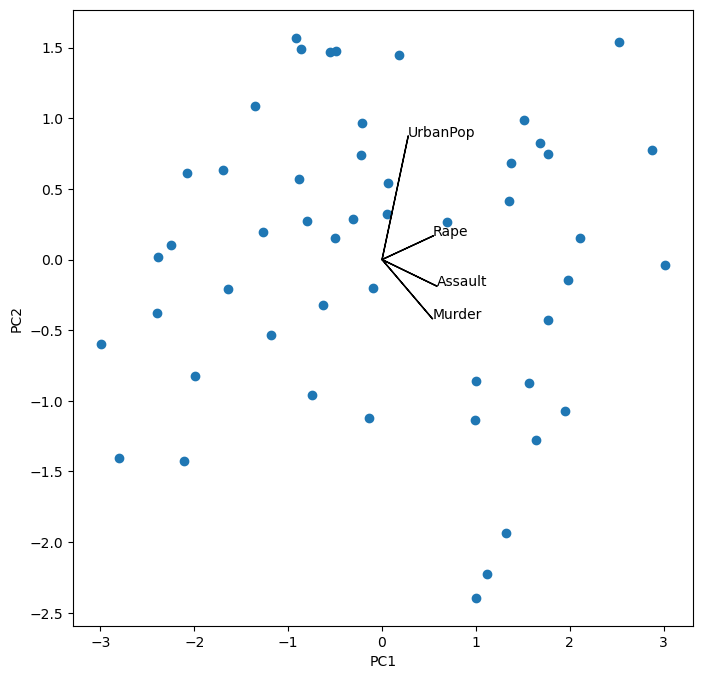

In [255]:
# The biplot is a common visualization method used with PCA.
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])

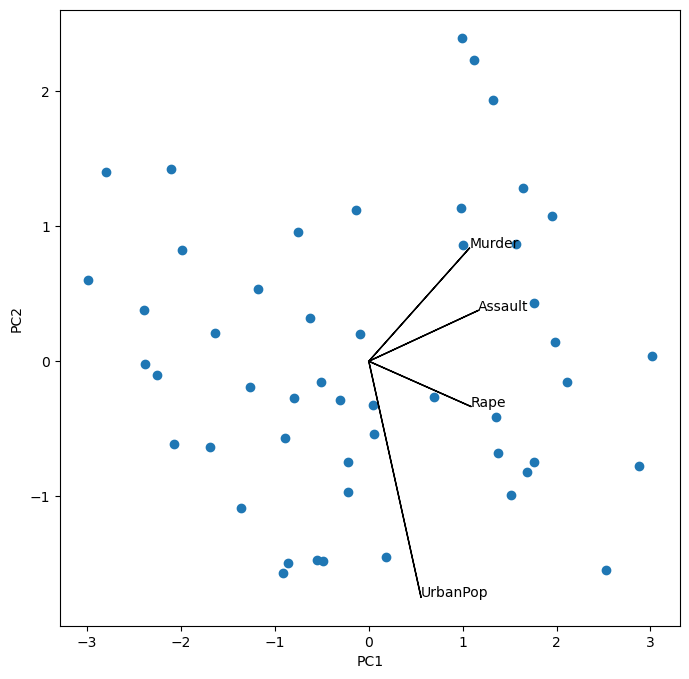

In [256]:
# Notice that this fgure is a refection of Figure 12.1 through the y-axis.
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[
        j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])

In [257]:
# The standard deviations of the principal component scores are as follows:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [258]:
# The variance of each score can be extracted directly from the pcaUS object via the explained_variance_ attribute.
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [231]:
# The proportion of variance explained by each principal component (PVE) is stored as explained_variance_ratio_:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [259]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

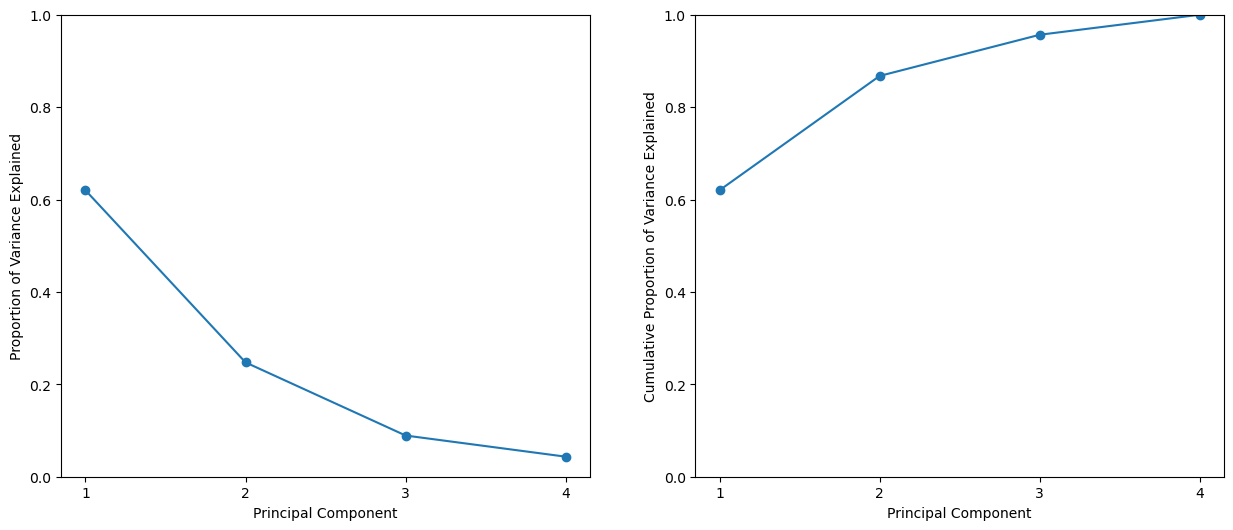

In [260]:
ax = axes[1]
ax.plot(ticks,
pcaUS.explained_variance_ratio_.cumsum(),
marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [261]:
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

In [262]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [263]:
# Using the full_matrices=False option ensures that for a tall matrix the shape of U is the same as the shape of X.
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [264]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [265]:
(U * D[None ,:])[:3]

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [266]:
scores[:3]

array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

In [267]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
n_omit,
replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
n_omit,
replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [269]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

In [270]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]


In [274]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
valid_mask = ~ismiss  # Store mask for reuse

mssold = np.mean(Xhat[valid_mask]**2)
mss0 = np.mean(Xna[valid_mask]**2)

In [277]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c) - FIXED: Replaced invalid '∼' with standard '~'
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)  # Correct tilde character here
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


In [278]:
 np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.711356743429736

In [279]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

In [280]:
kmeans = KMeans(n_clusters=2,
random_state=2,
n_init=20).fit(X)

In [281]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

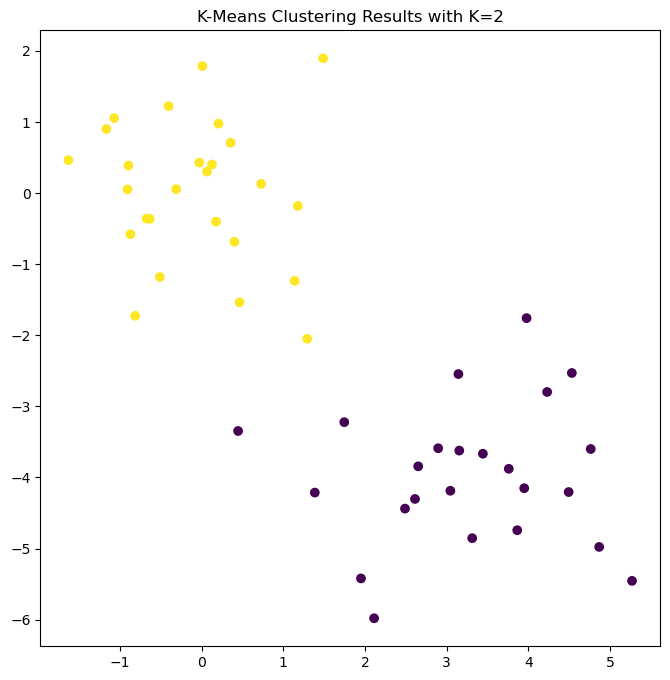

In [282]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

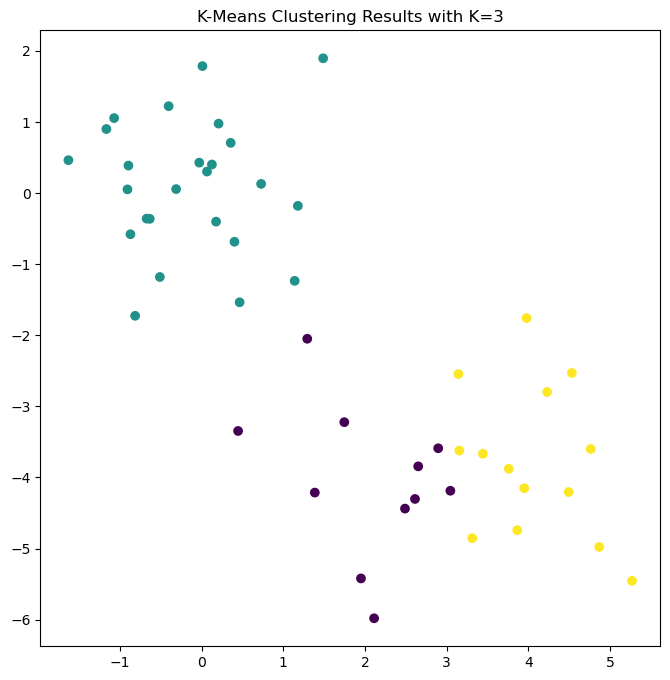

In [283]:
kmeans = KMeans(n_clusters=3,
random_state=3,
n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [284]:
kmeans1 = KMeans(n_clusters=3,
random_state=3,
n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
random_state=3,
n_init=20).fit(X);
kmeans1.inertia_ , kmeans20.inertia_

(76.85131986999251, 75.06261242745384)

In [285]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
n_clusters=None,
linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [286]:
hc_avg = HClust(distance_threshold=0,
n_clusters=None,
linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
n_clusters=None,
linkage='single');
hc_sing.fit(X);

In [288]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

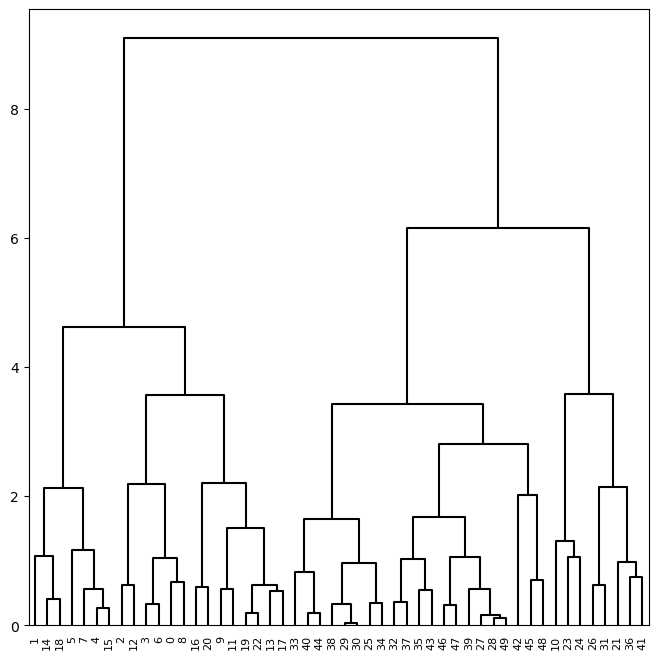

In [289]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp ,
           ax=ax,
           **cargs);


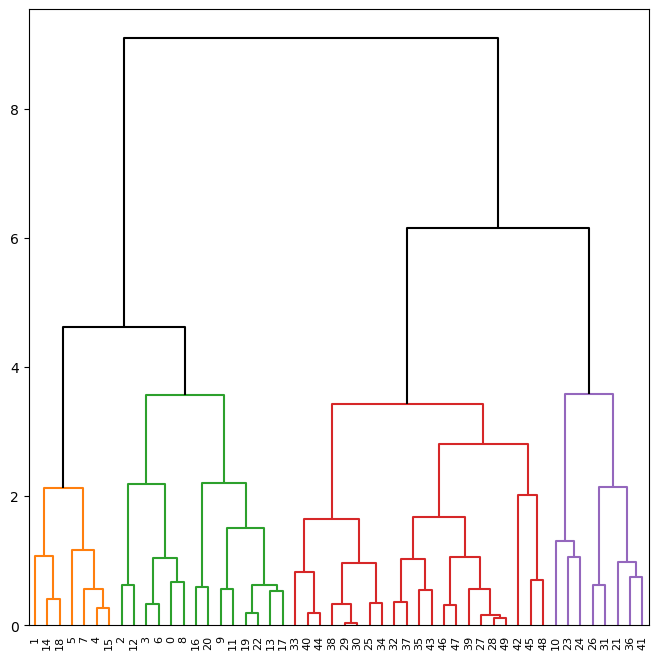

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp ,
ax=ax,
color_threshold=4,
above_threshold_color='black');


In [291]:
cut_tree(linkage_comp , n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [292]:
cut_tree(linkage_comp , height=5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

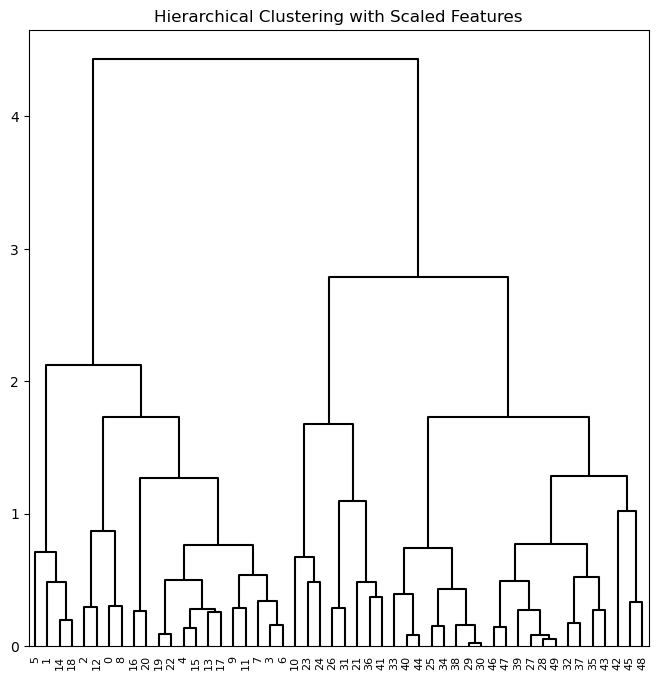

In [293]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
n_clusters=None,
linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale , ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");

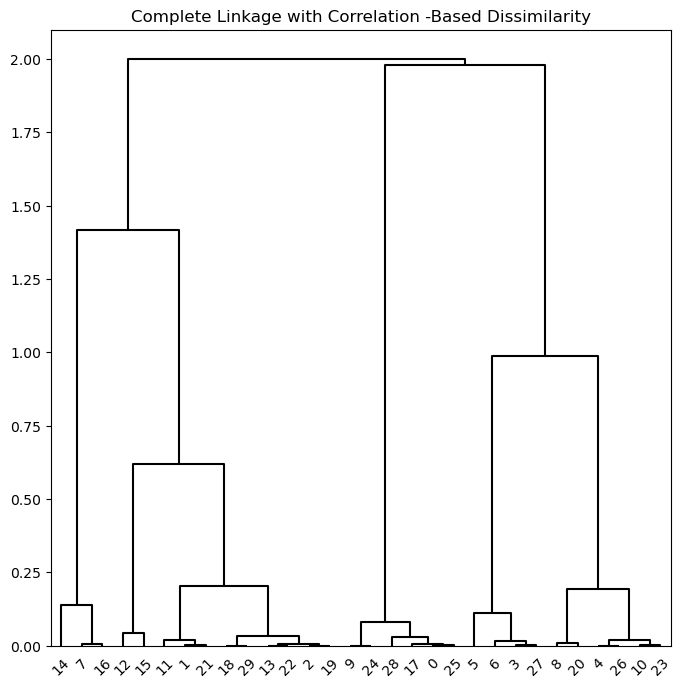

In [297]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation -Based Dissimilarity");

In [298]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']

In [299]:
nci_data.shape

(64, 6830)

In [300]:
nci_labs.value_counts()


label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

In [301]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)

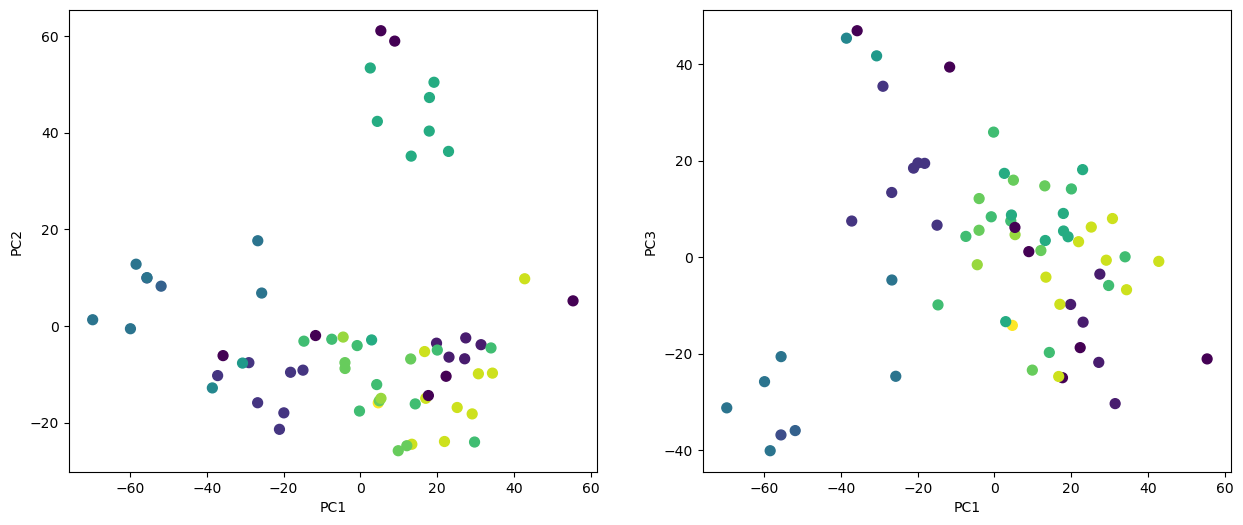

In [302]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab)
for lab in nci_labs.values])
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
nci_scores[:,1],
c=nci_groups ,
marker='o',
s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
nci_scores[:,2],
c=nci_groups ,
marker='o',
s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');

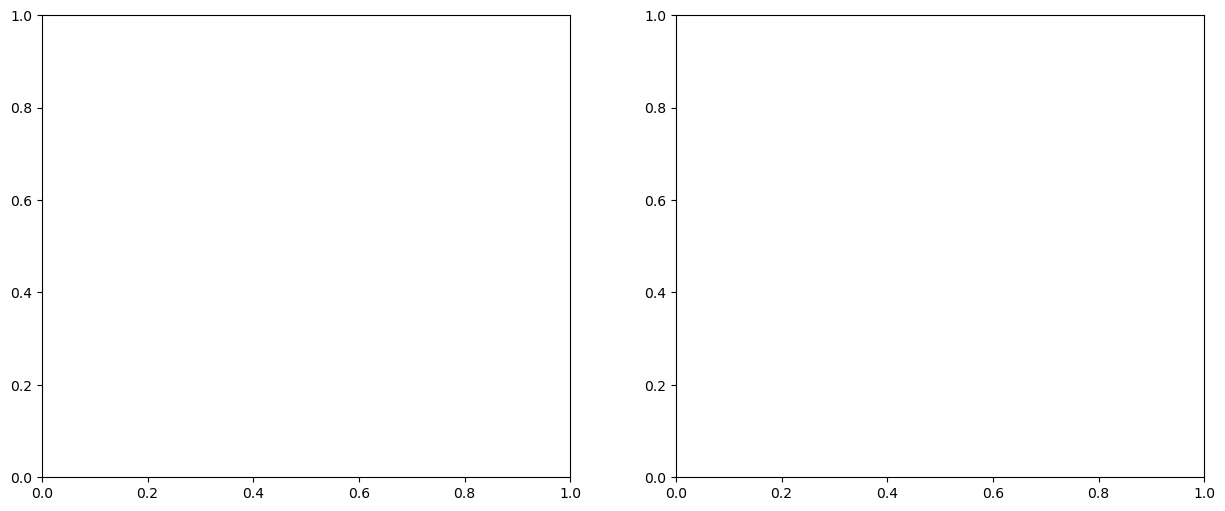

In [304]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1

In [305]:
ax.plot(ticks,
nci_pca.explained_variance_ratio_ ,
marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
nci_pca.explained_variance_ratio_.cumsum(),
marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

In [314]:
def plot_nci(linkage , ax, cut=-np.inf):
    cargs = {'above_threshold_color':'black',
             'color_threshold':cut}
    hc = HClust(n_clusters=None,
                distance_threshold=0,
                linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    dendrogram(linkage_ ,
                ax=ax,
                labels=np.asarray(nci_labs),
                leaf_font_size=10,
                **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc

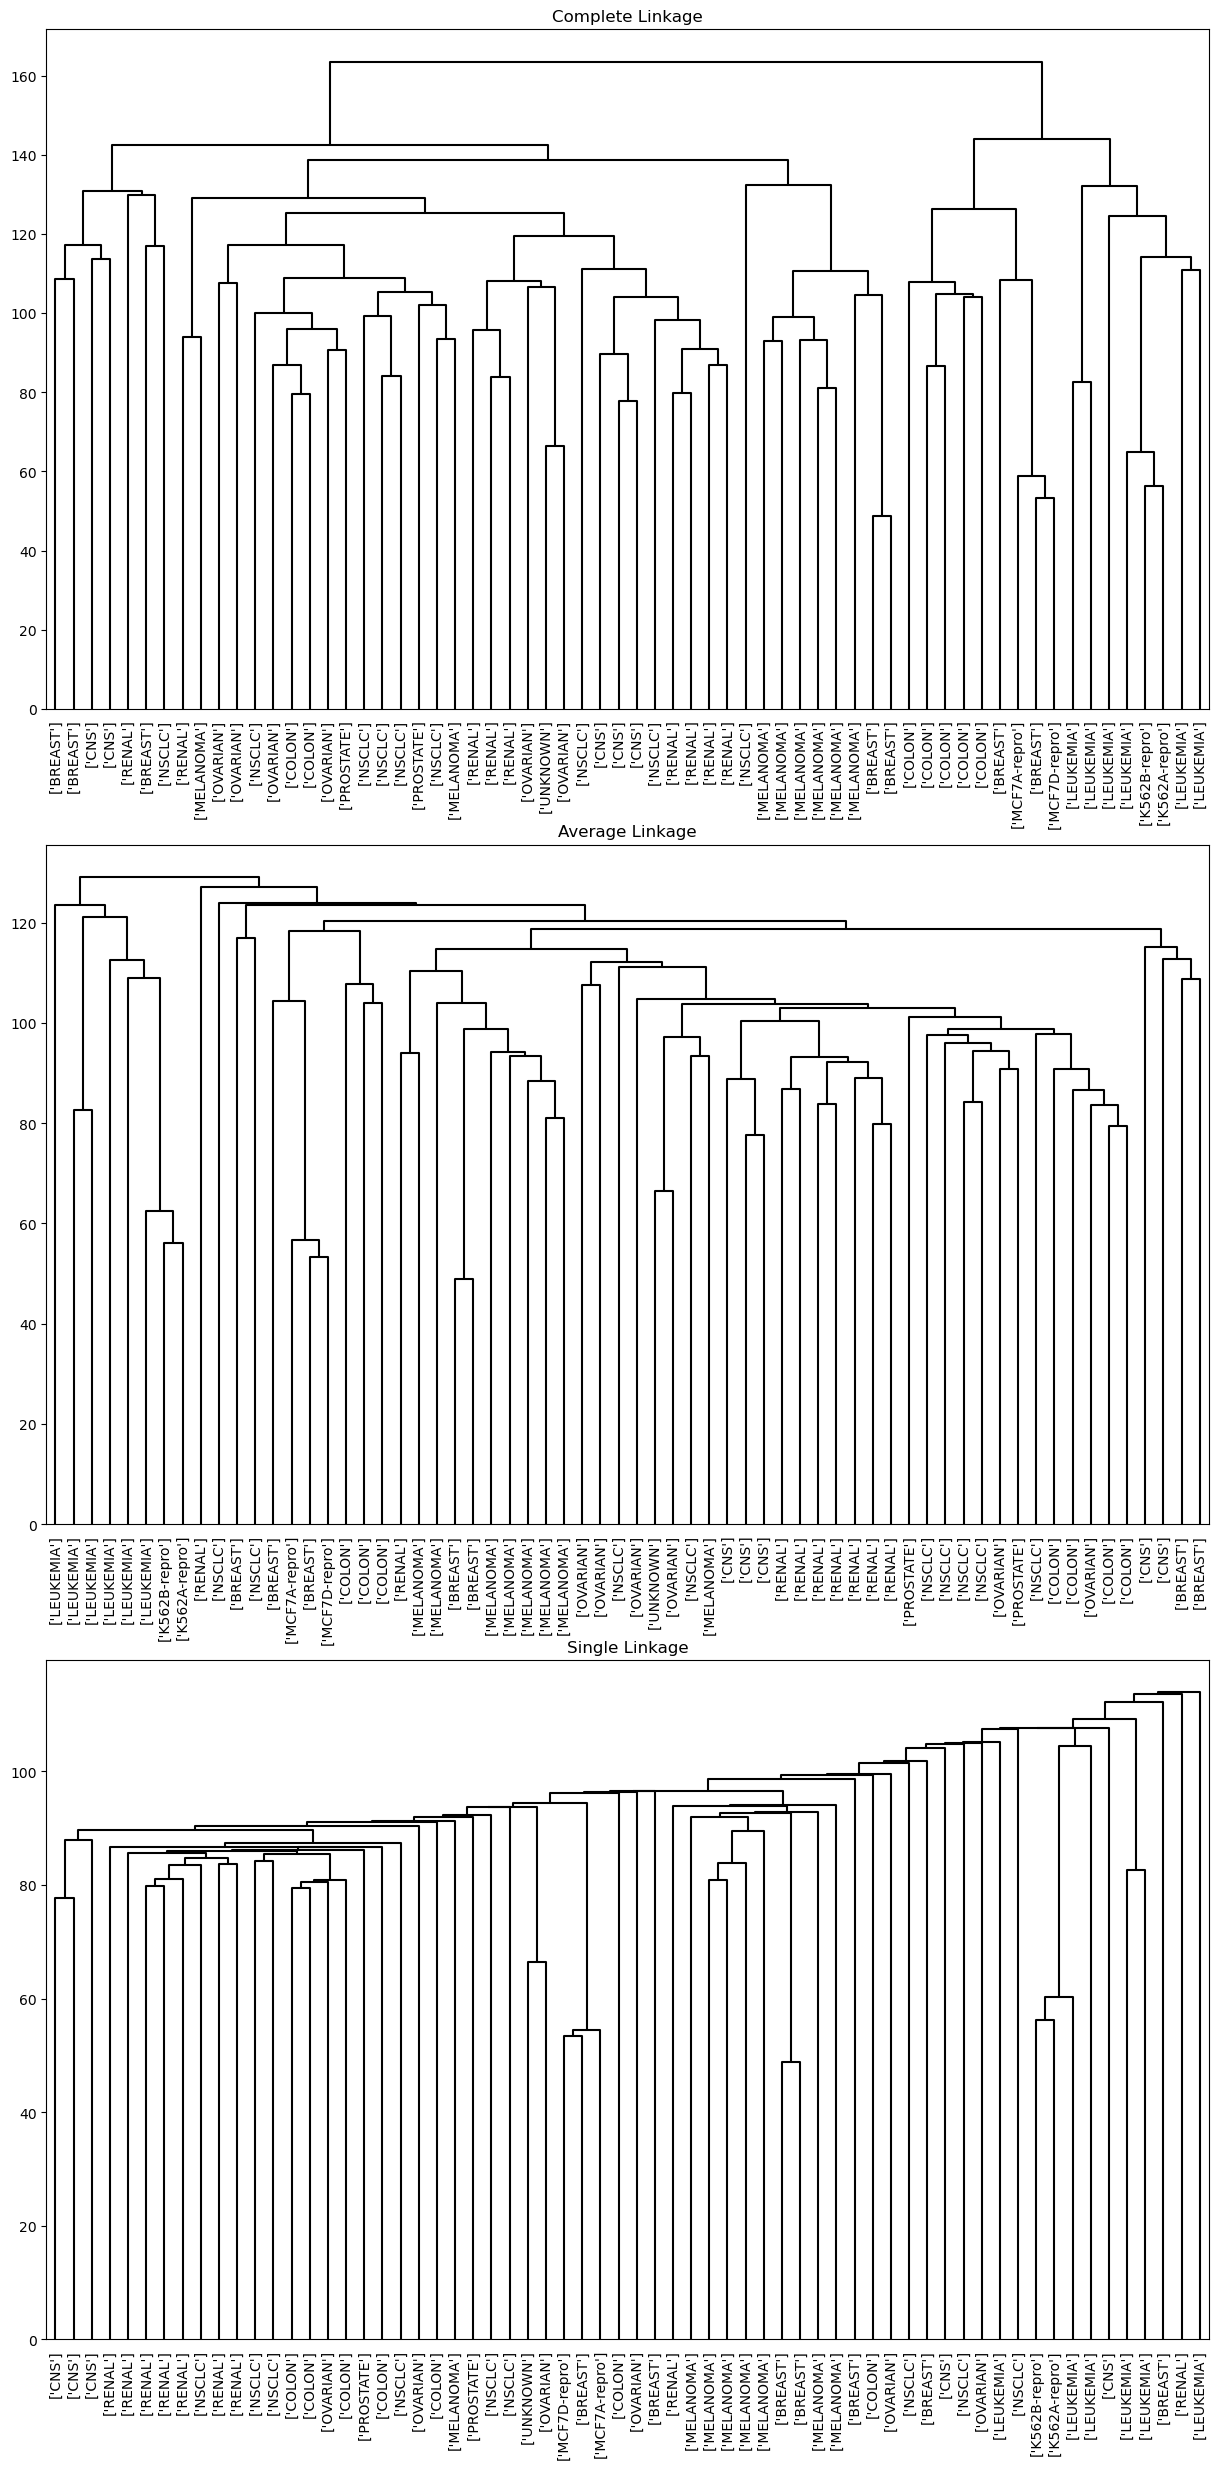

In [316]:
fig, axes = plt.subplots(3, 1, figsize=(15,30))
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)

In [317]:
linkage_comp = compute_linkage(hc_comp)
comp_cut = cut_tree(linkage_comp , n_clusters=4).reshape(-1)
pd.crosstab(nci_labs['label'],
pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete     0  1  2  3
label                  
BREAST       2  3  0  2
CNS          3  2  0  0
COLON        2  0  0  5
K562A-repro  0  0  1  0
K562B-repro  0  0  1  0
LEUKEMIA     0  0  6  0
MCF7A-repro  0  0  0  1
MCF7D-repro  0  0  0  1
MELANOMA     8  0  0  0
NSCLC        8  1  0  0
OVARIAN      6  0  0  0
PROSTATE     2  0  0  0
RENAL        8  1  0  0
UNKNOWN      1  0  0  0

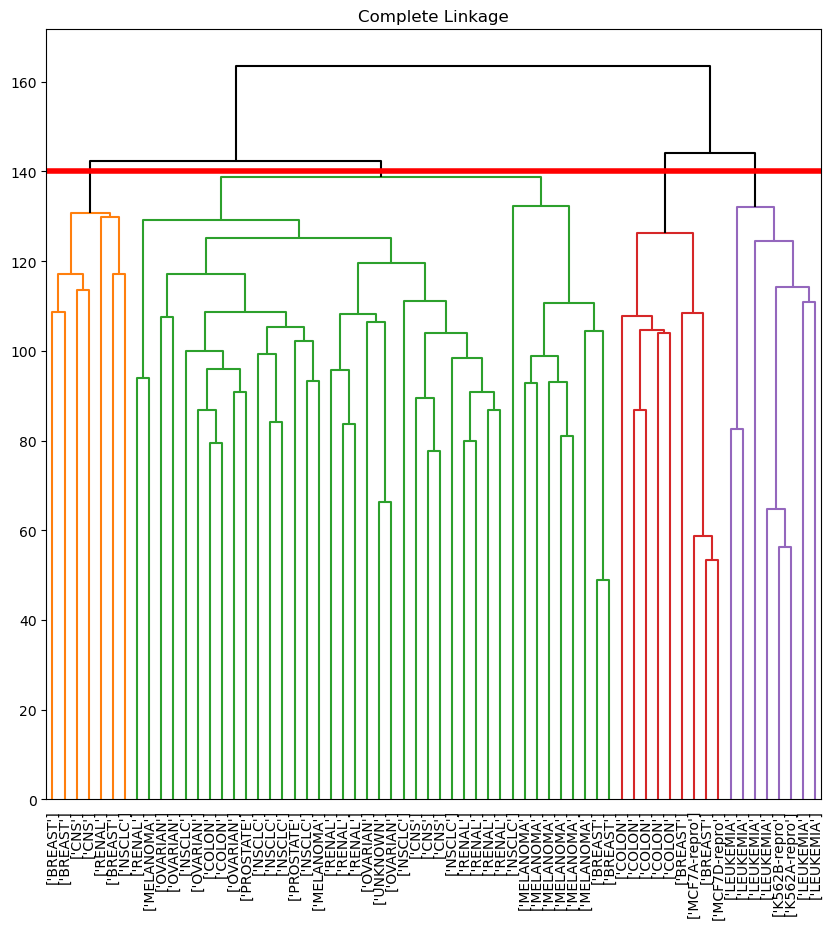

In [318]:
fig, ax = plt.subplots(figsize=(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4);

In [319]:
nci_kmeans = KMeans(n_clusters=4,
random_state=0,
n_init=20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut , name='HClust'),
pd.Series(nci_kmeans.labels_ , name='K-means'))

K-means  0   1   2  3
HClust               
0        1  20  10  9
1        0   7   0  0
2        8   0   0  0
3        0   0   9  0

Complete -PCA  0  1  2  3
label                    
BREAST         0  5  0  2
CNS            2  3  0  0
COLON          7  0  0  0
K562A-repro    0  0  1  0
K562B-repro    0  0  1  0
LEUKEMIA       2  0  4  0
MCF7A-repro    0  0  0  1
MCF7D-repro    0  0  0  1
MELANOMA       1  7  0  0
NSCLC          8  1  0  0
OVARIAN        5  1  0  0
PROSTATE       2  0  0  0
RENAL          7  2  0  0
UNKNOWN        0  1  0  0

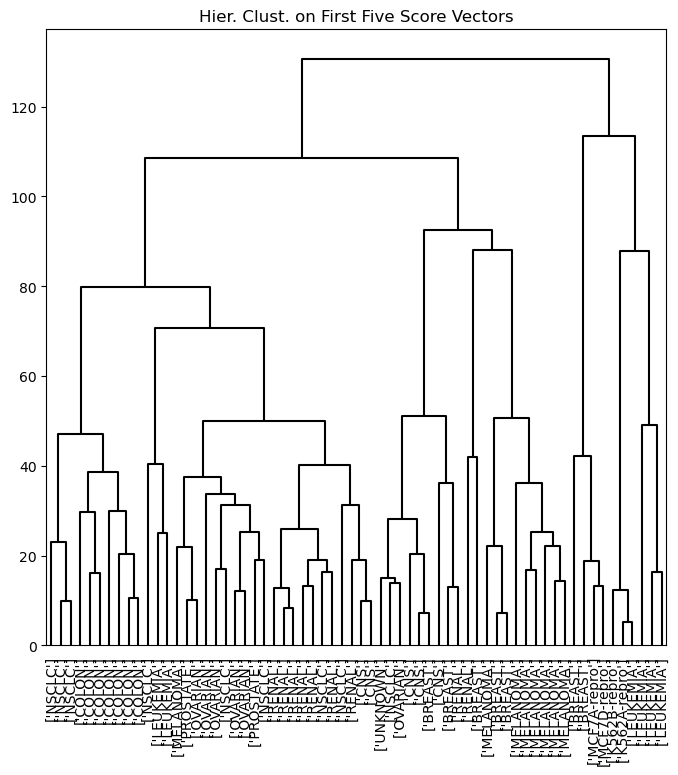

In [320]:
hc_pca = HClust(n_clusters=None,
distance_threshold=0,
linkage='complete'
).fit(nci_scores[:,:5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_pca ,
labels=np.asarray(nci_labs),
leaf_font_size=10,
ax=ax,
**cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree(linkage_pca ,
n_clusters=4).reshape(-1),
name='Complete -PCA')
pd.crosstab(nci_labs['label'], pca_labels)